1. increase padj to 0.01
2. operons
3. shiri's tool

In [1]:
library(DESeq2)
library(RColorBrewer)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [2]:
library(reshape2)


In [3]:
library("gplots")
library("GGally")                      # Load GGally package


Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
library(readxl)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRan

In [5]:
library("pheatmap")
library("RColorBrewer")

In [6]:
library(goseq)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase


Attaching package: ‘geneLenDataBase’


The following object is masked from ‘package:S4Vectors’:

    unfactor






In [7]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [8]:
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
#forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
#fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(P = PCOLOR_light, C = PRO_COLOR),
    treatment = c(ref = gpal[1], long.term=gpal[2])
    
)



In [9]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
[2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
[3] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[4] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[5] "CC1A3 WGCNA CC.ipynb"                         
[6] "data"                                         
[7] "DE_results"

In [10]:
fname_counts = file.path('data','MED4_counts_combined.txt')

In [11]:
cdf = read.csv(fname_counts, sep='\t' )

In [12]:
rownames(cdf) = cdf$gene_id

In [13]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [14]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [15]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [16]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'long-term' ,
                                  '4' = 'long-term' ,
                                  '5' = 'long-term' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'long-term', 'NA')))

In [17]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [18]:
# remove C1C
md$groupandtime1 = md$groupandtime
md = md %>% 
    mutate(groupandtime1 = ifelse(sample == 'C1C', 'NA', groupandtime1))


In [19]:
md = md %>% mutate(treatment = factor(recode(groupandtime1, 
                                  'P1' = 'ref', 
                                  'C1' = 'ref' , 
                                  'C3' = 'long.term' ,
                                  'C4' = 'long.term' ,
                                  'C5' = 'long.term' ,
                                         .default = 'NA'
                                 ), levels=c('ref', 'long.term', 'NA')))

In [20]:
head(md)

sample_id TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 A1A_S7     7      A1A    168.0                  100      0.888           
2 A1B_S8     8      A1B     99.8                  100      0.850           
3 A1C_S9     9      A1C     57.3                  100      1.570           
4 A2A_S10   10      A2A     69.0                  100      0.592           
5 A2B_S11   11      A2B     41.9                  100      0.570           
6 A2C_S12   12      A2C     67.2                  100      0.980           
  Group Timepoint Replicate Day extraction techincal_replicate phase  
1 A     1         A         11  1          0                   logExp 
2 A     1         B         11  1          0                   logExp 
3 A     1         C         11  1          0                   logExp 
4 A     2         A         18  2          0                   decline
5 A     2         B         18  2          0                   decline
6 A     2         C         18  4          0                   decline
  groupandtime groupandtime1 treatment
1 A1           A1            NA       
2 A1           A1            NA       
3 A1           A1            NA       
4 A2           A2            NA       
5 A2           A2            NA       
6 A2           A2            NA

In [21]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [22]:
head(cdf)

gene_id      gene
TX50_RS00020 TX50_RS00020 dnaN
TX50_RS00025 TX50_RS00025     
TX50_RS00030 TX50_RS00030 purL
TX50_RS00035 TX50_RS00035 purF
TX50_RS00040 TX50_RS00040     
TX50_RS00045 TX50_RS00045     
             product                                                
TX50_RS00020 DNA polymerase III subunit beta                        
TX50_RS00025 hypothetical protein                                   
TX50_RS00030 phosphoribosylformylglycinamidine synthase subunit PurL
TX50_RS00035 amidophosphoribosyltransferase                         
TX50_RS00040 DNA topoisomerase 4 subunit A                          
TX50_RS00045 tetratricopeptide repeat protein                       
             protein_id     old_locus_tag A1A_S7 A1B_S8 A1C_S9 A2A_S10 A2B_S11
TX50_RS00020 WP_011131639.1 NA            0      0      0      1       0      
TX50_RS00025 WP_011131640.1 NA            2      2      0      0       0      
TX50_RS00030 WP_011131641.1 NA            0      4      3      3       3      
TX50_RS00035 WP_011131642.1 NA            0      1      1      0       0      
TX50_RS00040 WP_011131643.1 NA            0      8      0      2       5      
TX50_RS00045 WP_011131644.1 NA            0      0      0      0       0      
             ⋯ C5A_S32 C5B_S33 C5C_S34 Mock_S35 P6A_S1 P6B_S2 P6C_S3 P7A_S4
TX50_RS00020 ⋯ 1303    591     765     0        3076   3135   2995   2956  
TX50_RS00025 ⋯   85     23      66     2         427    310    491    111  
TX50_RS00030 ⋯  513    328     518     0        1162   1365   1266   1878  
TX50_RS00035 ⋯  238    115     209     0         914   1196   1035    516  
TX50_RS00040 ⋯  491    218     354     0        1761   2014   1799   1399  
TX50_RS00045 ⋯   80     33      55     0         273    200    305    250  
             P7B_S5 P7C_S6
TX50_RS00020 4869   4302  
TX50_RS00025  198    191  
TX50_RS00030 3482   3459  
TX50_RS00035 1070   1166  
TX50_RS00040 1297   1216  
TX50_RS00045  517    345

In [23]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [24]:
path_fname = file.path('..', 'genomes','MED4','MED4_pathways.csv')
path_df = read.csv(path_fname)

In [25]:
path_df = left_join(genes, path_df, by='protein_id')

In [26]:
head(md)
head(counts)
head(genes)

sample_id TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 A1A_S7     7      A1A    168.0                  100      0.888           
2 A1B_S8     8      A1B     99.8                  100      0.850           
3 A1C_S9     9      A1C     57.3                  100      1.570           
4 A2A_S10   10      A2A     69.0                  100      0.592           
5 A2B_S11   11      A2B     41.9                  100      0.570           
6 A2C_S12   12      A2C     67.2                  100      0.980           
  Group Timepoint Replicate Day extraction techincal_replicate phase  
1 A     1         A         11  1          0                   logExp 
2 A     1         B         11  1          0                   logExp 
3 A     1         C         11  1          0                   logExp 
4 A     2         A         18  2          0                   decline
5 A     2         B         18  2          0                   decline
6 A     2         C         18  4          0                   decline
  groupandtime groupandtime1 treatment
1 A1           A1            NA       
2 A1           A1            NA       
3 A1           A1            NA       
4 A2           A2            NA       
5 A2           A2            NA       
6 A2           A2            NA

A1A_S7 A1B_S8 A1C_S9 A2A_S10 A2B_S11 A2C_S12 A3A_S13 A3B_S14
TX50_RS00020 0      0      0      1       0       4       0       0      
TX50_RS00025 2      2      0      0       0       0       0       0      
TX50_RS00030 0      4      3      3       3       4       2       0      
TX50_RS00035 0      1      1      0       0       4       0       0      
TX50_RS00040 0      8      0      2       5       0       4       7      
TX50_RS00045 0      0      0      0       0       3       1       0      
             A3C_S15 C1A_S16 ⋯ C5A_S32 C5B_S33 C5C_S34 Mock_S35 P6A_S1 P6B_S2
TX50_RS00020 0       1119    ⋯ 1303    591     765     0        3076   3135  
TX50_RS00025 0        127    ⋯   85     23      66     2         427    310  
TX50_RS00030 5        359    ⋯  513    328     518     0        1162   1365  
TX50_RS00035 0        326    ⋯  238    115     209     0         914   1196  
TX50_RS00040 0        600    ⋯  491    218     354     0        1761   2014  
TX50_RS00045 0        113    ⋯   80     33      55     0         273    200  
             P6C_S3 P7A_S4 P7B_S5 P7C_S6
TX50_RS00020 2995   2956   4869   4302  
TX50_RS00025  491    111    198    191  
TX50_RS00030 1266   1878   3482   3459  
TX50_RS00035 1035    516   1070   1166  
TX50_RS00040 1799   1399   1297   1216  
TX50_RS00045  305    250    517    345

gene_id      gene
TX50_RS00020 TX50_RS00020 dnaN
TX50_RS00025 TX50_RS00025     
TX50_RS00030 TX50_RS00030 purL
TX50_RS00035 TX50_RS00035 purF
TX50_RS00040 TX50_RS00040     
TX50_RS00045 TX50_RS00045     
             product                                                
TX50_RS00020 DNA polymerase III subunit beta                        
TX50_RS00025 hypothetical protein                                   
TX50_RS00030 phosphoribosylformylglycinamidine synthase subunit PurL
TX50_RS00035 amidophosphoribosyltransferase                         
TX50_RS00040 DNA topoisomerase 4 subunit A                          
TX50_RS00045 tetratricopeptide repeat protein                       
             protein_id     old_locus_tag
TX50_RS00020 WP_011131639.1 NA           
TX50_RS00025 WP_011131640.1 NA           
TX50_RS00030 WP_011131641.1 NA           
TX50_RS00035 WP_011131642.1 NA           
TX50_RS00040 WP_011131643.1 NA           
TX50_RS00045 WP_011131644.1 NA

In [27]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [28]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [29]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [30]:
md_noalt = filter(md, treatment %in% c('ref', 'long.term'), techincal_replicate %in% 0)


In [31]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [32]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  14 

In [33]:
cts = counts_no_alt
coldata= md_noalt


In [34]:
head(coldata)

sample_id     TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 C1A_S16       16      C1A    300.00                 100      1.15            
2 C1B_S17       17      C1B     84.90                 100      1.91            
3 C3A_100ng_S24 24      C3A_1   33.70                 100      1.20            
4 C3B_60ng_S26  26      C3B      6.02                  60      1.45            
5 C3C_100ng_S27 27      C3C_1   33.70                 100      1.78            
6 C4A_S29       29      C4A     31.20                 100      1.77            
  Group Timepoint Replicate Day extraction techincal_replicate phase    
1 C     1         A         11  1          0                   logExp   
2 C     1         B         11  1          0                   logExp   
3 C     3         A         31  4          0                   long-term
4 C     3         B         31  5          0                   long-term
5 C     3         C         31  4          0                   long-term
6 C     4         A         60  5          0                   long-term
  groupandtime groupandtime1 treatment
1 C1           C1            ref      
2 C1           C1            ref      
3 C3           C3            long.term
4 C3           C3            long.term
5 C3           C3            long.term
6 C4           C4            long.term

In [35]:
head(cts)

C1A_S16 C1B_S17 C3A_100ng_S24 C3B_60ng_S26 C3C_100ng_S27 C4A_S29
TX50_RS00020 1119    2394    355           2220         1046          1384   
TX50_RS00025  127     331     26            106           29            86   
TX50_RS00030  359     907    239            961          471           671   
TX50_RS00035  326     767    102            492          150           328   
TX50_RS00040  600    1572    182            745          313           621   
TX50_RS00045  113     212     17            221           69           134   
             C4B_S30 C4C_S31 C5A_S32 C5B_S33 C5C_S34 P6A_S1 P6B_S2 P6C_S3
TX50_RS00020 989     1526    1303    591     765     3076   3135   2995  
TX50_RS00025  56       93      85     23      66      427    310    491  
TX50_RS00030 500     1169     513    328     518     1162   1365   1266  
TX50_RS00035 289      404     238    115     209      914   1196   1035  
TX50_RS00040 489      689     491    218     354     1761   2014   1799  
TX50_RS00045  97       79      80     33      55      273    200    305

In [36]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("P1", "C1", "C3", "C4", "C5"))
coldata$Group = factor(coldata$Group, levels=c("P", "C"))
coldata$treatment = factor(coldata$treatment, levels=c('ref', 'long.term'))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [37]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
“Setting row names on a tibble is deprecated.”


In [38]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(2L, 3L, 4L, 5L, 1L), levels = c("P1", "C1", "C3", 
"C4", "C5"), class = "factor")
structure(2:1, levels = c("P", "C"), class = "factor")


In [39]:
rownames(coldata) = coldata$sample



Warning message:
“Setting row names on a tibble is deprecated.”


In [40]:
rownames(coldata)

[1] "C1A"   "C1B"   "C3A_1" "C3B"   "C3C_1" "C4A"   "C4B"   "C4C"   "C5A"  
[10] "C5B"   "C5C"   "P1A"   "P1B"   "P1C"

In [41]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [42]:
design = model.matrix(~ 0+ treatment, data = coldata)

In [43]:
design

treatmentref treatmentlong.term
C1A   1            0                 
C1B   1            0                 
C3A_1 0            1                 
C3B   0            1                 
C3C_1 0            1                 
C4A   0            1                 
C4B   0            1                 
C4C   0            1                 
C5A   0            1                 
C5B   0            1                 
C5C   0            1                 
P1A   1            0                 
P1B   1            0                 
P1C   1            0

In [44]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [45]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 1865 rows and 5 columns
                  gene_id        gene                product     protein_id
              <character> <character>            <character>    <character>
TX50_RS00020 TX50_RS00020        dnaN DNA polymerase III s.. WP_011131639.1
TX50_RS00025 TX50_RS00025               hypothetical protein WP_011131640.1
TX50_RS00030 TX50_RS00030        purL phosphoribosylformyl.. WP_011131641.1
TX50_RS00035 TX50_RS00035        purF amidophosphoribosylt.. WP_011131642.1
TX50_RS00040 TX50_RS00040             DNA topoisomerase 4 .. WP_011131643.1
...                   ...         ...                    ...            ...
TX50_RS09870 TX50_RS09870               hypothetical protein WP_225866747.1
TX50_RS09875 TX50_RS09875               hypothetical protein WP_225866749.1
TX50_RS09880 TX50_RS09880             SxtJ family membrane.. WP_011132879.1
TX50_RS09885 TX50_RS09885             DUF5989 family protein WP_225866752.1
TX50_RS09890 TX50_RS09890               hypotheti

In [46]:
dds

class: DESeqDataSet 
dim: 1865 14 
metadata(1): version
assays(1): counts
rownames(1865): TX50_RS00020 TX50_RS00025 ... TX50_RS09885 TX50_RS09890
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(14): C1A C1B ... P1B P1C
colData names(16): sample_id TGCnew# ... groupandtime1 treatment

In [47]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   10  1855 

In [48]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "groupandtime1"         
[16] "treatment"

In [49]:
dds$groupandtime = factor(dds$groupandtime, levels=c("P1", "P2","C1", "C2", "C3", "C4", "C5"))
dds$Group = factor(dds$Group, levels=c("P", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [50]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

C1A       C1B       C3A_1     C3B       C3C_1     C4A      
TX50_RS00020 10.145137 10.070306 10.248981 10.653516 10.853526 10.731231
TX50_RS00025  7.218938  7.397708  6.784038  6.621219  6.185687  6.990399
TX50_RS00030  8.567427  8.721259  9.691845  9.473309  9.725031  9.708173
             C4B       C4C       C5A       C5B       C5C       P1A      
TX50_RS00020 10.397589 10.604855 10.843739 10.792339 10.524942 10.078063
TX50_RS00025  6.610126  6.862369  7.144126  6.502002  7.211619  7.409588
TX50_RS00030  9.438282 10.227135  9.527530  9.958408  9.973561  8.724788
             P1B       P1C     
TX50_RS00020 10.054979 9.913080
TX50_RS00025  6.975214 7.471395
TX50_RS00030  8.896552 8.718394

In [51]:
head(colData(vsd))

DataFrame with 6 rows and 17 columns
          sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
        <character> <numeric> <character>              <numeric> <numeric>
C1A         C1A_S16        16         C1A                 300.00       100
C1B         C1B_S17        17         C1B                  84.90       100
C3A_1 C3A_100ng_S24        24       C3A_1                  33.70       100
C3B    C3B_60ng_S26        26         C3B                   6.02        60
C3C_1 C3C_100ng_S27        27       C3C_1                  33.70       100
C4A         C4A_S29        29         C4A                  31.20       100
      Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
             <numeric> <factor>  <factor> <character> <character>   <factor>
C1A               1.15        C         1           A          11          1
C1B               1.91        C         1           B          11          1
C3A_1             1.20        C         3           A  

In [52]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

C1A       C1B       C3A_1     C3B       C3C_1     C4A      
TX50_RS00020 10.186156 10.129093 10.265819 10.574780 10.728874 10.634551
TX50_RS00025  6.880885  7.033113  6.529947  6.380000  6.041345  6.691006
TX50_RS00030  8.707853  8.821876  9.568084  9.400683  9.595452  9.582884
             C4B       C4C       C5A       C5B       C5C       P1A      
TX50_RS00020 10.378265 10.537198 10.721501 10.680857 10.475627 10.134890
TX50_RS00025  6.377512  6.584566  6.817306  6.311406  6.870303  7.043777
TX50_RS00030  9.373399  9.990168  9.442425  9.775770  9.789257  8.824186
             P1B       P1C      
TX50_RS00020 10.117400 10.010238
TX50_RS00025  6.678754  7.095515
TX50_RS00030  8.955572  8.819186

In [53]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           C1A      C1B    C3A_1      C3B    C3C_1      C4A      C4B      C4C
C1B   18.46367                                                               
C3A_1 50.02222 48.37298                                                      
C3B   44.15392 43.90238 32.52736                                             
C3C_1 53.71155 53.02307 29.14174 22.70229                                    
C4A   42.20839 41.62757 31.71993 20.14332 22.48720                           
C4B   42.35920 41.76541 30.94937 20.81699 22.44330 16.56404                  
C4C   53.43778 52.43322 44.28433 26.16812 34.42757 29.66122 29.87640         
C5A   39.02833 37.72691 30.14707 29.03152 31.32739 24.92180 24.51163 38.91529
C5B   46.10453 45.37291 28.68449 32.16472 32.23347 28.55391 27.35297 40.80338
C5C   40.08434 38.30637 27.92074 30.19767 31.82058 25.04696 24.68455 39.53027
P1A   18.44097 10.24495 47.31251 42.66236 51.50454 40.45154 39.89713 51.87159
P1B   21.19780 15.66652 45.57029 41.80084 51.46479 40.07249 39.7

NULL

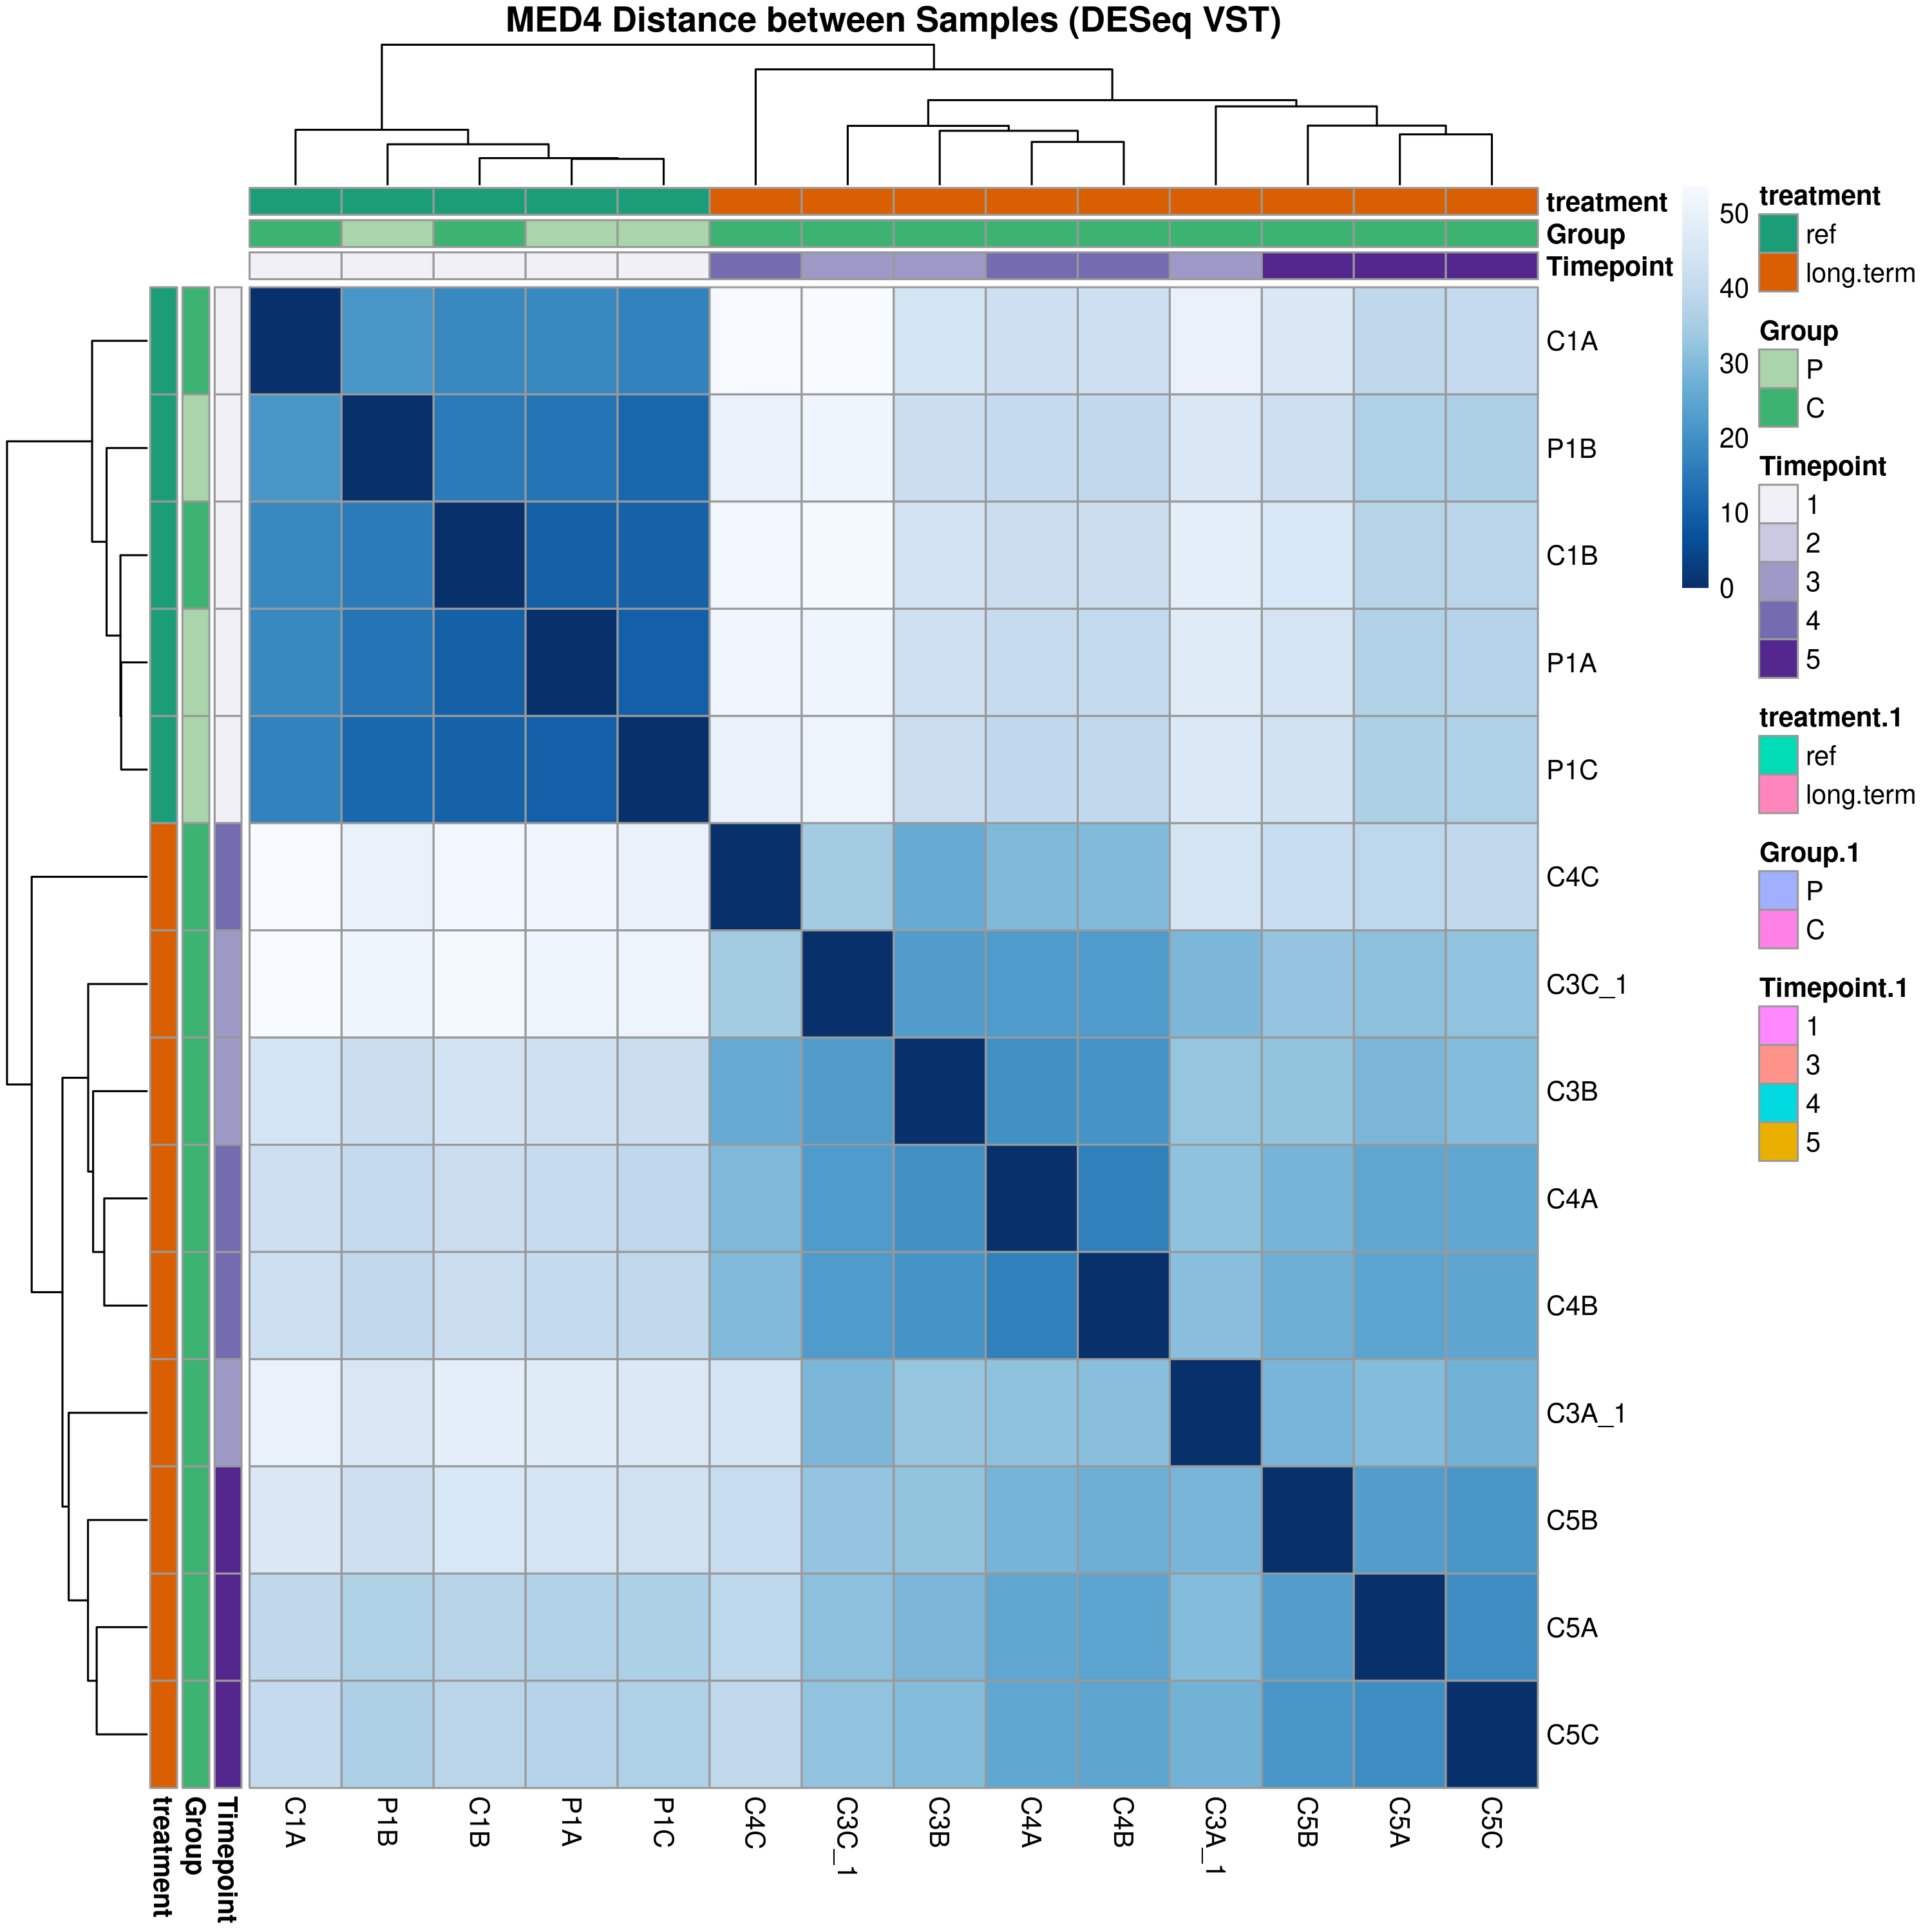

In [54]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group', 'treatment')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "MED4 Distance between Samples (DESeq VST)"
) +
  theme_light(base_size = 25)


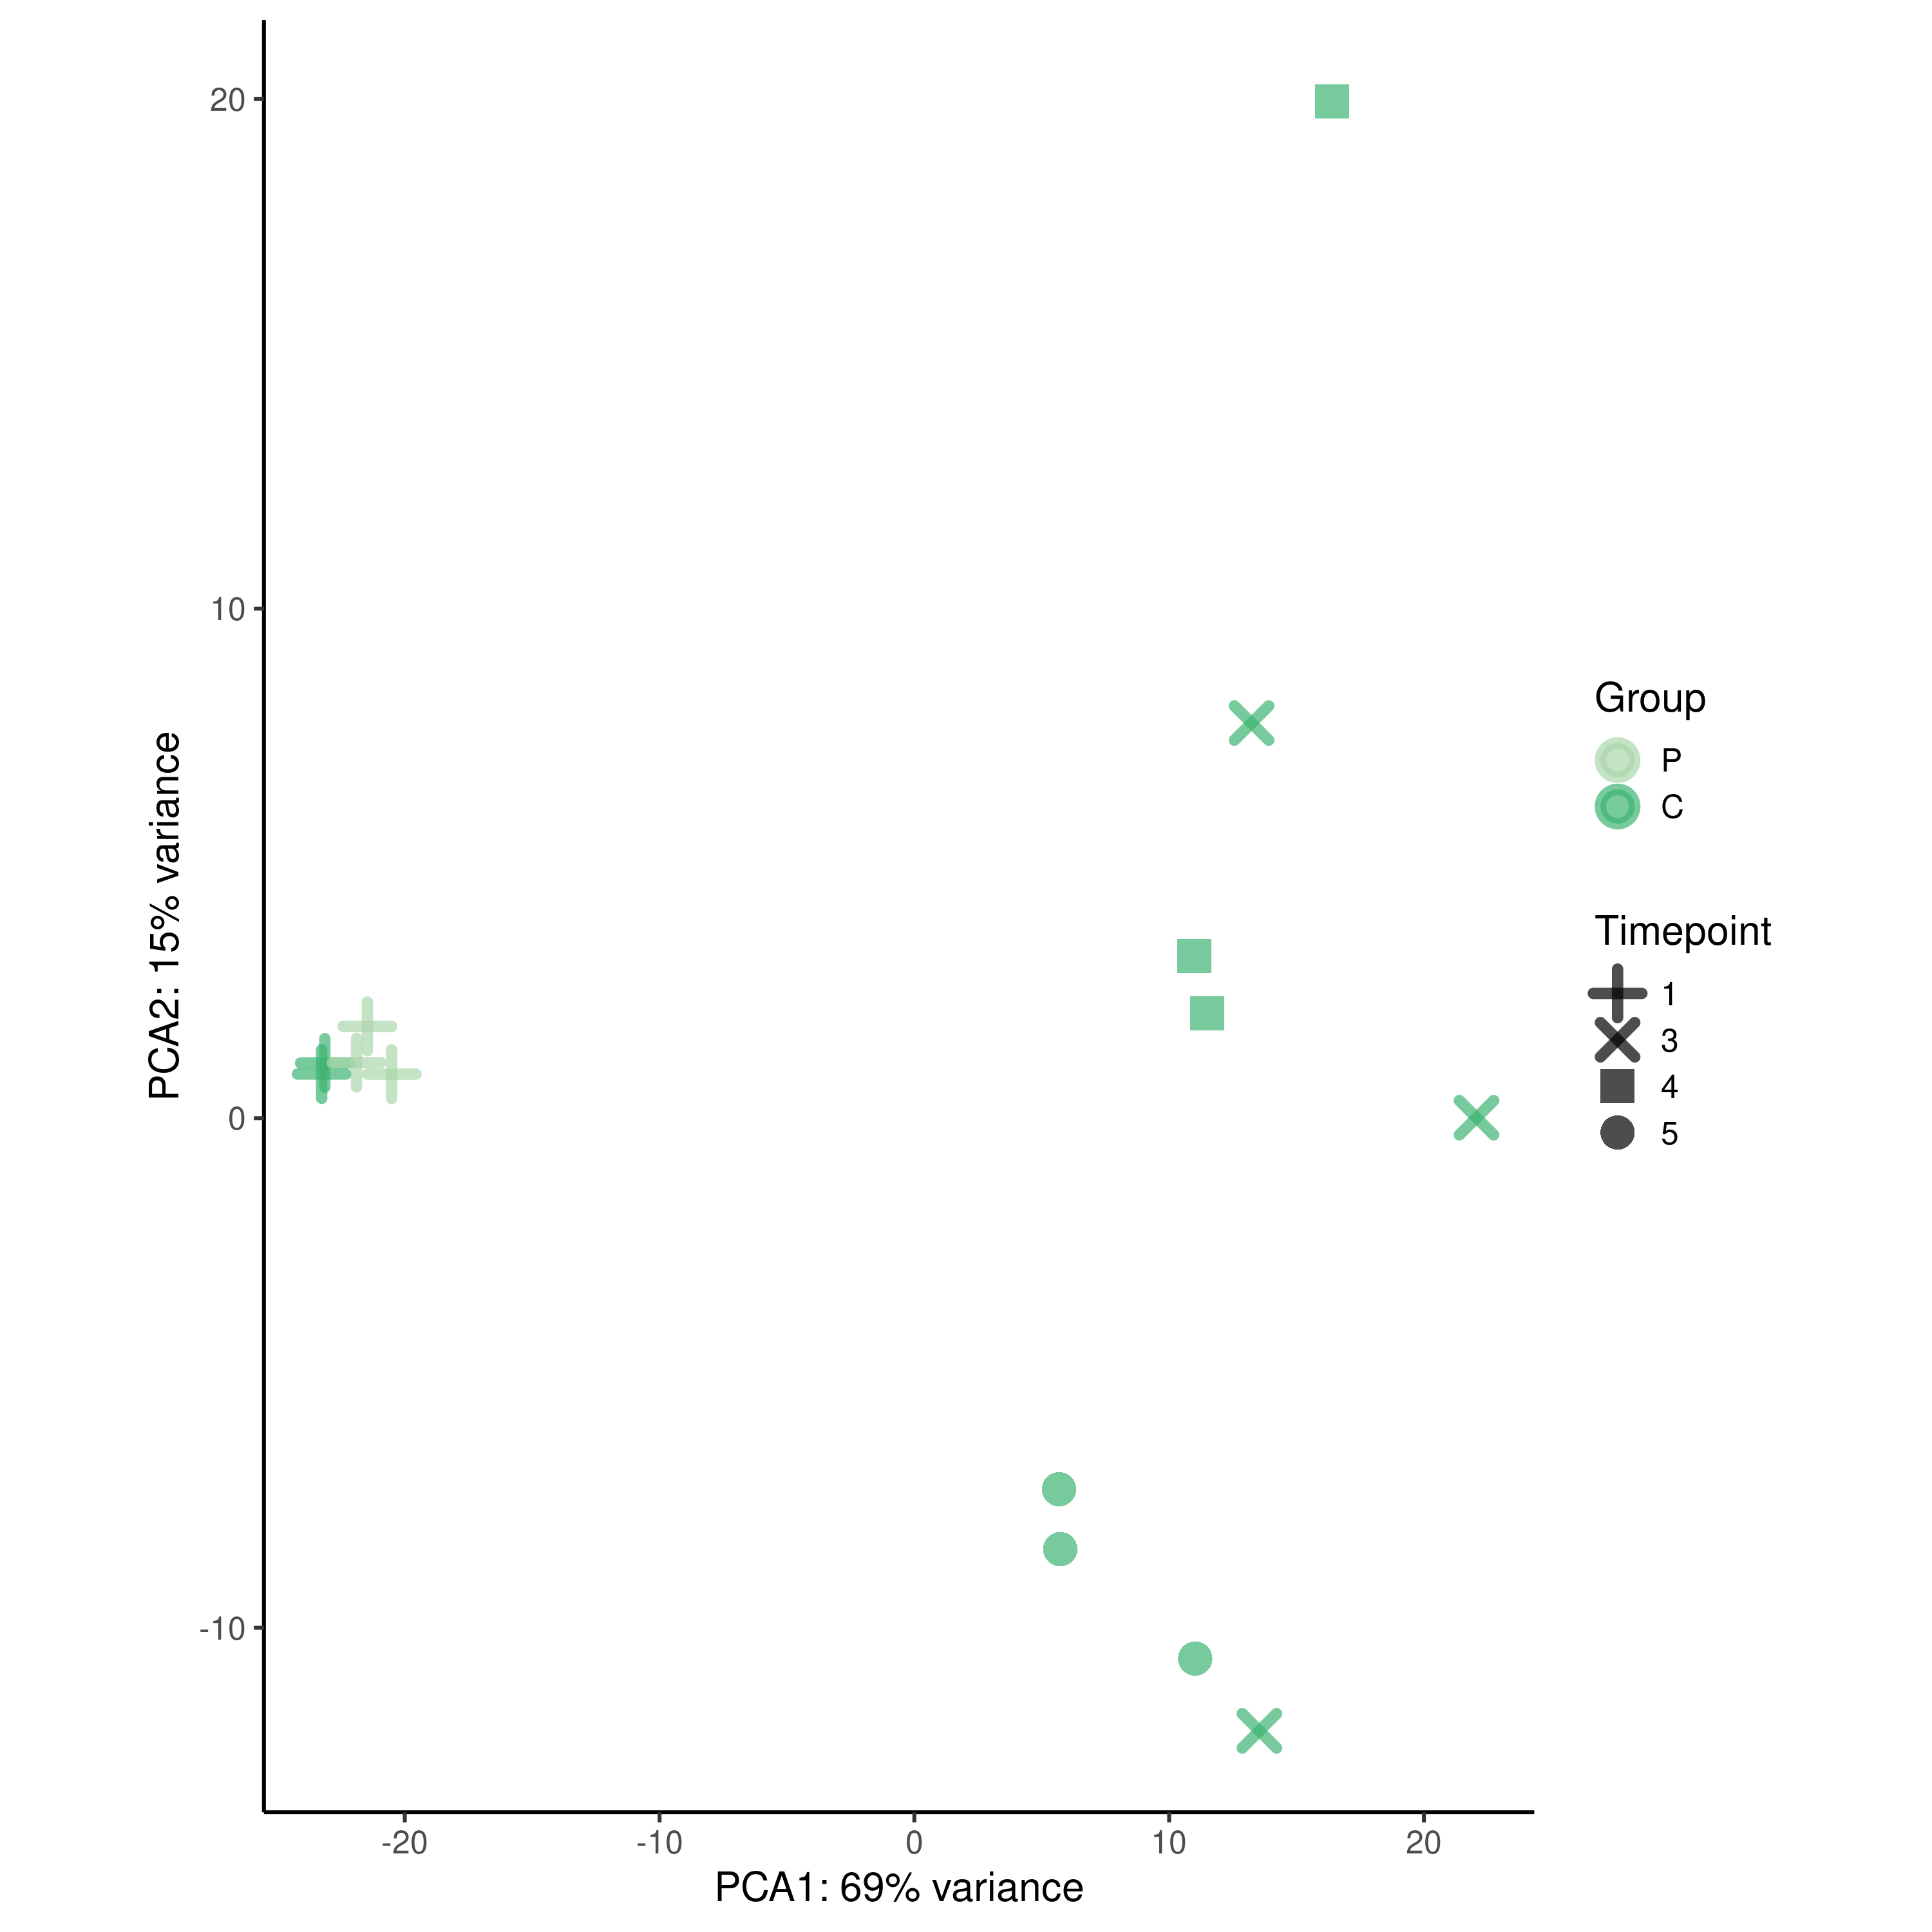

In [55]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =4, stroke = 3, alpha=0.7, position=position_jitter(h=0.15,w=0.15)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 15)  



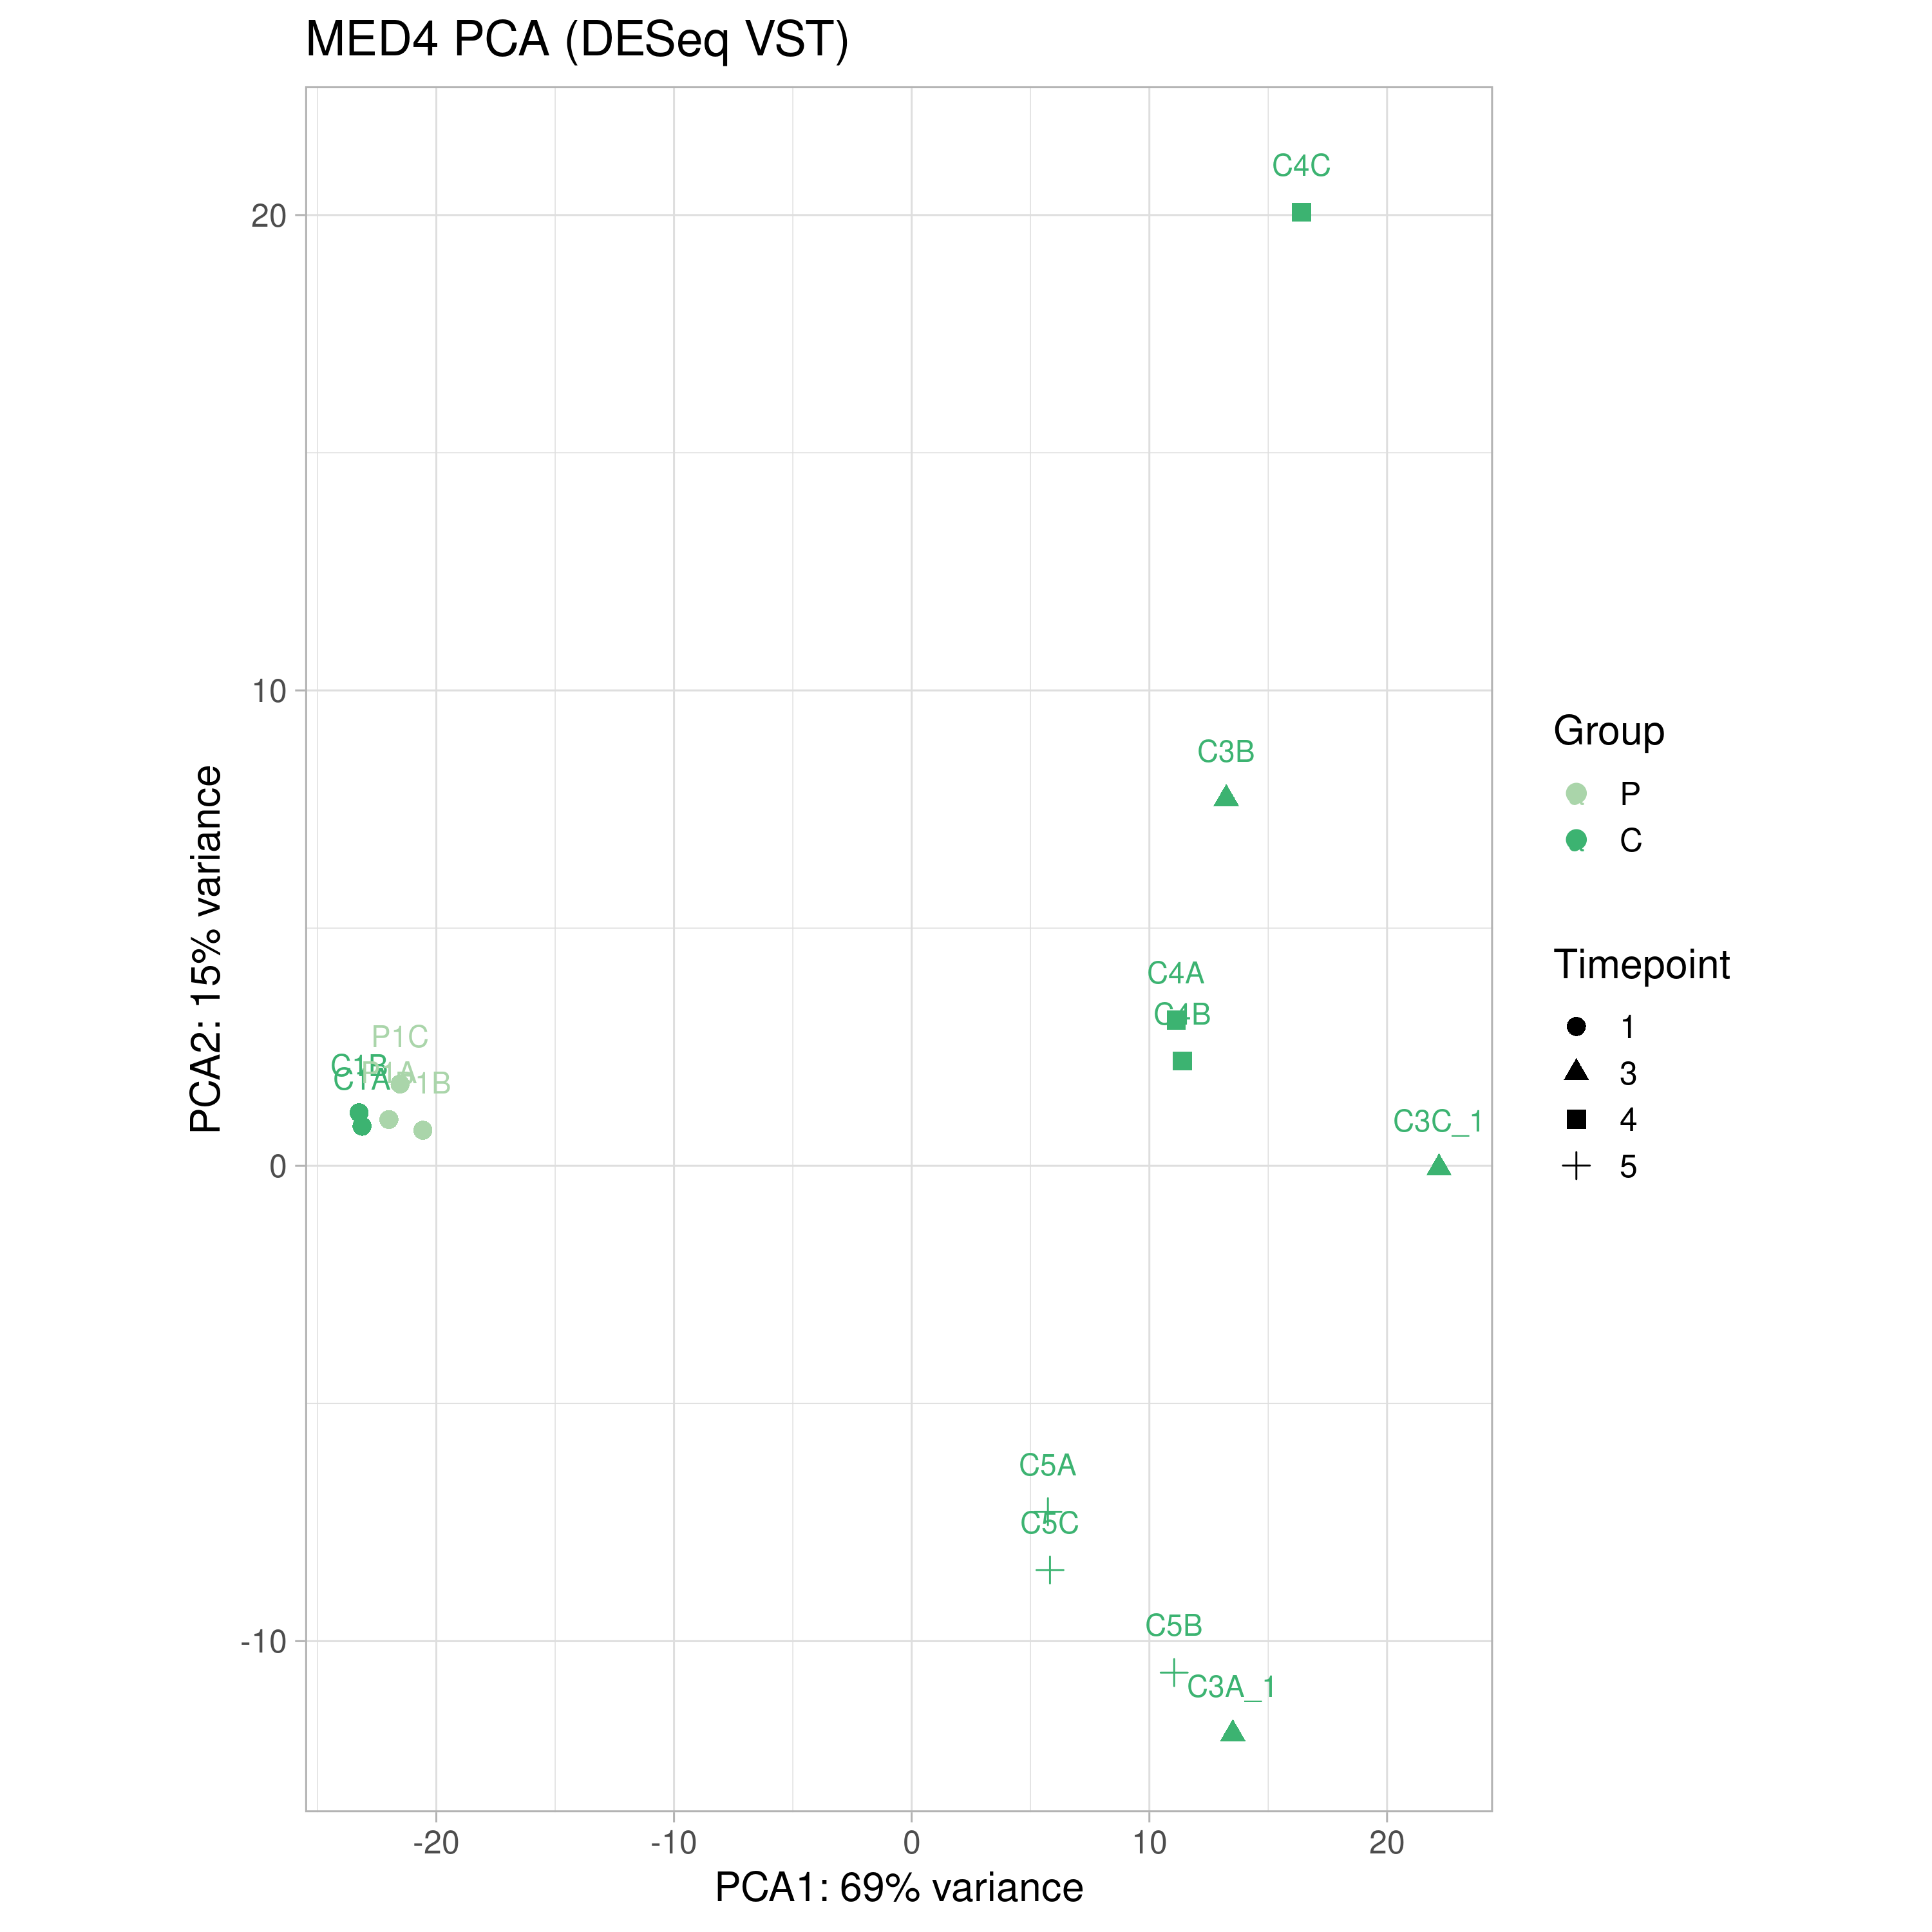

In [56]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =3) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 15)



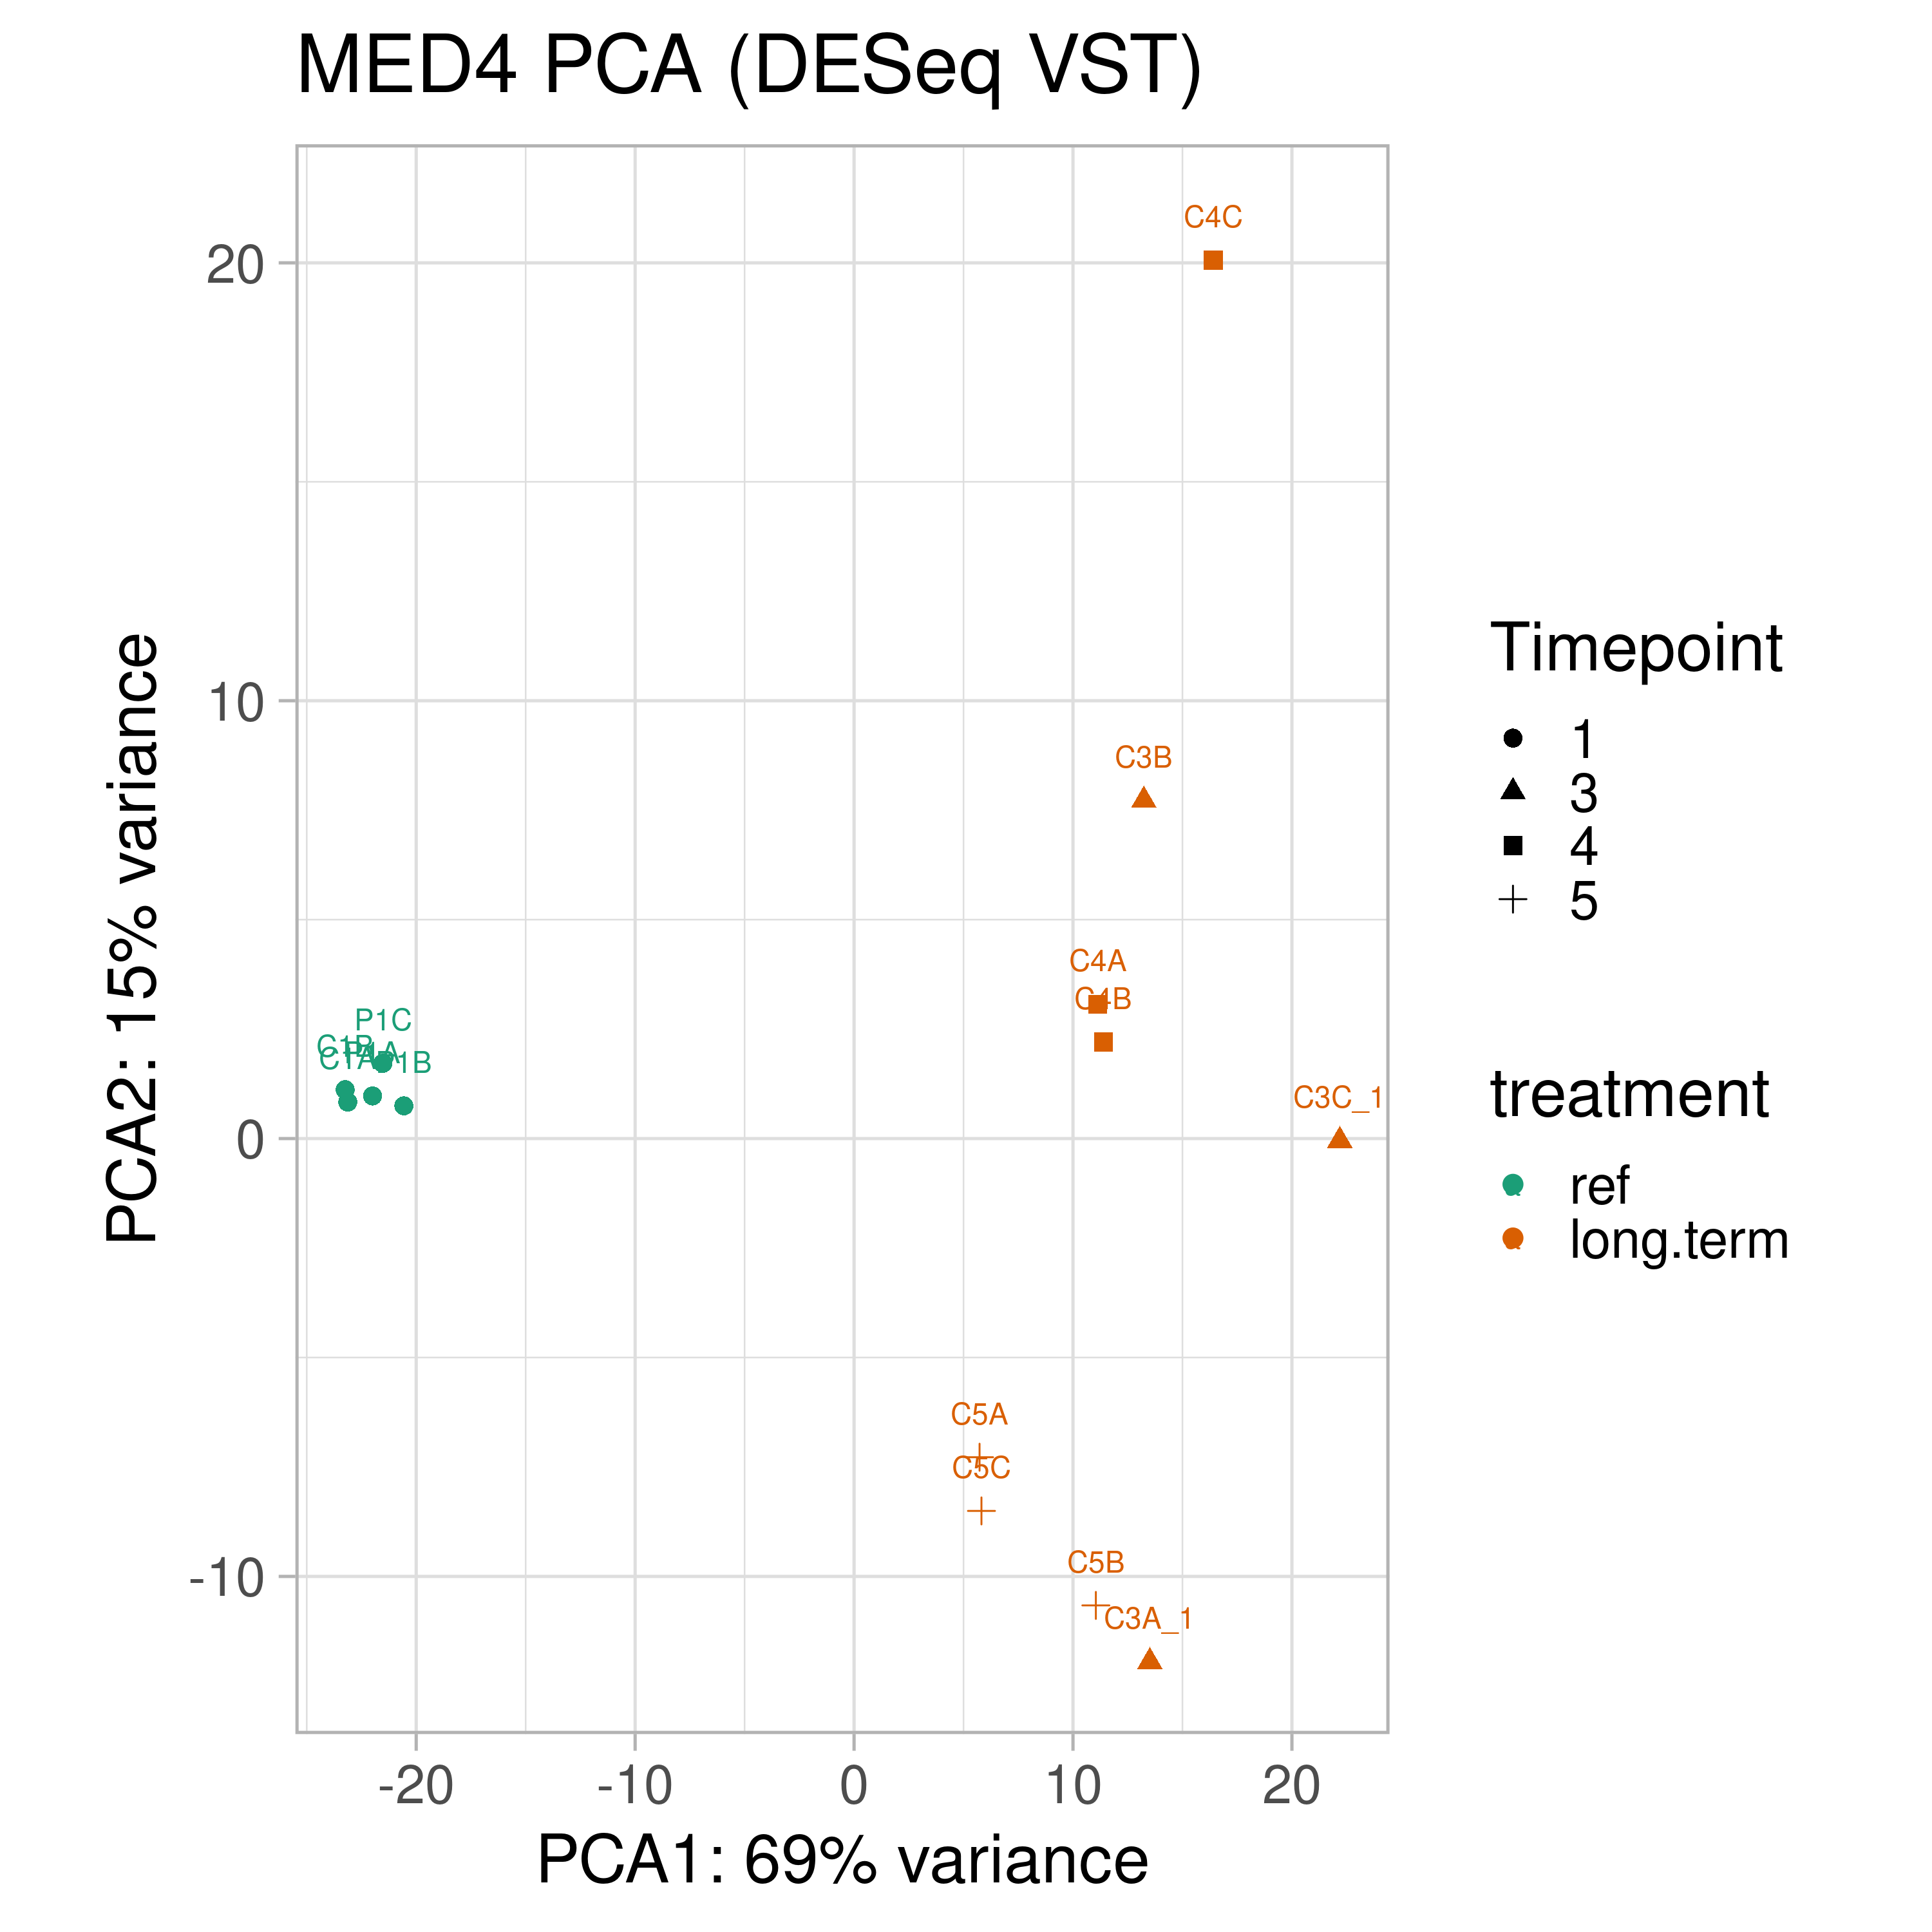

In [57]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = treatment, shape = Timepoint, label=sample)) +
  geom_point(size =3) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$treatment) +
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 25)



In [58]:
alpha = 0.01
lfcThreshold = 0.5

In [59]:
dds <- DESeq(dds)
res <- results(dds, alpha = alpha, lfcThreshold = lfcThreshold)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): treatment long.term vs ref 
Wald test p-value: treatment long.term vs ref 
DataFrame with 1855 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
TX50_RS00020  1382.016      0.5992361  0.121243  0.818486 0.413079585
TX50_RS00025   105.182     -0.6023740  0.203627 -0.502753 0.615138220
TX50_RS00030   688.468      1.0799453  0.151461  3.828998 0.000128666
TX50_RS00035   350.669      0.0779792  0.127018  0.000000 1.000000000
TX50_RS00040   636.525      0.0429749  0.113750  0.000000 1.000000000
...                ...            ...       ...       ...         ...
TX50_RS09870   30.7013     -0.0182429  0.331510   0.00000  1.00000000
TX50_RS09875   57.9255     -0.4923121  0.308102   0.00000  1.00000000
TX50_RS09880   92.7784     -0.2192788  0.283301   0.00000  1.00000000
TX50_RS09885  110.4986     -0.2752293  0.139506   0.00000  1.00000000
TX50_RS09890  175.0020

In [60]:
s = summary(res)
s


out of 1855 with nonzero total read count
adjusted p-value < 0.01
LFC > 0.50 (up)    : 161, 8.7%
LFC < -0.50 (down) : 125, 6.7%
outliers [1]       : 1, 0.054%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [61]:
sum_dds <- function(name) {
    res = results(dds, name=name, alpha = alpha, lfcThreshold = lfcThreshold)
    sum = table(as.data.frame(res) %>% mutate(na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.005,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [62]:
get_dds <- function(name) {
    res = results(dds, name=name, alpha = alpha, lfcThreshold = lfcThreshold)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = name,
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.005,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [63]:
results_names = resultsNames(dds)

In [64]:
#bind_rows(
sum_df = lapply(results_names, sum_dds) %>% bind_rows 

sum_df$name = results_names
sum_df


no_significant outlier up   down name                      
1   16           1       1838  NA  Intercept                 
2 1588           1        146 120  treatment_long.term_vs_ref

In [65]:
#bind_rows(
res_df = lapply(results_names, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','MED4_DE_DESEQ_results_ref_vs_long.csv'))


In [66]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'treatment_'))

In [67]:
sum_df

no_significant outlier up  down name             tot_fc
1 1588           1       146 120  long.term_vs_ref 266

In [68]:
#write.csv(as.data.frame(assay(vsd)), 
#          file.path('DE_results','MED4_DE_DESEQ_vsd.csv'))

In [69]:
dds@design

~treatment

In [70]:
resLFC <- lfcShrink(dds, coef="treatment_long.term_vs_ref", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): treatment long.term vs ref 
Wald test p-value: treatment long.term vs ref 
DataFrame with 1855 rows and 5 columns
              baseMean log2FoldChange     lfcSE      pvalue        padj
             <numeric>      <numeric> <numeric>   <numeric>   <numeric>
TX50_RS00020  1382.016      0.5858219  0.120750 7.71584e-07 3.84548e-06
TX50_RS00025   105.182     -0.5643608  0.199711 3.09419e-03 7.37357e-03
TX50_RS00030   688.468      1.0560352  0.151913 1.00245e-12 1.23082e-11
TX50_RS00035   350.669      0.0755324  0.124831 5.39267e-01 6.20224e-01
TX50_RS00040   636.525      0.0419566  0.112187 7.05579e-01 7.67935e-01
...                ...            ...       ...         ...         ...
TX50_RS09870   30.7013     -0.0141984  0.297624 9.56115e-01 9.67069e-01
TX50_RS09875   57.9255     -0.4191502  0.289536 1.10069e-01 1.66043e-01
TX50_RS09880   92.7784     -0.1873123  0.262999 4.38922e-01 5.25417e-01
TX50_RS09885  110.4986     -0.2646882  0.136856 4.85084e-02 8.27366e-0

In [71]:
resOrdered <- res[order(res$pvalue),]

In [72]:
summary(resLFC)


out of 1855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 581, 31%
LFC < 0 (down)     : 536, 29%
outliers [1]       : 1, 0.054%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [73]:
summary(res)


out of 1855 with nonzero total read count
adjusted p-value < 0.01
LFC > 0.50 (up)    : 161, 8.7%
LFC < -0.50 (down) : 125, 6.7%
outliers [1]       : 1, 0.054%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [74]:
sum(res$padj < 0.01, na.rm=TRUE)

[1] 286

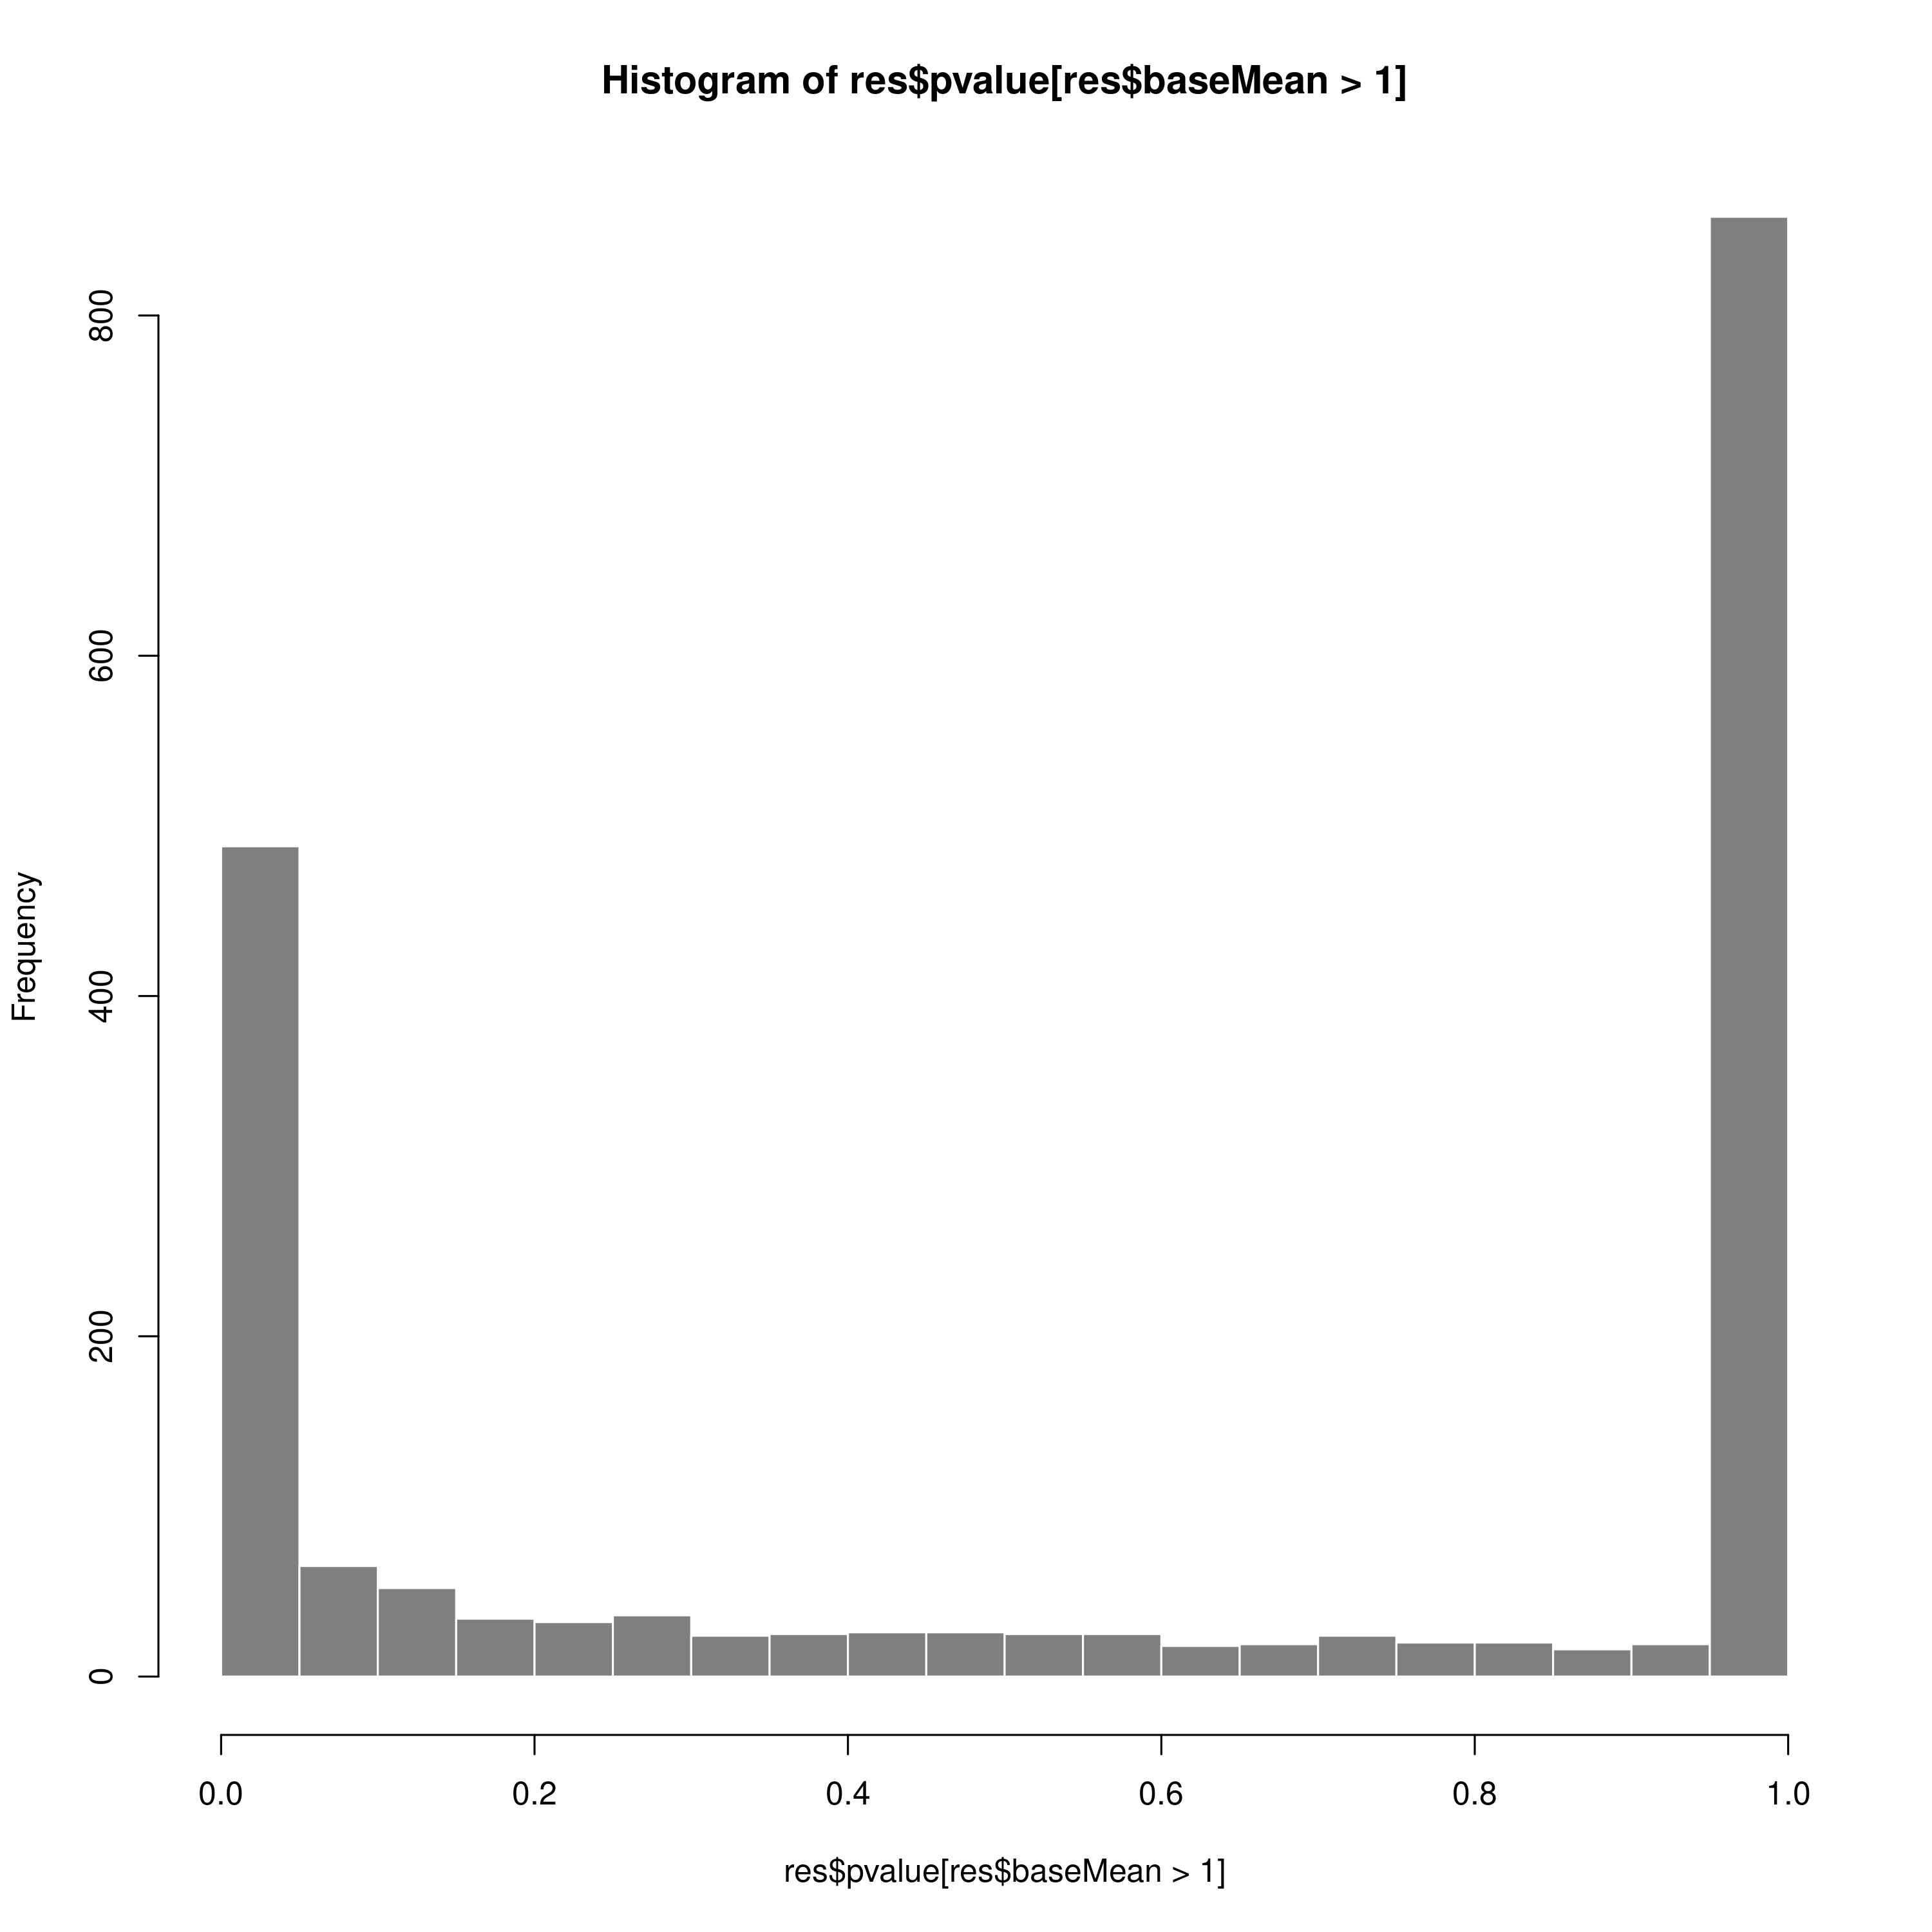

In [75]:
hist(res$pvalue[res$baseMean > 1], breaks = 0:20/20,
     col = "grey50", border = "white")

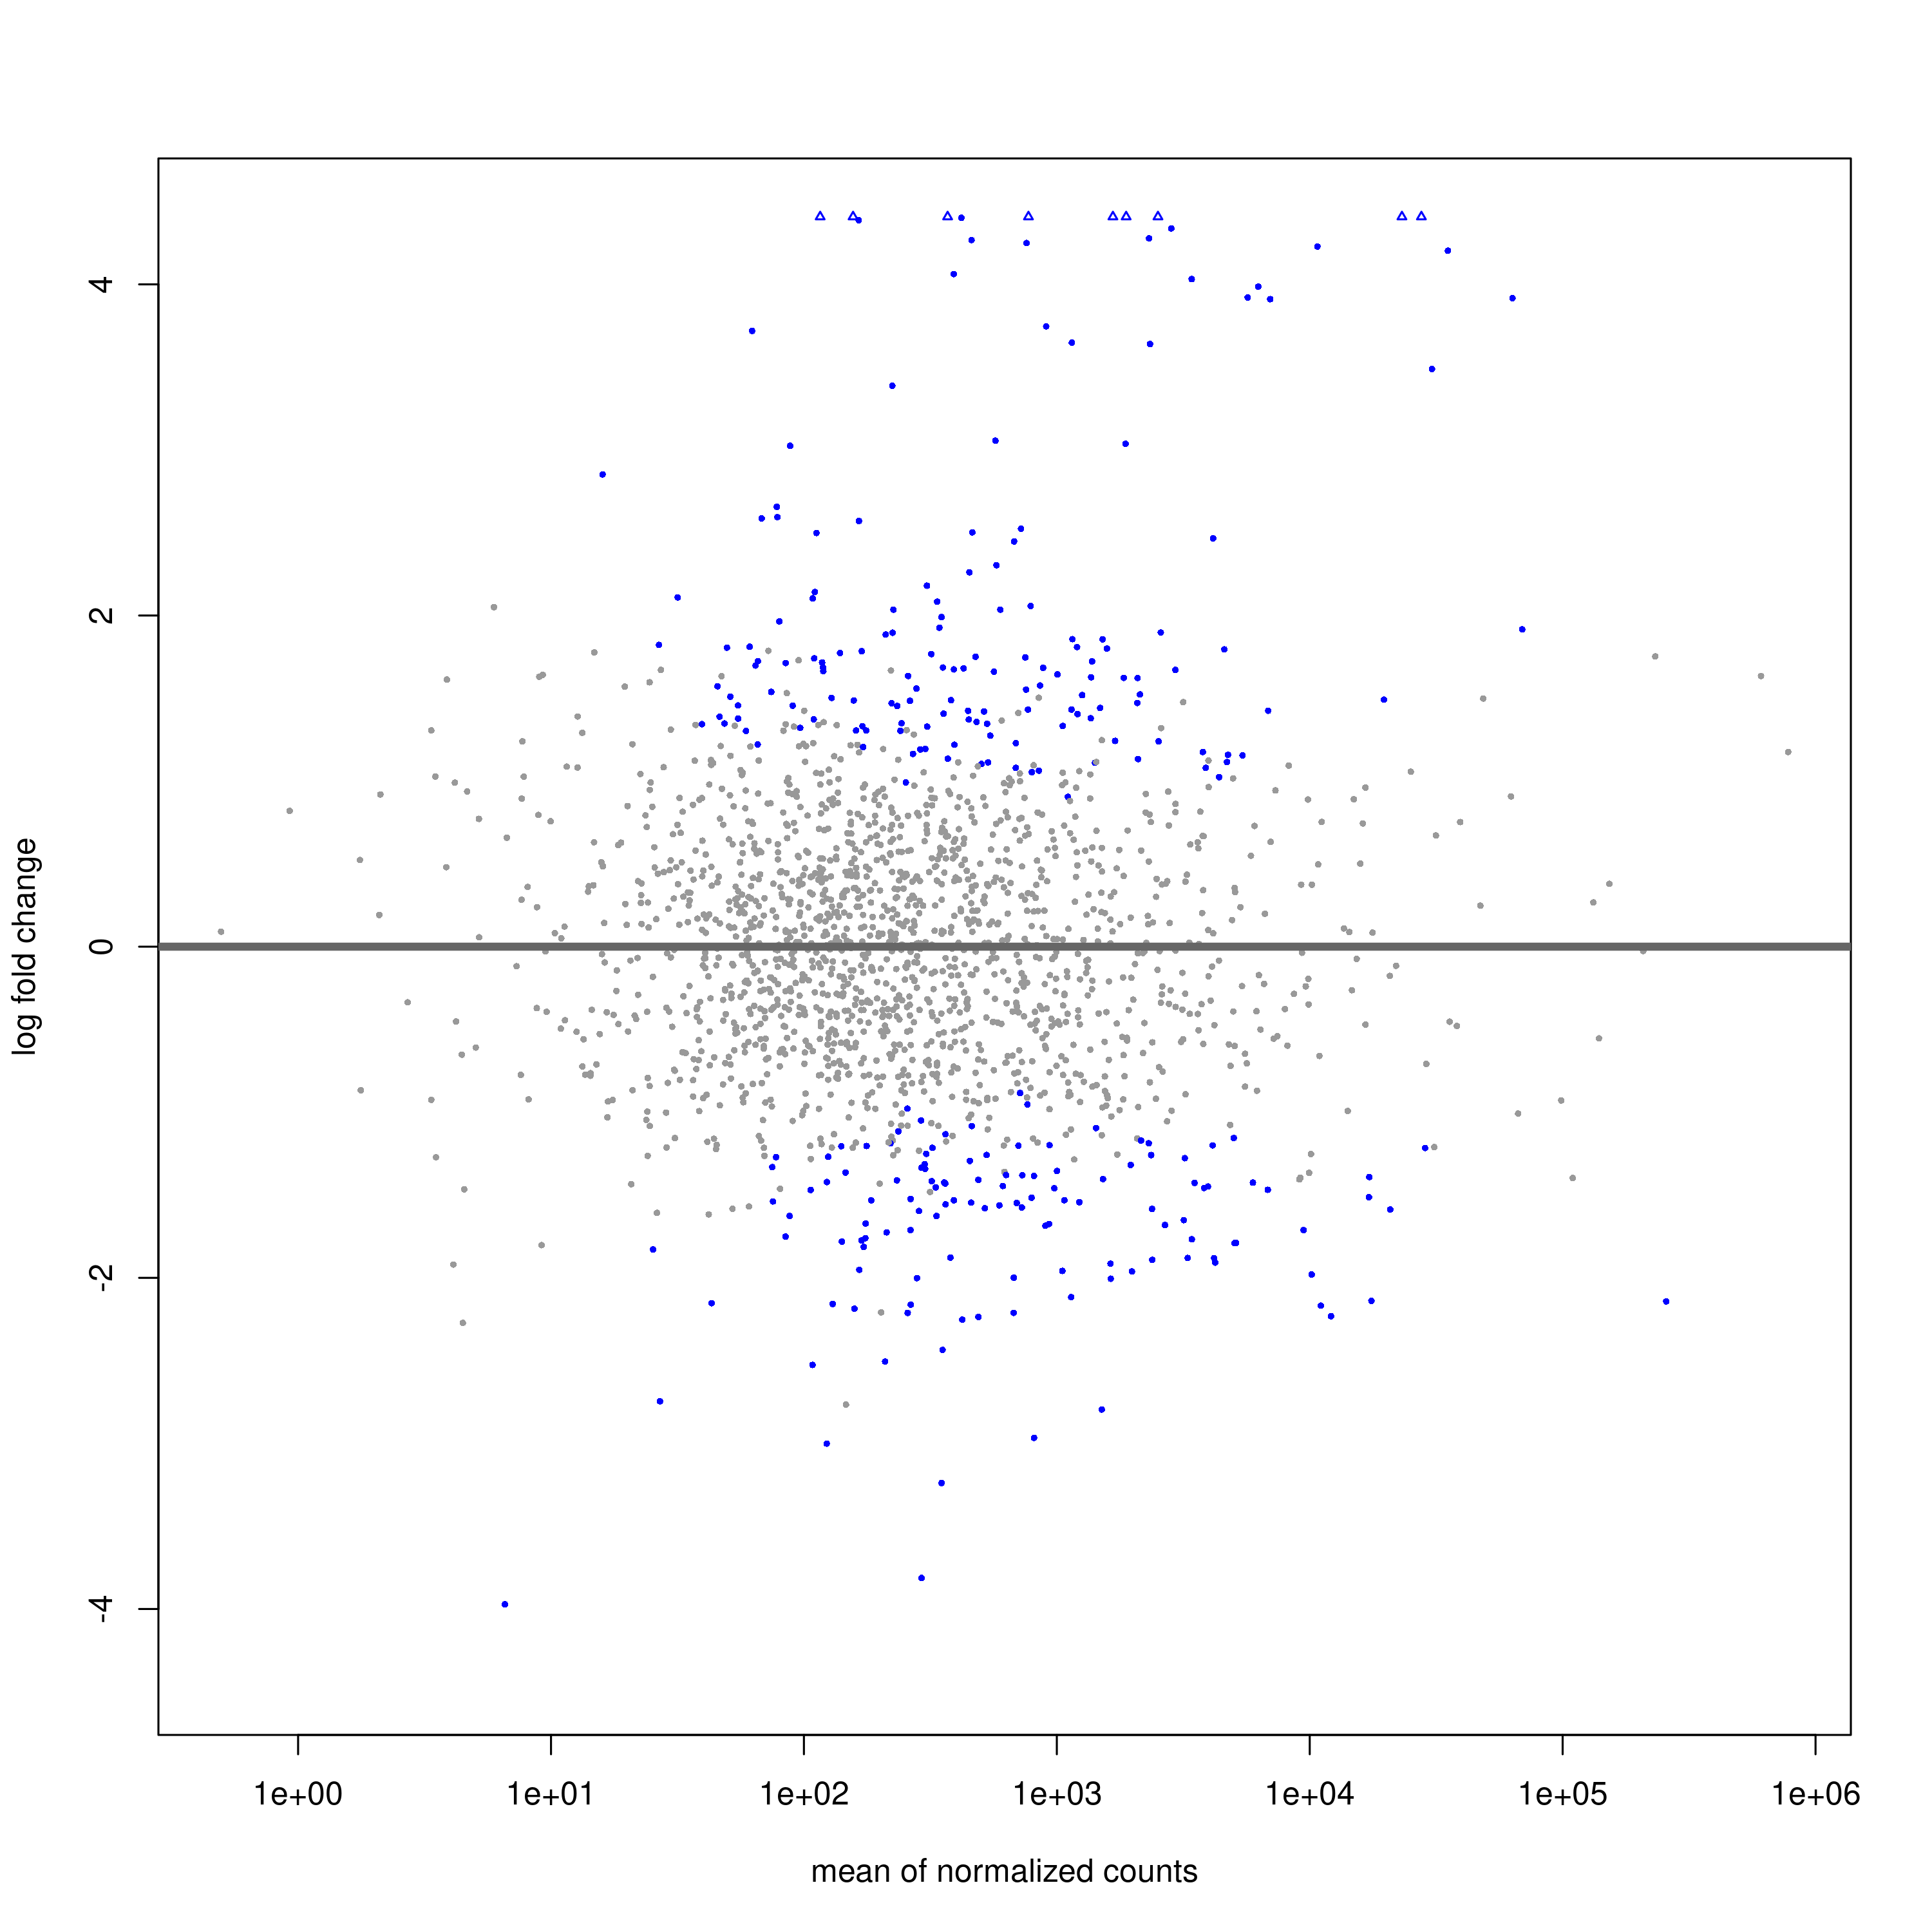

In [76]:
plotMA(res, #ylim=c(-2,2)
      )

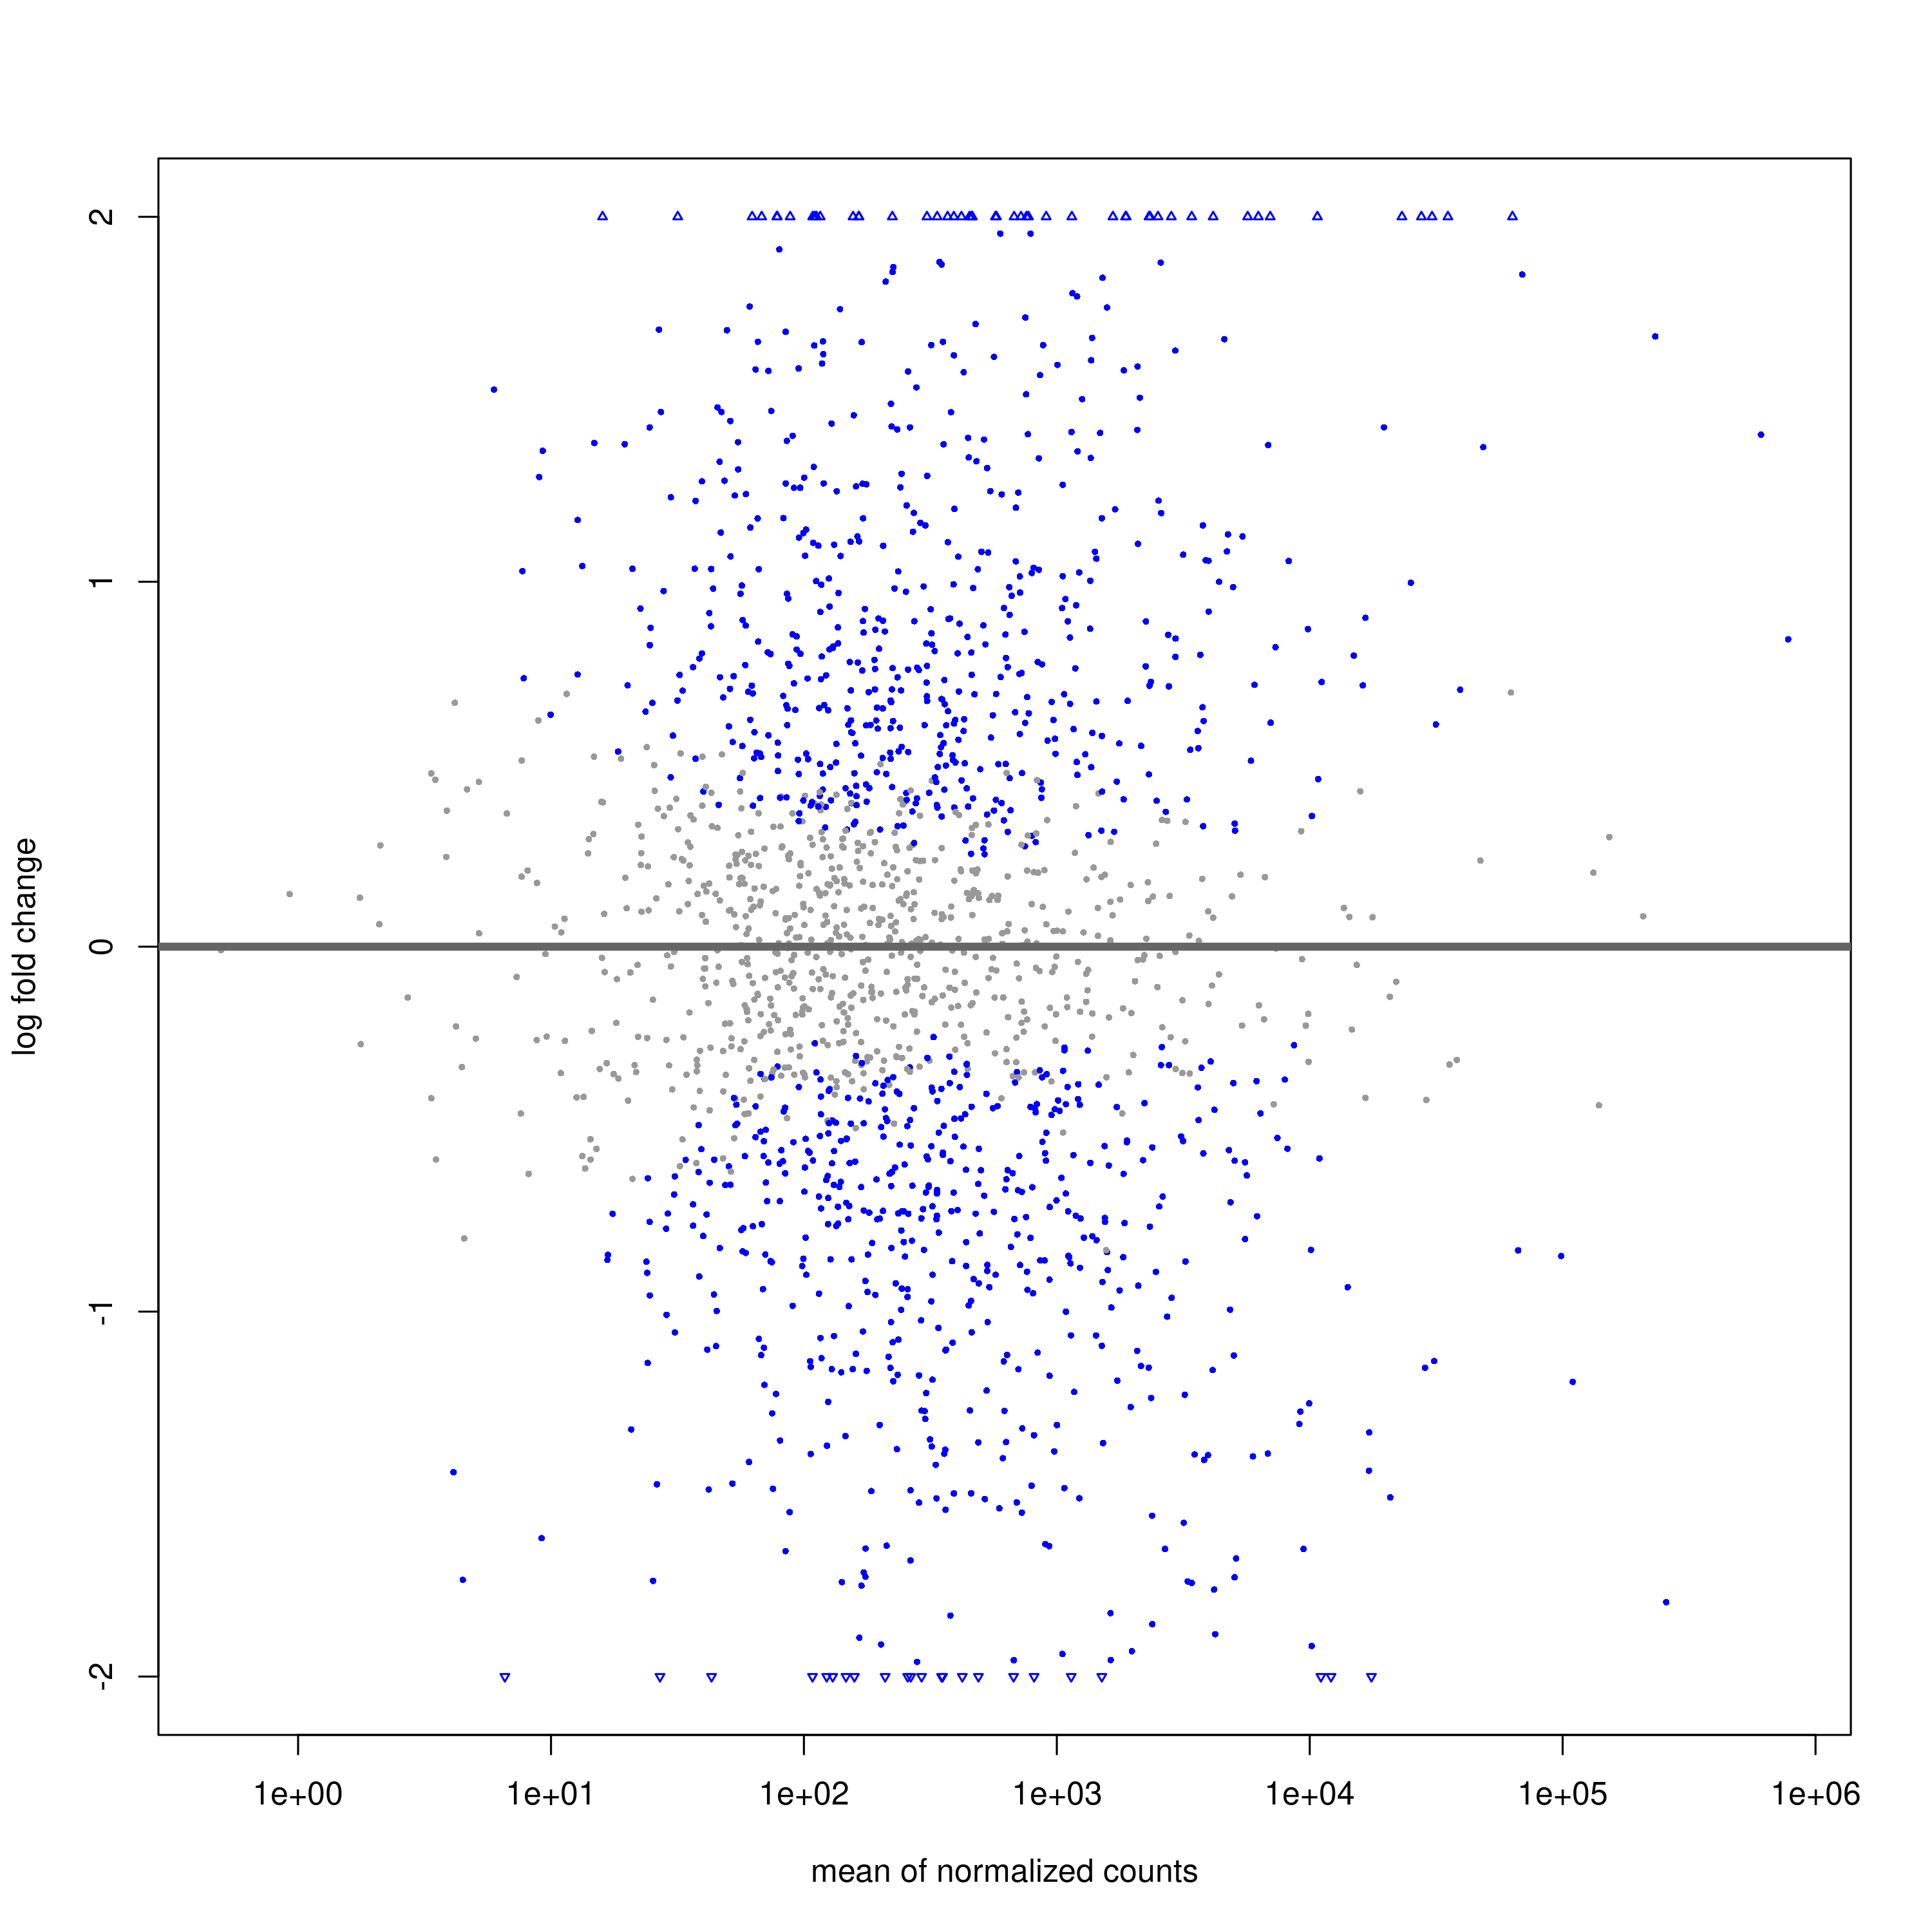

In [77]:
plotMA(resLFC, ylim=c(-2,2))

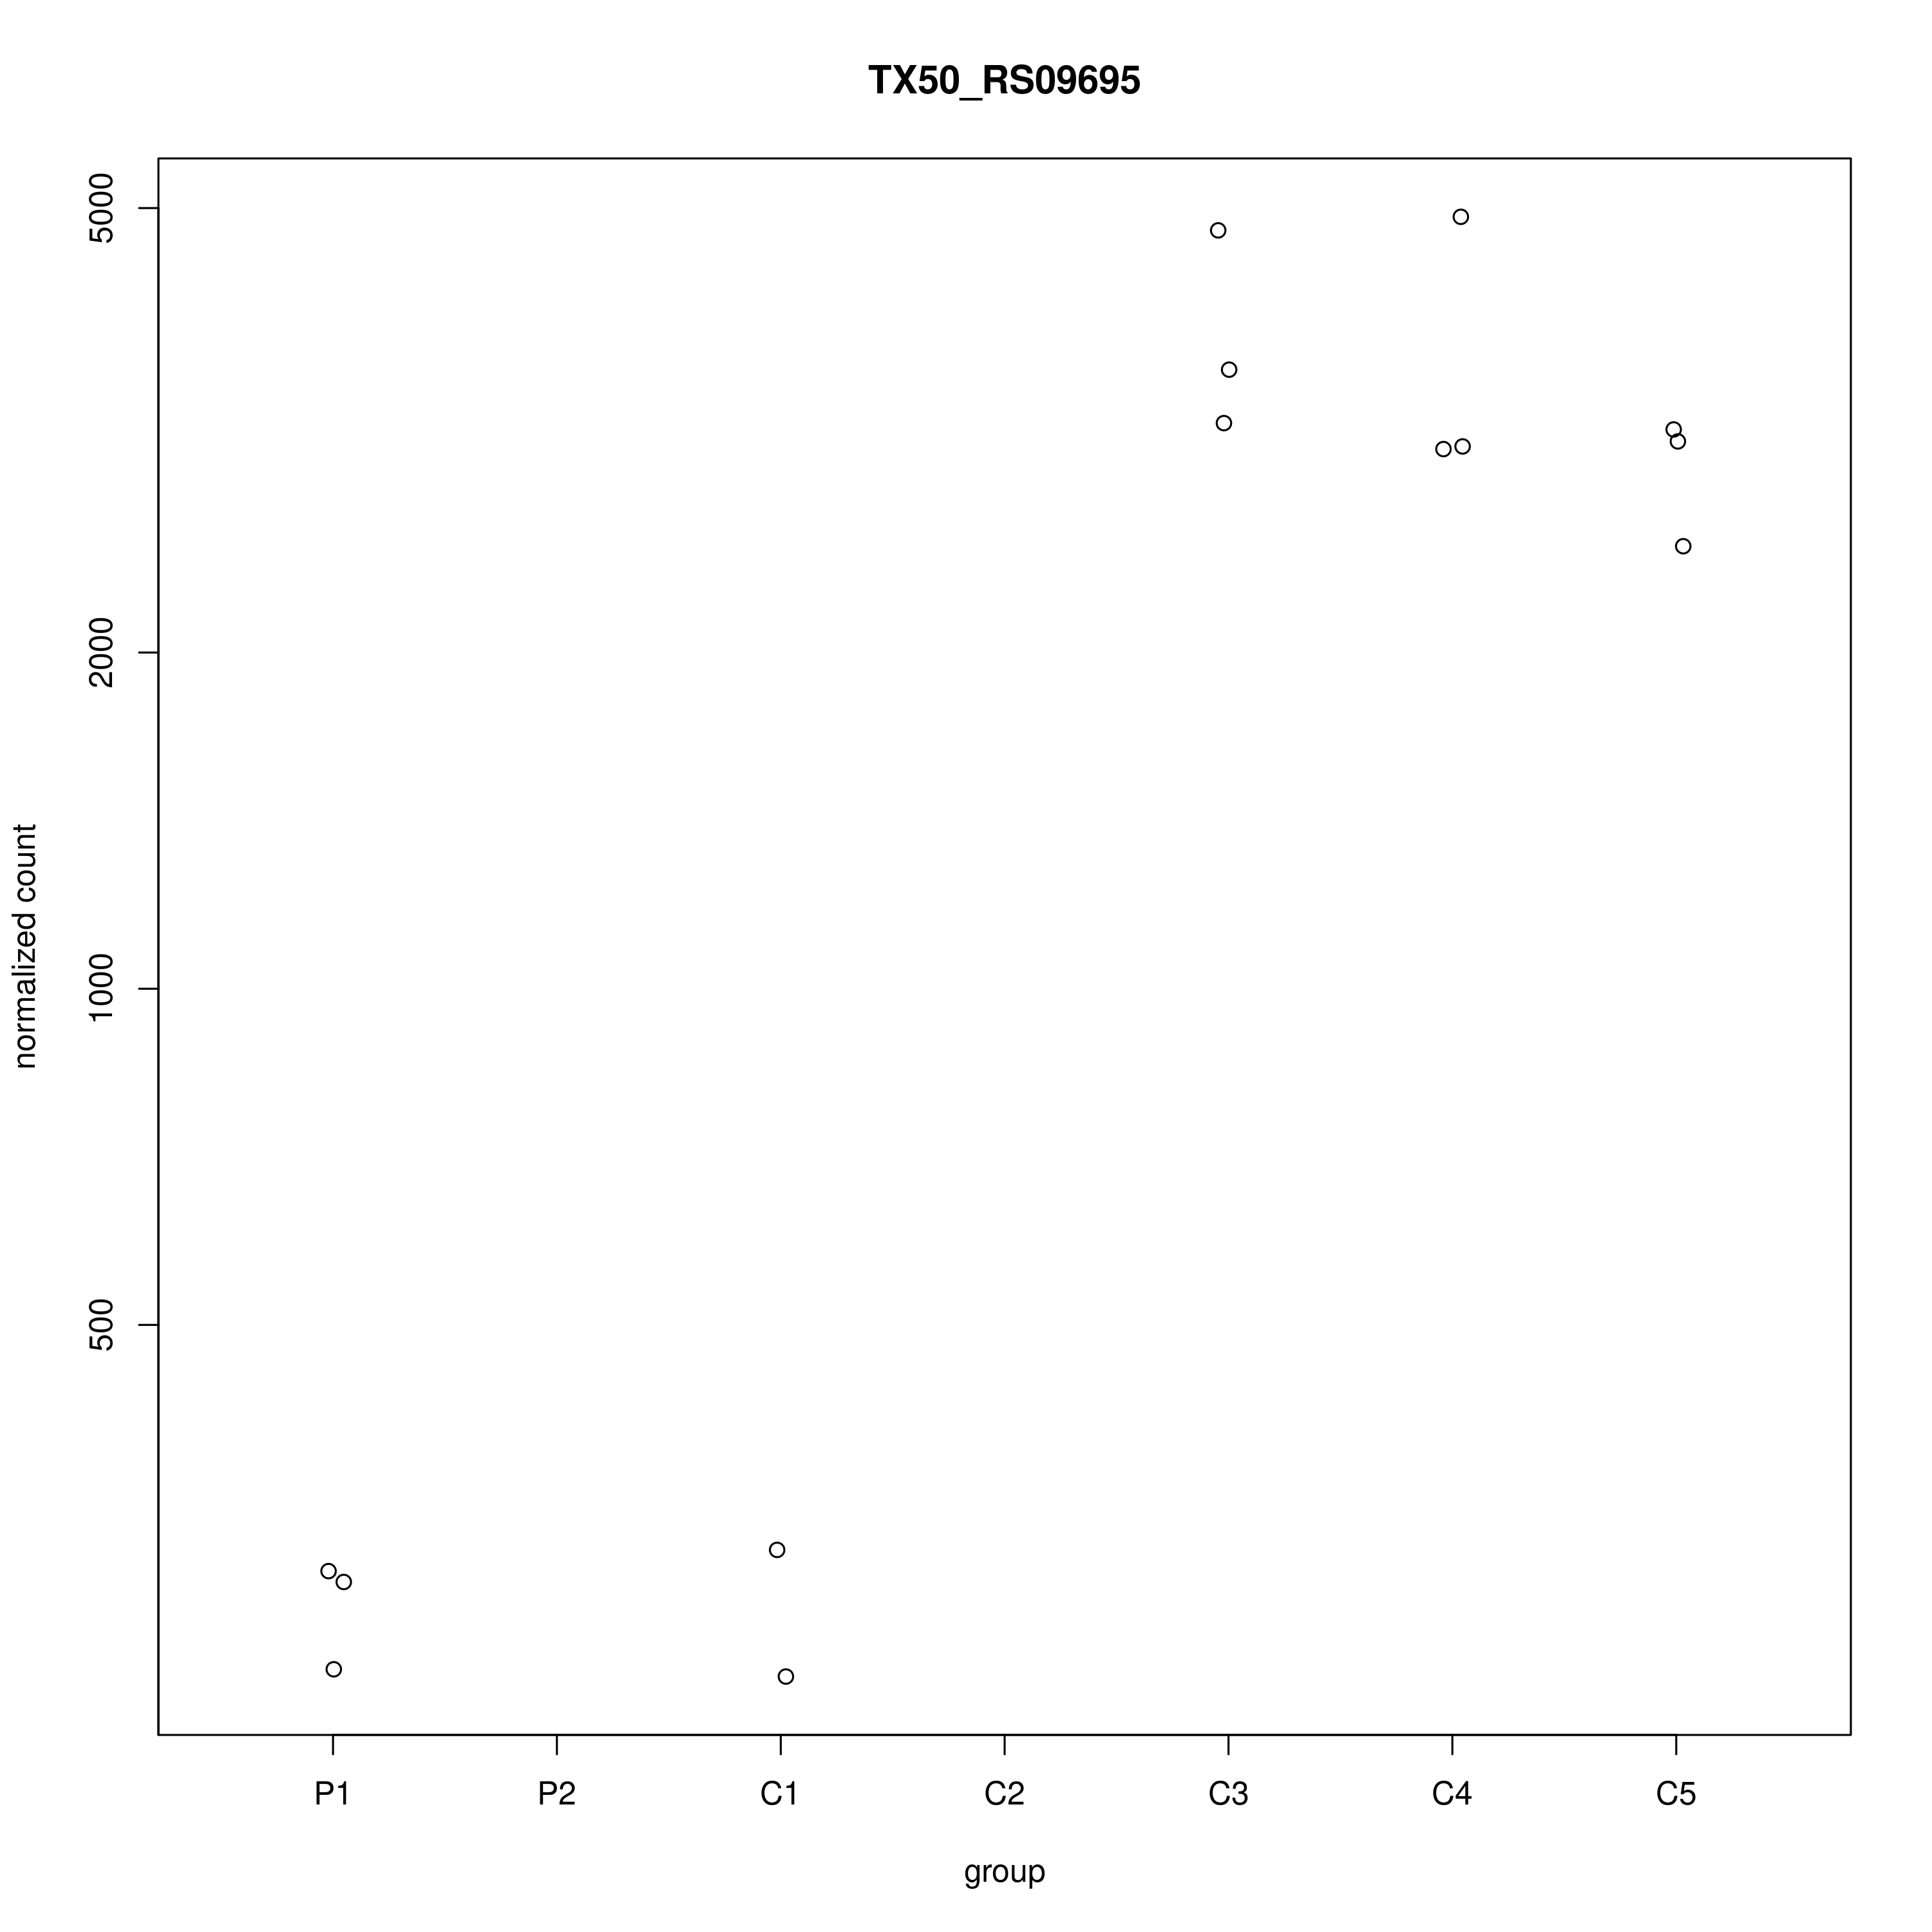

In [78]:
plotCounts(dds, gene=which.min(res$padj), intgroup="groupandtime")

In [79]:
which.min(res$padj)

[1] 1816

In [80]:
genes[which.min(res$padj),]

gene_id      gene product              protein_id    
TX50_RS09645 TX50_RS09645      hypothetical protein WP_173027978.1
             old_locus_tag
TX50_RS09645 NA

In [81]:
t(counts(dds)[(rowSums(counts(dds) >= 10) < 3),])

TX50_RS00950 TX50_RS01920 TX50_RS02775 TX50_RS03835 TX50_RS03850
C1A    3           8            2            0             0          
C1B    9           2            1            1             7          
C3A_1  9           0            0            0             2          
C3B    9           2            0            1             2          
C3C_1  2           1            4            0             0          
C4A    3           0            0            0             6          
C4B    5           4            0            0             9          
C4C    6           1            0            0             0          
C5A    2           0            1            0             2          
C5B    4           0            0            0             6          
C5C    9           1            5            2             2          
P1A   17           5            5            4            15          
P1B    8           0            4            0            11          
P1C   18           9            4            2             5          
      TX50_RS03940 TX50_RS04835 TX50_RS05495 TX50_RS06065 TX50_RS07590
C1A    3            2            0            0           1           
C1B   10           10           17           13           3           
C3A_1  0            1            1            0           1           
C3B    8            4            2            1           4           
C3C_1  6           18            1            0           0           
C4A    2            1            1            4           3           
C4B    4            0            3            2           0           
C4C    8            0            0            2           0           
C5A    3            5            1            0           0           
C5B    1            0            3            0           0           
C5C    3            0            1            5           7           
P1A    5            6            5            3           3           
P1B    3            0            9            2           1           
P1C   11            0            6            7           9           
      TX50_RS08155 TX50_RS08720 TX50_RS09400 TX50_RS09435 TX50_RS09760
C1A    4            2            3           0            2           
C1B   15            6            4           2            3           
C3A_1  1            0            5           1            6           
C3B    9            2            5           0            2           
C3C_1  3            1            1           0            2           
C4A    2            0            4           1            1           
C4B    6            0           16           0            0           
C4C   10            3            6           0            2           
C5A    0           12            0           4            2           
C5B    0            4            0           0            3           
C5C    1            2           10           0            0           
P1A    8            0            3           2            3           
P1B    3            9            4           0            9           
P1C    7            3            9           4            5

In [82]:
genes[(rowSums(counts(dds) >= 10) < 3),]

gene_id      gene product                                         
TX50_RS00950 TX50_RS00950      diacylglycerol kinase family protein            
TX50_RS01920 TX50_RS01920      hypothetical protein                            
TX50_RS02775 TX50_RS02775      hypothetical protein                            
TX50_RS03835 TX50_RS03835      helix-turn-helix domain-containing protein      
TX50_RS03850 TX50_RS03850      hypothetical protein                            
TX50_RS03940 TX50_RS03940      hypothetical protein                            
TX50_RS04810 TX50_RS04810      ATP phosphoribosyltransferase regulatory subunit
TX50_RS05470 TX50_RS05470      Nif11 family protein                            
TX50_RS06025 TX50_RS06025      HupE/UreJ family protein                        
TX50_RS07540 TX50_RS07540      hypothetical protein                            
TX50_RS08105 TX50_RS08105 rpsL 30S ribosomal protein S12                       
TX50_RS08670 TX50_RS08670 mreC rod shape-determining protein MreC              
TX50_RS09315 TX50_RS09315      hypothetical protein                            
TX50_RS09370 TX50_RS09370      DUF3721 domain-containing protein               
TX50_RS09710 TX50_RS09710      hypothetical protein                            
             protein_id     old_locus_tag
TX50_RS00950 WP_011131822.1 NA           
TX50_RS01920 WP_036930928.1 NA           
TX50_RS02775 WP_011132152.1 NA           
TX50_RS03835 WP_011132352.1 NA           
TX50_RS03850 WP_011132354.1 NA           
TX50_RS03940 WP_036930791.1 NA           
TX50_RS04810 WP_011132533.1 NA           
TX50_RS05470 WP_011132653.1 NA           
TX50_RS06025 WP_011132756.1 NA           
TX50_RS07540 WP_011133031.1 NA           
TX50_RS08105 WP_011133139.1 NA           
TX50_RS08670 WP_011133248.1 NA           
TX50_RS09315 WP_011132637.1 NA           
TX50_RS09370 WP_011133050.1 NA           
TX50_RS09710 WP_173028005.1 NA

In [83]:
vd = as.data.frame(assay(vsd))

In [84]:
vd = vd %>% 
   rownames_to_column(var = 'gene_id') %>% 
   pivot_longer(cols = colData(vsd)$sample, values_to = 'vsd', names_to = 'sample') %>%
   left_join(colData(vsd), by='sample', copy = TRUE) %>%
   group_by(gene_id, groupandtime) %>%
   summarise(mean_vsd = mean(vsd)) %>%
   pivot_wider(names_from = groupandtime, values_from = mean_vsd)


`summarise()` has grouped output by 'gene_id'. You can override using the `.groups` argument.


In [85]:
#vd = left_join(vd, colData(vsd), by = 'sample', copy = TRUE)
head(vd)

gene_id      P1        C1        C3        C4        C5       
1 TX50_RS00020 10.015374 10.107722 10.585341 10.577892 10.720340
2 TX50_RS00025  7.285399  7.308323  6.530315  6.820965  6.952582
3 TX50_RS00030  8.779912  8.644343  9.630061  9.791197  9.819833
4 TX50_RS00035  8.520463  8.465612  8.409186  8.715926  8.564586
5 TX50_RS00040  9.310853  9.376035  9.195784  9.497116  9.430944
6 TX50_RS00045  6.743701  6.967367  6.993464  7.156386  6.992150

In [86]:
res_df = res_df %>%
  mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) %>%
  filter(contrast != 'Intercept') #, !(contrast %in% c('A2_vs_A1', 'A3_vs_A1')))



In [87]:
vd = left_join(vd, res_df, by='gene_id')

In [88]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [89]:
table(vd$status)


          down no_significant        outlier             up 
           120           1588              1            146 

In [90]:
str(vd$status)

 chr [1:1855] "no_significant" "no_significant" "up" "no_significant" ...


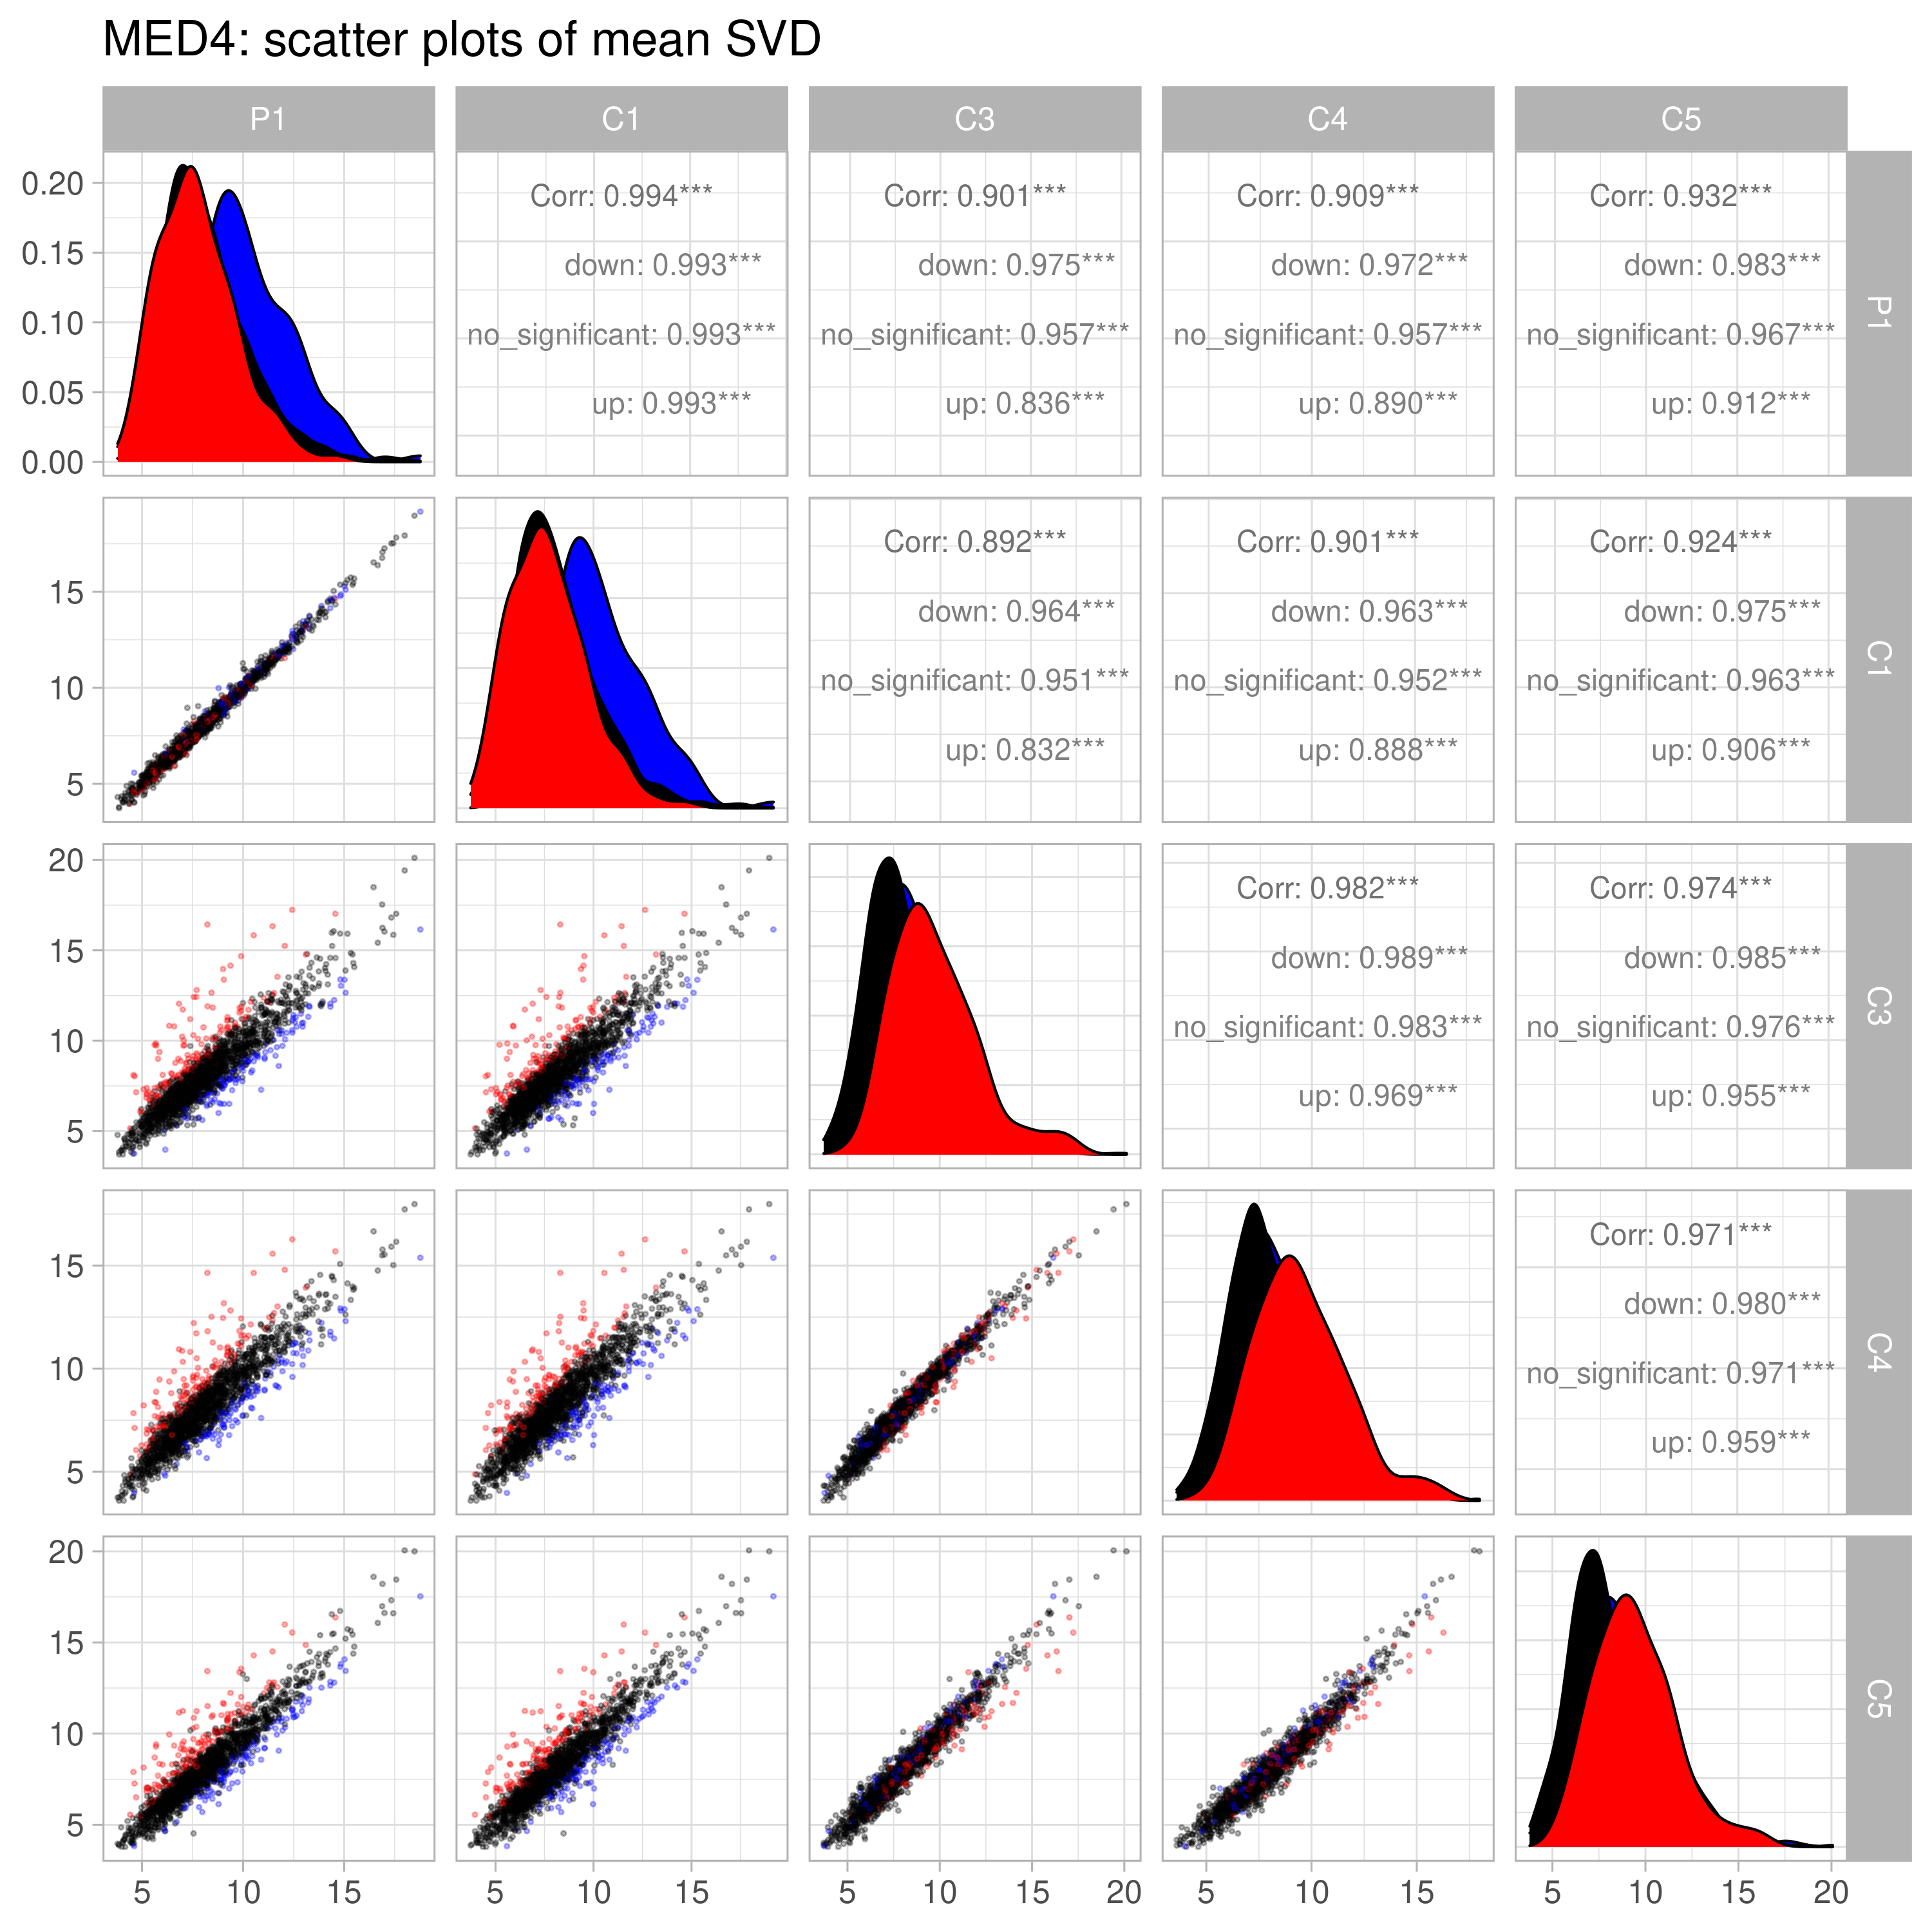

In [91]:

ggpairs(vd %>% filter(status != 'outlier'), columns = 2:6, 
        aes(colour=status),
        lower = list(continuous = wrap("points", alpha = 0.3, size=0.5)),
        title='MED4: scatter plots of mean SVD'

       ) +
  scale_color_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 
  scale_fill_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 

  theme_light(base_size = 15)

    #'no_significant''down''up''outlier'

In [92]:
path_df

gene_id                gene
1    TX50_RS00020           dnaN
2    TX50_RS00020           dnaN
3    TX50_RS00020           dnaN
4    TX50_RS00020           dnaN
5    TX50_RS00020           dnaN
6    TX50_RS00025               
7    TX50_RS00030           purL
8    TX50_RS00035           purF
9    TX50_RS00035           purF
10   TX50_RS00035           purF
11   TX50_RS00040               
12   TX50_RS00040               
13   TX50_RS00045               
14   TX50_RS00050           queG
15   TX50_RS00055               
16   TX50_RS00060           nusB
17   TX50_RS00060           nusB
18   TX50_RS00065           ftsY
19   TX50_RS00065           ftsY
20   TX50_RS00065           ftsY
21   TX50_RS00065           ftsY
22   TX50_RS00070               
23   TX50_RS00075           argH
24   TX50_RS00075           argH
25   TX50_RS00075           argH
26   TX50_RS00080               
27   TX50_RS00085           dusA
28   TX50_RS00090           msrB
29   TX50_RS00095           grpE
30   TX50_RS00095           grpE
⋮    ⋮                      ⋮   
2897 TX50_RS09770               
2898 TX50_RS09775               
2899 TX50_RS09780               
2900 TX50_RS09785               
2901 TX50_RS09790               
2902 TX50_RS09795               
2903 TX50_RS09800               
2904 TX50_RS09805               
2905 TX50_RS09810               
2906 TX50_RS09815               
2907 TX50_RS09820               
2908 TX50_RS09825               
2909 TX50_RS09830               
2910 TX50_RS09835               
2911 TX50_RS09840               
2912 TX50_RS09845               
2913 TX50_RS09850               
2914 TX50_RS09855               
2915 TX50_RS09860               
2916 TX50_RS09865               
2917 TX50_RS09870               
2918 TX50_RS09875               
2919 TX50_RS09880               
2920 TX50_RS09885               
2921 TX50_RS09890               
2922 __no_feature               
2923 __ambiguous                
2924 __too_low_aQual            
2925 __not_aligned              
2926 __alignment_not_unique     
     product                                                 protein_id    
1    DNA polymerase III subunit beta                         WP_011131639.1
2    DNA polymerase III subunit beta                         WP_011131639.1
3    DNA polymerase III subunit beta                         WP_011131639.1
4    DNA polymerase III subunit beta                         WP_011131639.1
5    DNA polymerase III subunit beta                         WP_011131639.1
6    hypothetical protein                                    WP_011131640.1
7    phosphoribosylformylglycinamidine synthase subunit PurL WP_011131641.1
8    amidophosphoribosyltransferase                          WP_011131642.1
9    amidophosphoribosyltransferase                          WP_011131642.1
10   amidophosphoribosyltransferase                          WP_011131642.1
11   DNA topoisomerase 4 subunit A                           WP_011131643.1
12   DNA topoisomerase 4 subunit A                           WP_011131643.1
13   tetratricopeptide repeat protein                        WP_011131644.1
14   tRNA epoxyqueuosine(34) reductase QueG                  WP_011131645.1
15   DUF502 domain-containing protein                        WP_011131646.1
16   transcription antitermination factor NusB               WP_036930720.1
17   transcription antitermination factor NusB               WP_036930720.1
18   signal recognition particle-docking protein FtsY        WP_011131648.1
19   signal recognition particle-docking protein FtsY        WP_011131648.1
20   signal recognition particle-docking protein FtsY        WP_011131648.1
21   signal recognition particle-docking protein FtsY        WP_011131648.1
22   serine/threonine-protein phosphatase                    WP_011131649.1
23   argininosuccinate lyase                                 WP_011131650.1
24   argininosuccinate lyase                                 WP_011131650.1
25   argininosuccinate lyase                               

In [93]:
gtf_fpath = file.path('..','genomes','MED4', 'genomic.gtf')
SAF <- Rsubread::flattenGTF(gtf_fpath, GTF.featureType = "CDS")
GeneLength <- rowsum(SAF$End-SAF$Start+1, SAF$GeneID)



Flattening GTF file: /fast_data/Osnat/CC1A3/GIT/CC1A3/genomes/MED4/genomic.gtf
Output SAF file: ./.Rsubread_flattenGTF_pid256427

Looking for 'CDS' features... (grouped by 'gene_id')

Finished.



In [94]:
GeneLength = as.data.frame(GeneLength)

In [95]:
names(GeneLength) = 'Length'

In [96]:
str(GeneLength)

'data.frame':	1865 obs. of  1 variable:
 $ Length: num  1155 705 2337 1458 2439 ...


In [97]:
GeneLength$gene_id = rownames(GeneLength)

In [98]:
res_df = left_join(res_df, GeneLength, by = 'gene_id')

In [99]:
res_df = res_df %>% 
    mutate(down = (status == 'down'),
           up   = (status == 'up')
)

In [100]:
head(res_df)

gene_id      baseMean  log2FoldChange lfcSE     stat       pvalue      
1 TX50_RS00020 1382.0165  0.59923609    0.1212434  0.8184863 0.4130795849
2 TX50_RS00025  105.1823 -0.60237404    0.2036271 -0.5027526 0.6151382201
3 TX50_RS00030  688.4678  1.07994530    0.1514614  3.8289983 0.0001286659
4 TX50_RS00035  350.6688  0.07797916    0.1270180  0.0000000 1.0000000000
5 TX50_RS00040  636.5248  0.04297486    0.1137501  0.0000000 1.0000000000
6 TX50_RS00045  105.8015  0.32696417    0.2218385  0.0000000 1.0000000000
  padj        contrast                   na_pvalue na_padj significant
1 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
2 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
3 0.001119134 treatment_long.term_vs_ref FALSE     FALSE    TRUE      
4 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
5 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
6 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
  direction status         Length down  up   
1 up        no_significant 1155   FALSE FALSE
2 down      no_significant  705   FALSE FALSE
3 up        up             2337   FALSE  TRUE
4 up        no_significant 1458   FALSE FALSE
5 up        no_significant 2439   FALSE FALSE
6 up        no_significant  852   FALSE FALSE

In [101]:
path_df = path_df %>% mutate(gene = if_else(gene != '', gene, gene_id))

In [102]:
path_df_to_export = path_df %>% 
     group_by(gene_id) %>% 
     mutate(
         main = paste0(unique(main), collapse = " // "),
         sub = paste0(unique(sub), collapse = " // "),
         path = paste0(unique(path), collapse = " // "),
         ecpath = paste0(unique(ecpath), collapse = " // ")
     ) %>%
    ungroup() %>%
    distinct(gene_id, .keep_all = TRUE)


In [103]:
inner_join(path_df_to_export, res_df) %>% 
  mutate(organism='MED4') %>% 
  select(c('gene_id','gene','product','status',
           'main','sub','path','ecpath',
           'baseMean','log2FoldChange','lfcSE','stat','pvalue','padj','contrast','Length','organism', 'protein_id')) %>%
  write_csv(file.path('DE_results','MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv'))

Joining, by = "gene_id"


Warning message:
“Removed 1 rows containing missing values (geom_point).”


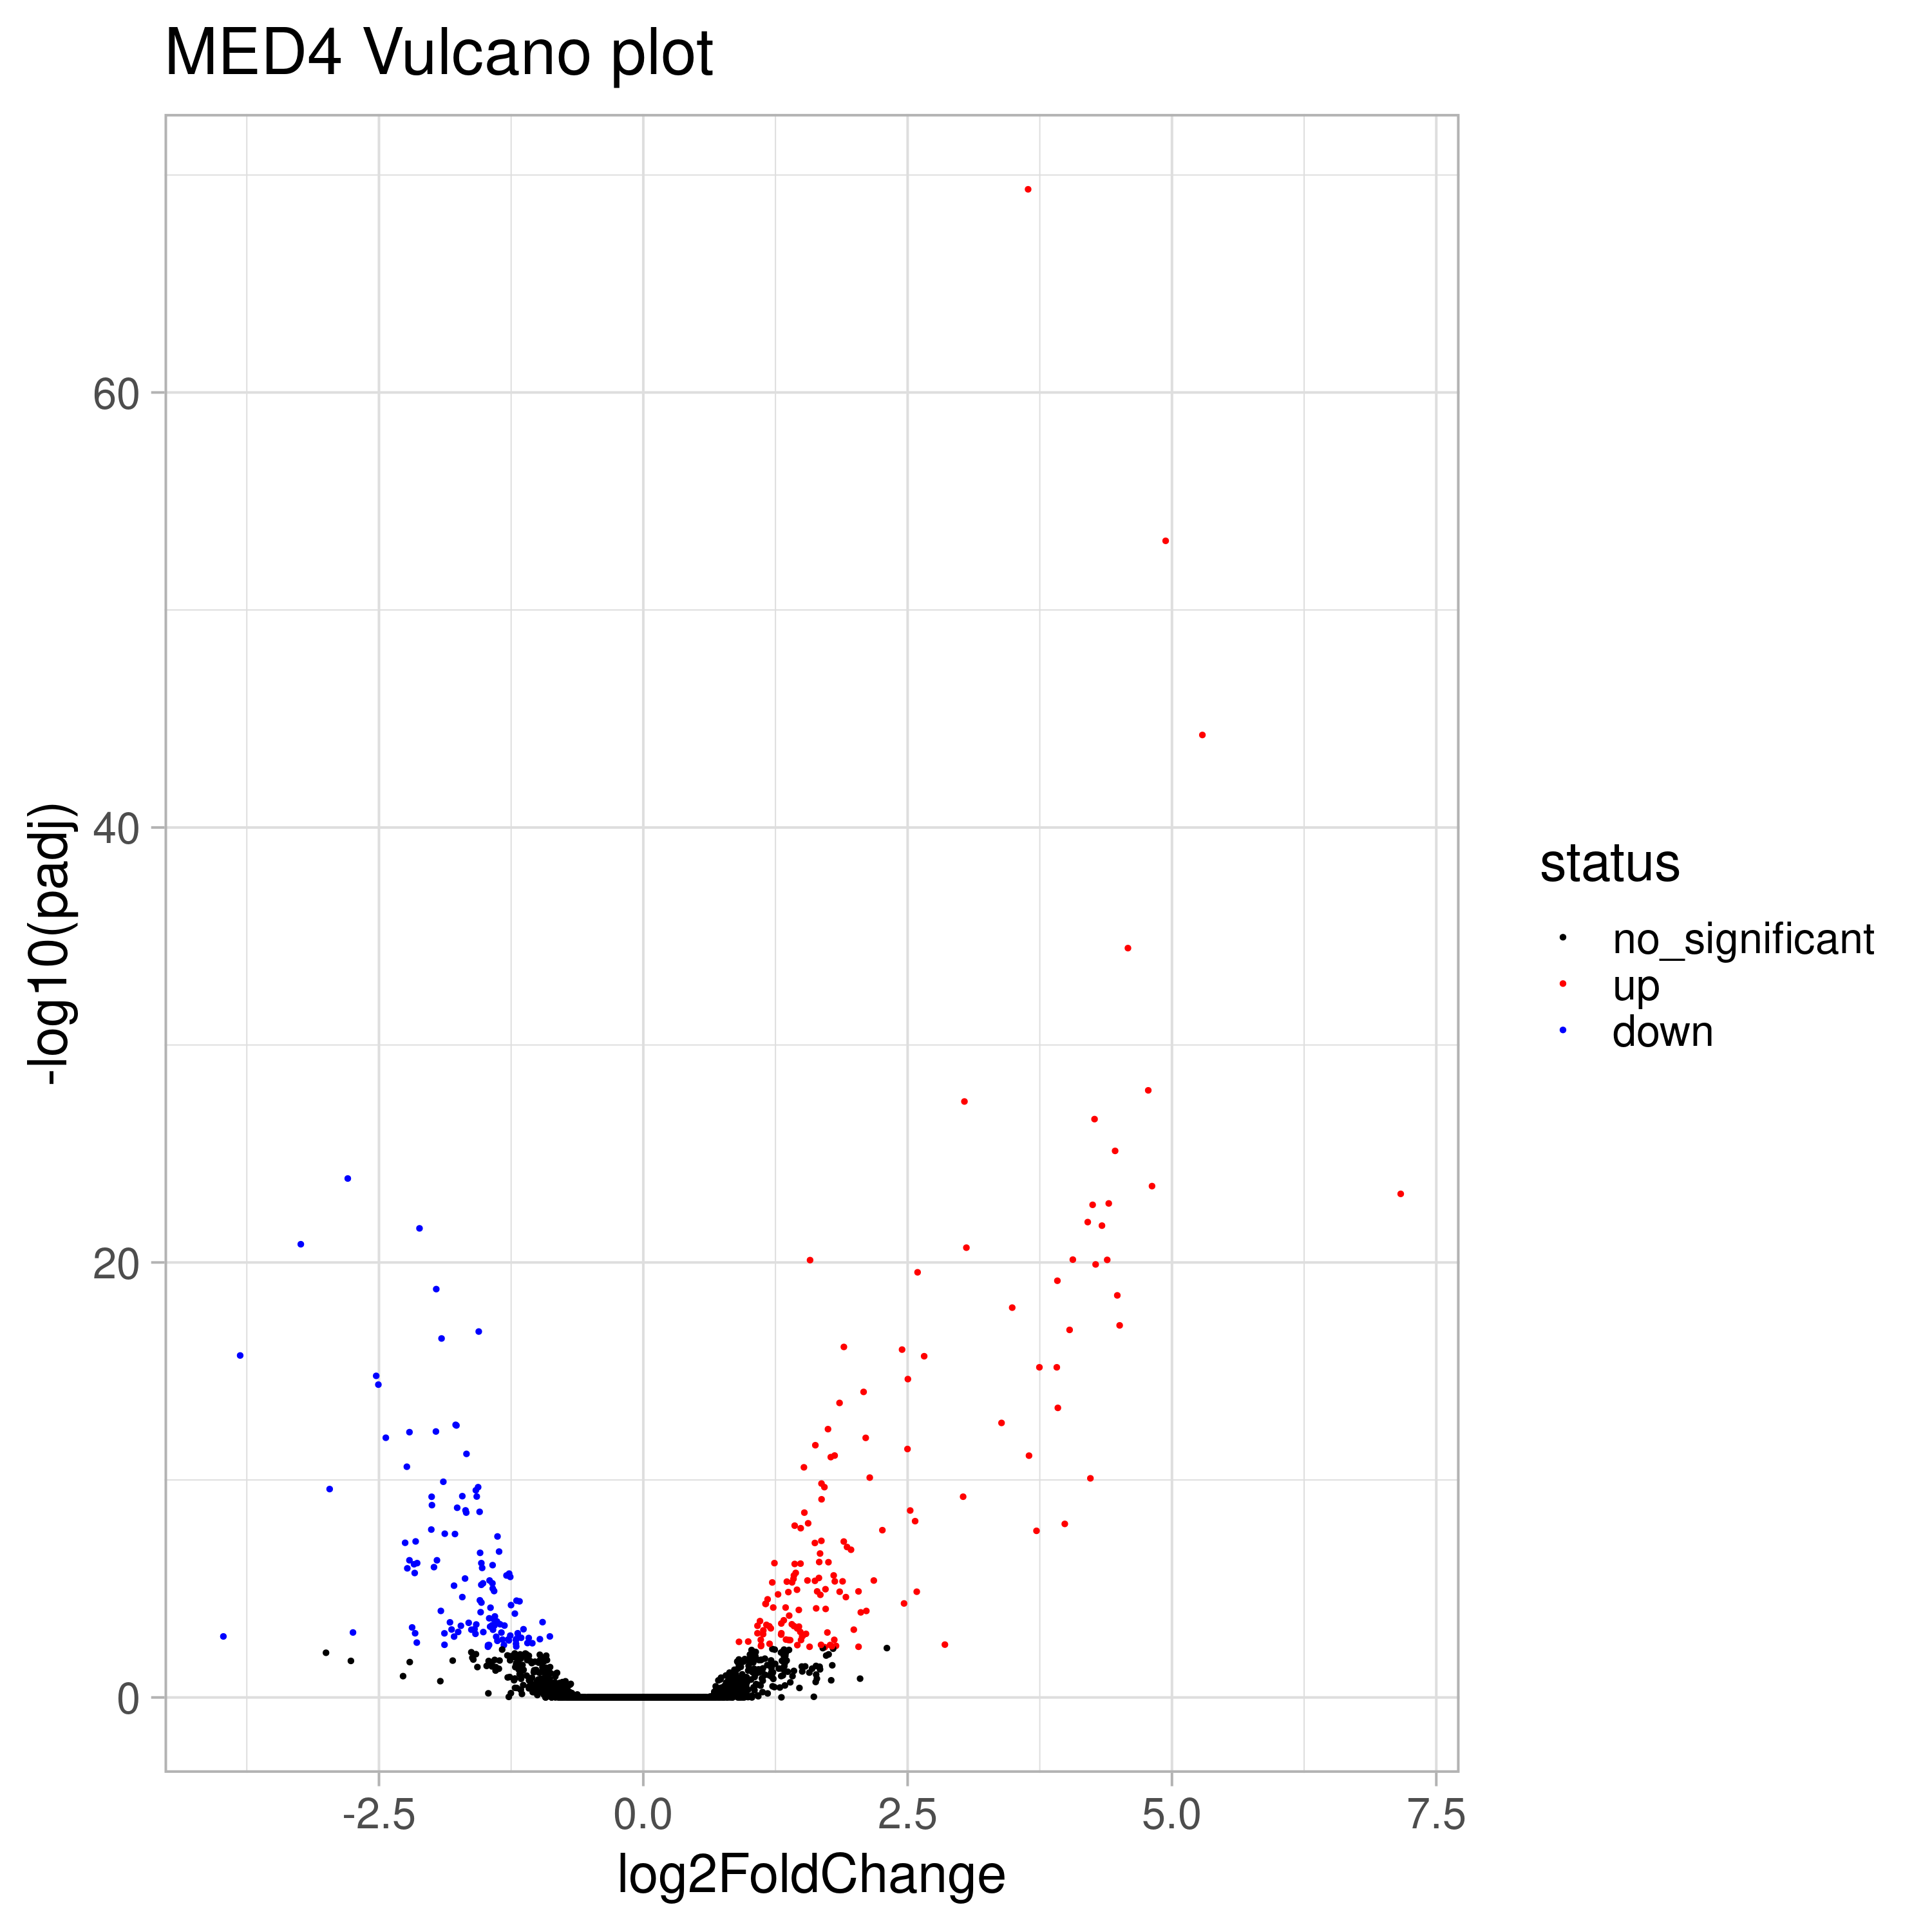

In [104]:
ggplot(res_df, aes(x=log2FoldChange, y=-log10(padj), color=status)) +
  geom_point(size=0.5) +
  scale_color_manual(values = c(no_significant='black',up='red', down='blue' )) +
  ggtitle('MED4 Vulcano plot') +
  theme_light(base_size = 20)
  

  

Warning message:
“Removed 62 rows containing missing values (geom_point).”


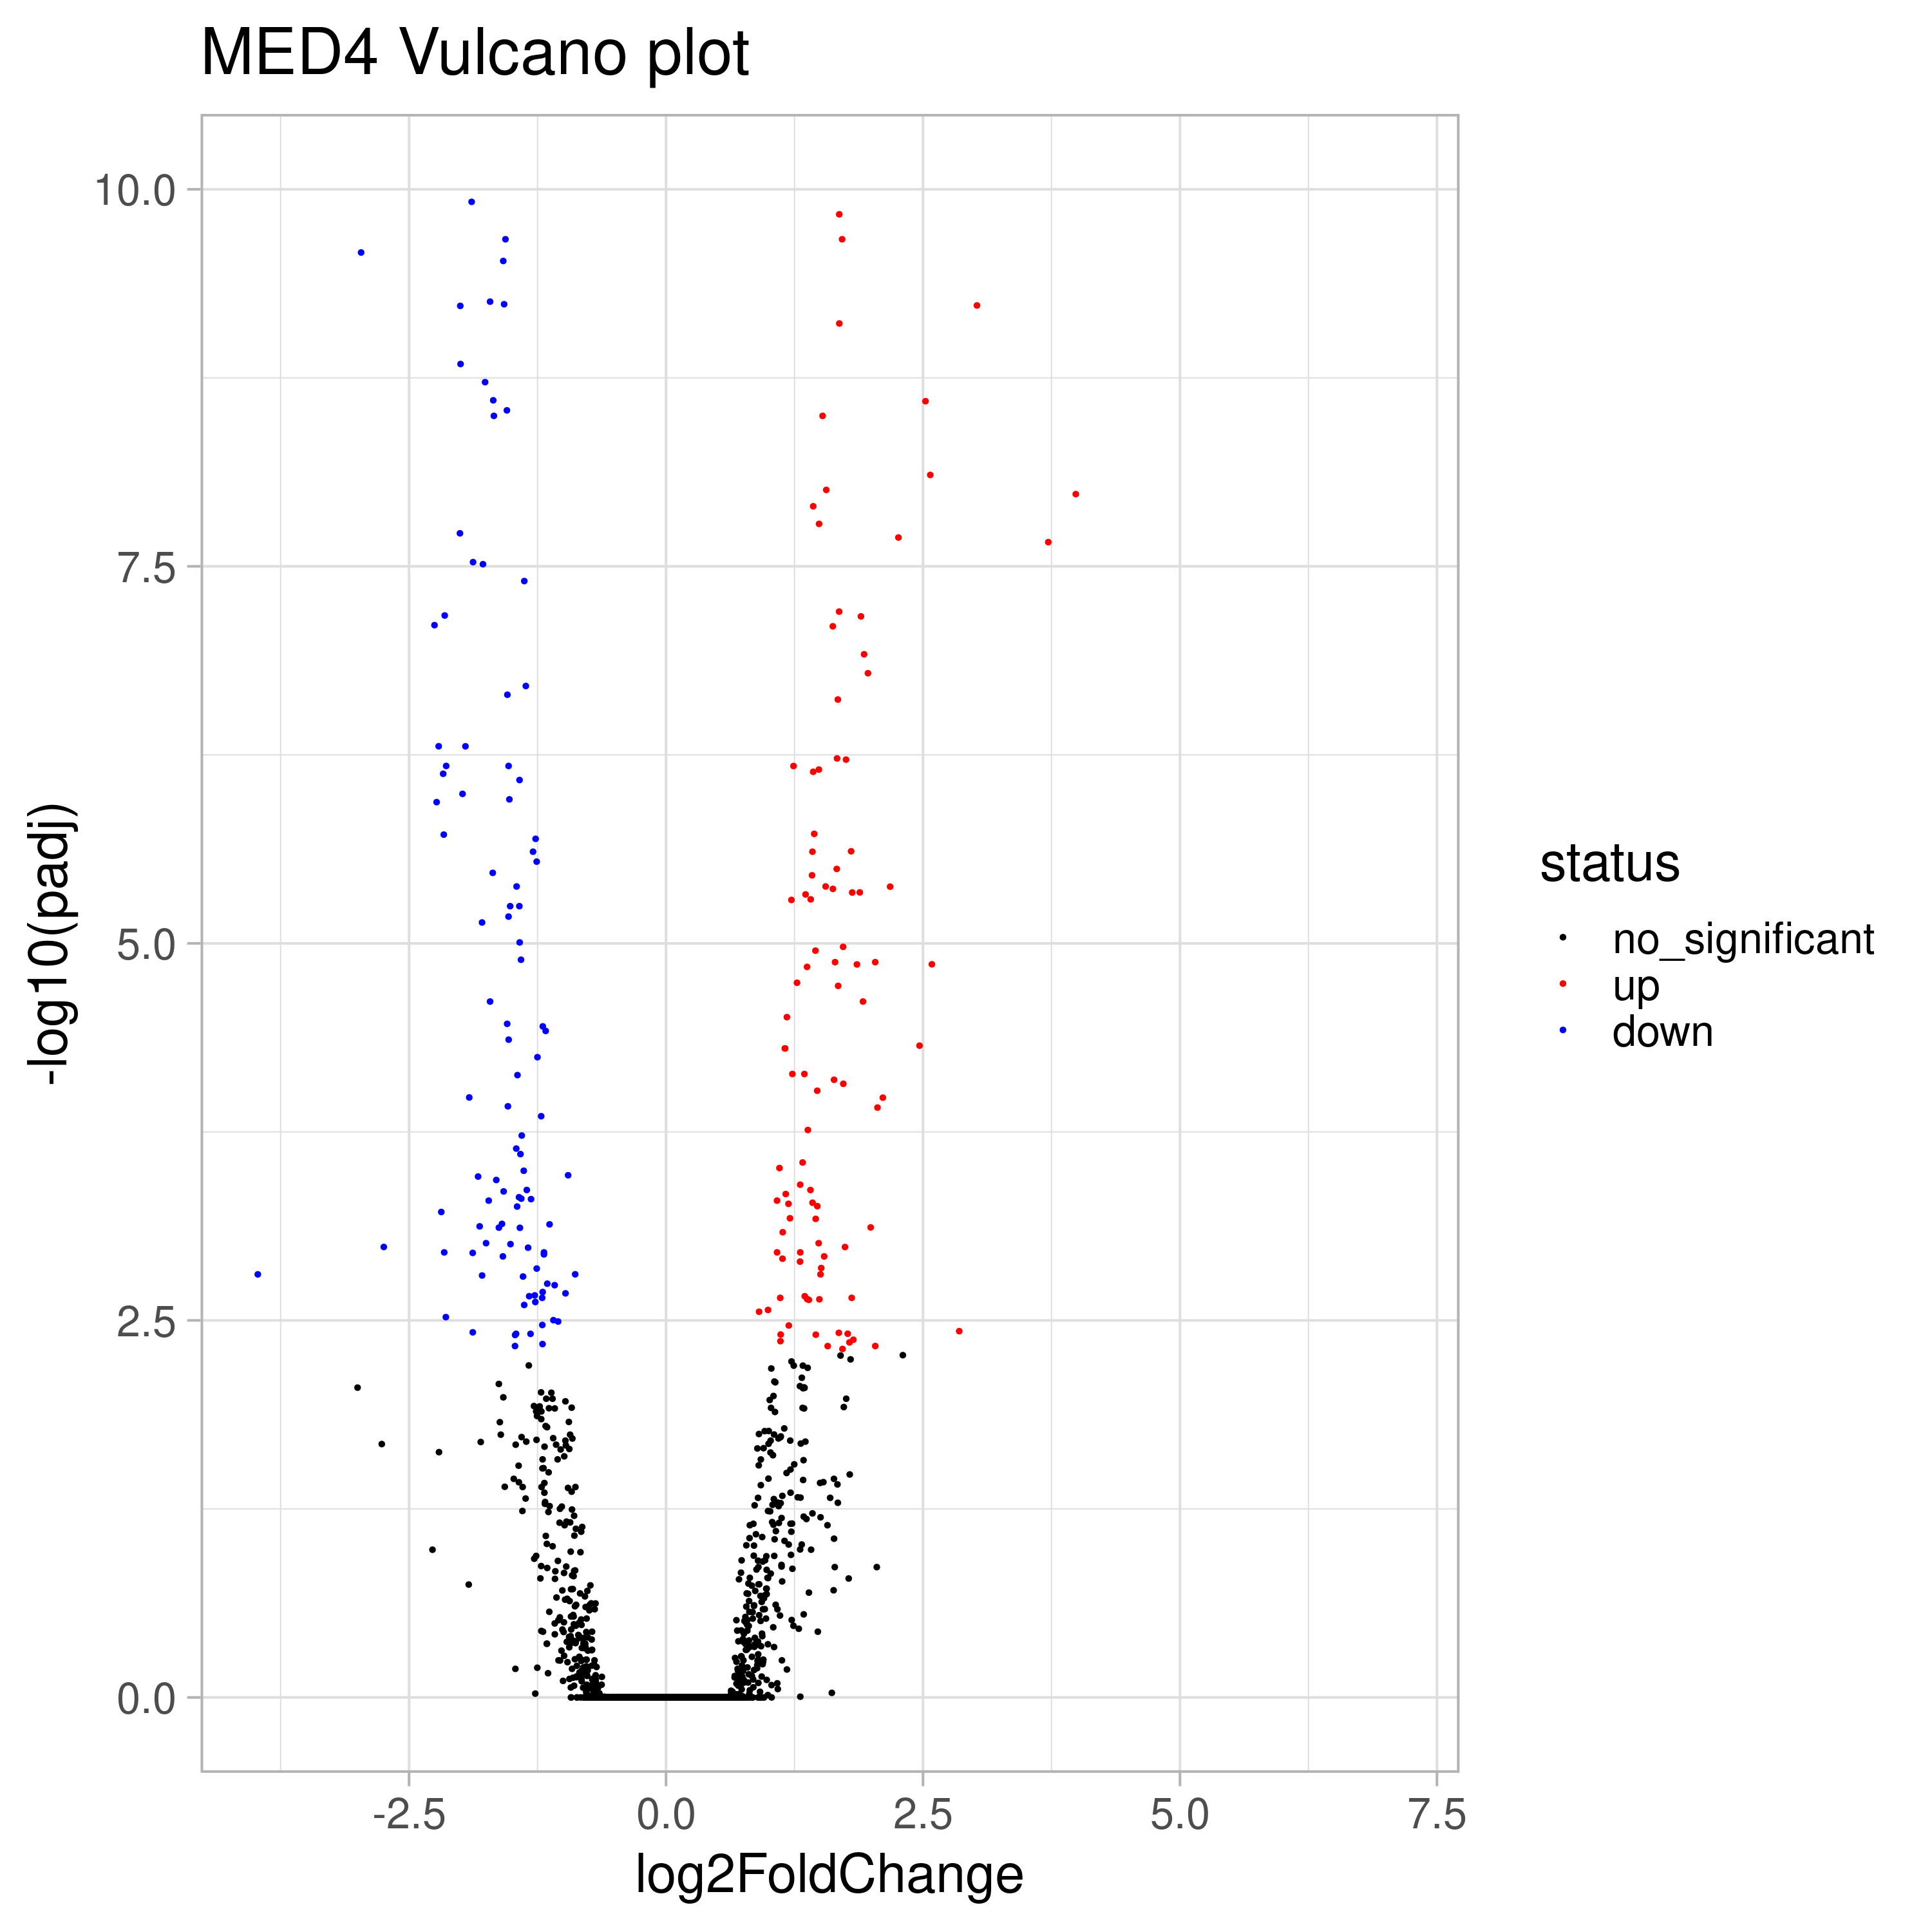

In [105]:
ggplot(res_df, aes(x=log2FoldChange, y=-log10(padj), color=status)) +
  geom_point(size=0.5) +
  scale_color_manual(values = c(no_significant='black',up='red', down='blue' )) +
  ggtitle('MED4 Vulcano plot') +
  theme_light(base_size = 20) + ylim(0,10)
  

  

In [106]:
ignore_main = c('09160 Human Diseases', 
                '09150 Organismal Systems', 
                '09190 Not Included in Pathway or Brite', 
                '09180 Brite Hierarchies',
                ''
               )

In [107]:
run_enrichment <- function(encolname, testcolname) {
    #cat_df = path_df %>% select(encolname, main) %>% distinct()    
    mpath_df = path_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(PATH = word(PATH)) %>%
       distinct(PATH, gene_id, .keep_all= TRUE) %>%
       select(gene_id, PATH)
    path_names = path_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(category = word(PATH)) %>%
       distinct(category, .keep_all= TRUE) %>%
       select(category, PATH, main)
    test_df = res_df %>% drop_na(significant)
    test_df$sigval = if_else(test_df[[testcolname]], 1, 0)
    DEgenes = test_df$sigval
    names(DEgenes) = test_df$gene_id
    table(DEgenes)
    LENgenes = test_df$Length
    names(LENgenes) = test_df$gene_id
    pwf = nullp(DEgenes, bias.data=LENgenes)
    goseq_res = goseq(pwf, gene2cat = as.data.frame(mpath_df))
    goseq_res = left_join(goseq_res, path_names)
    goseq_res = goseq_res %>% filter(numInCat>=5) %>% filter(!main %in% ignore_main)
    goseq_res$padj = p.adjust(goseq_res$over_represented_pvalue, method="BH")
    goseq_res = goseq_res %>%
       relocate(padj, .after = over_represented_pvalue) %>%
       relocate(PATH, .after = category) 
    goseq_res$type = testcolname
    goseq_res$enrich = encolname
    goseq_res$organism = 'HOT1A3'
    #return(mpath_df)
    return (goseq_res)
}

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"
Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


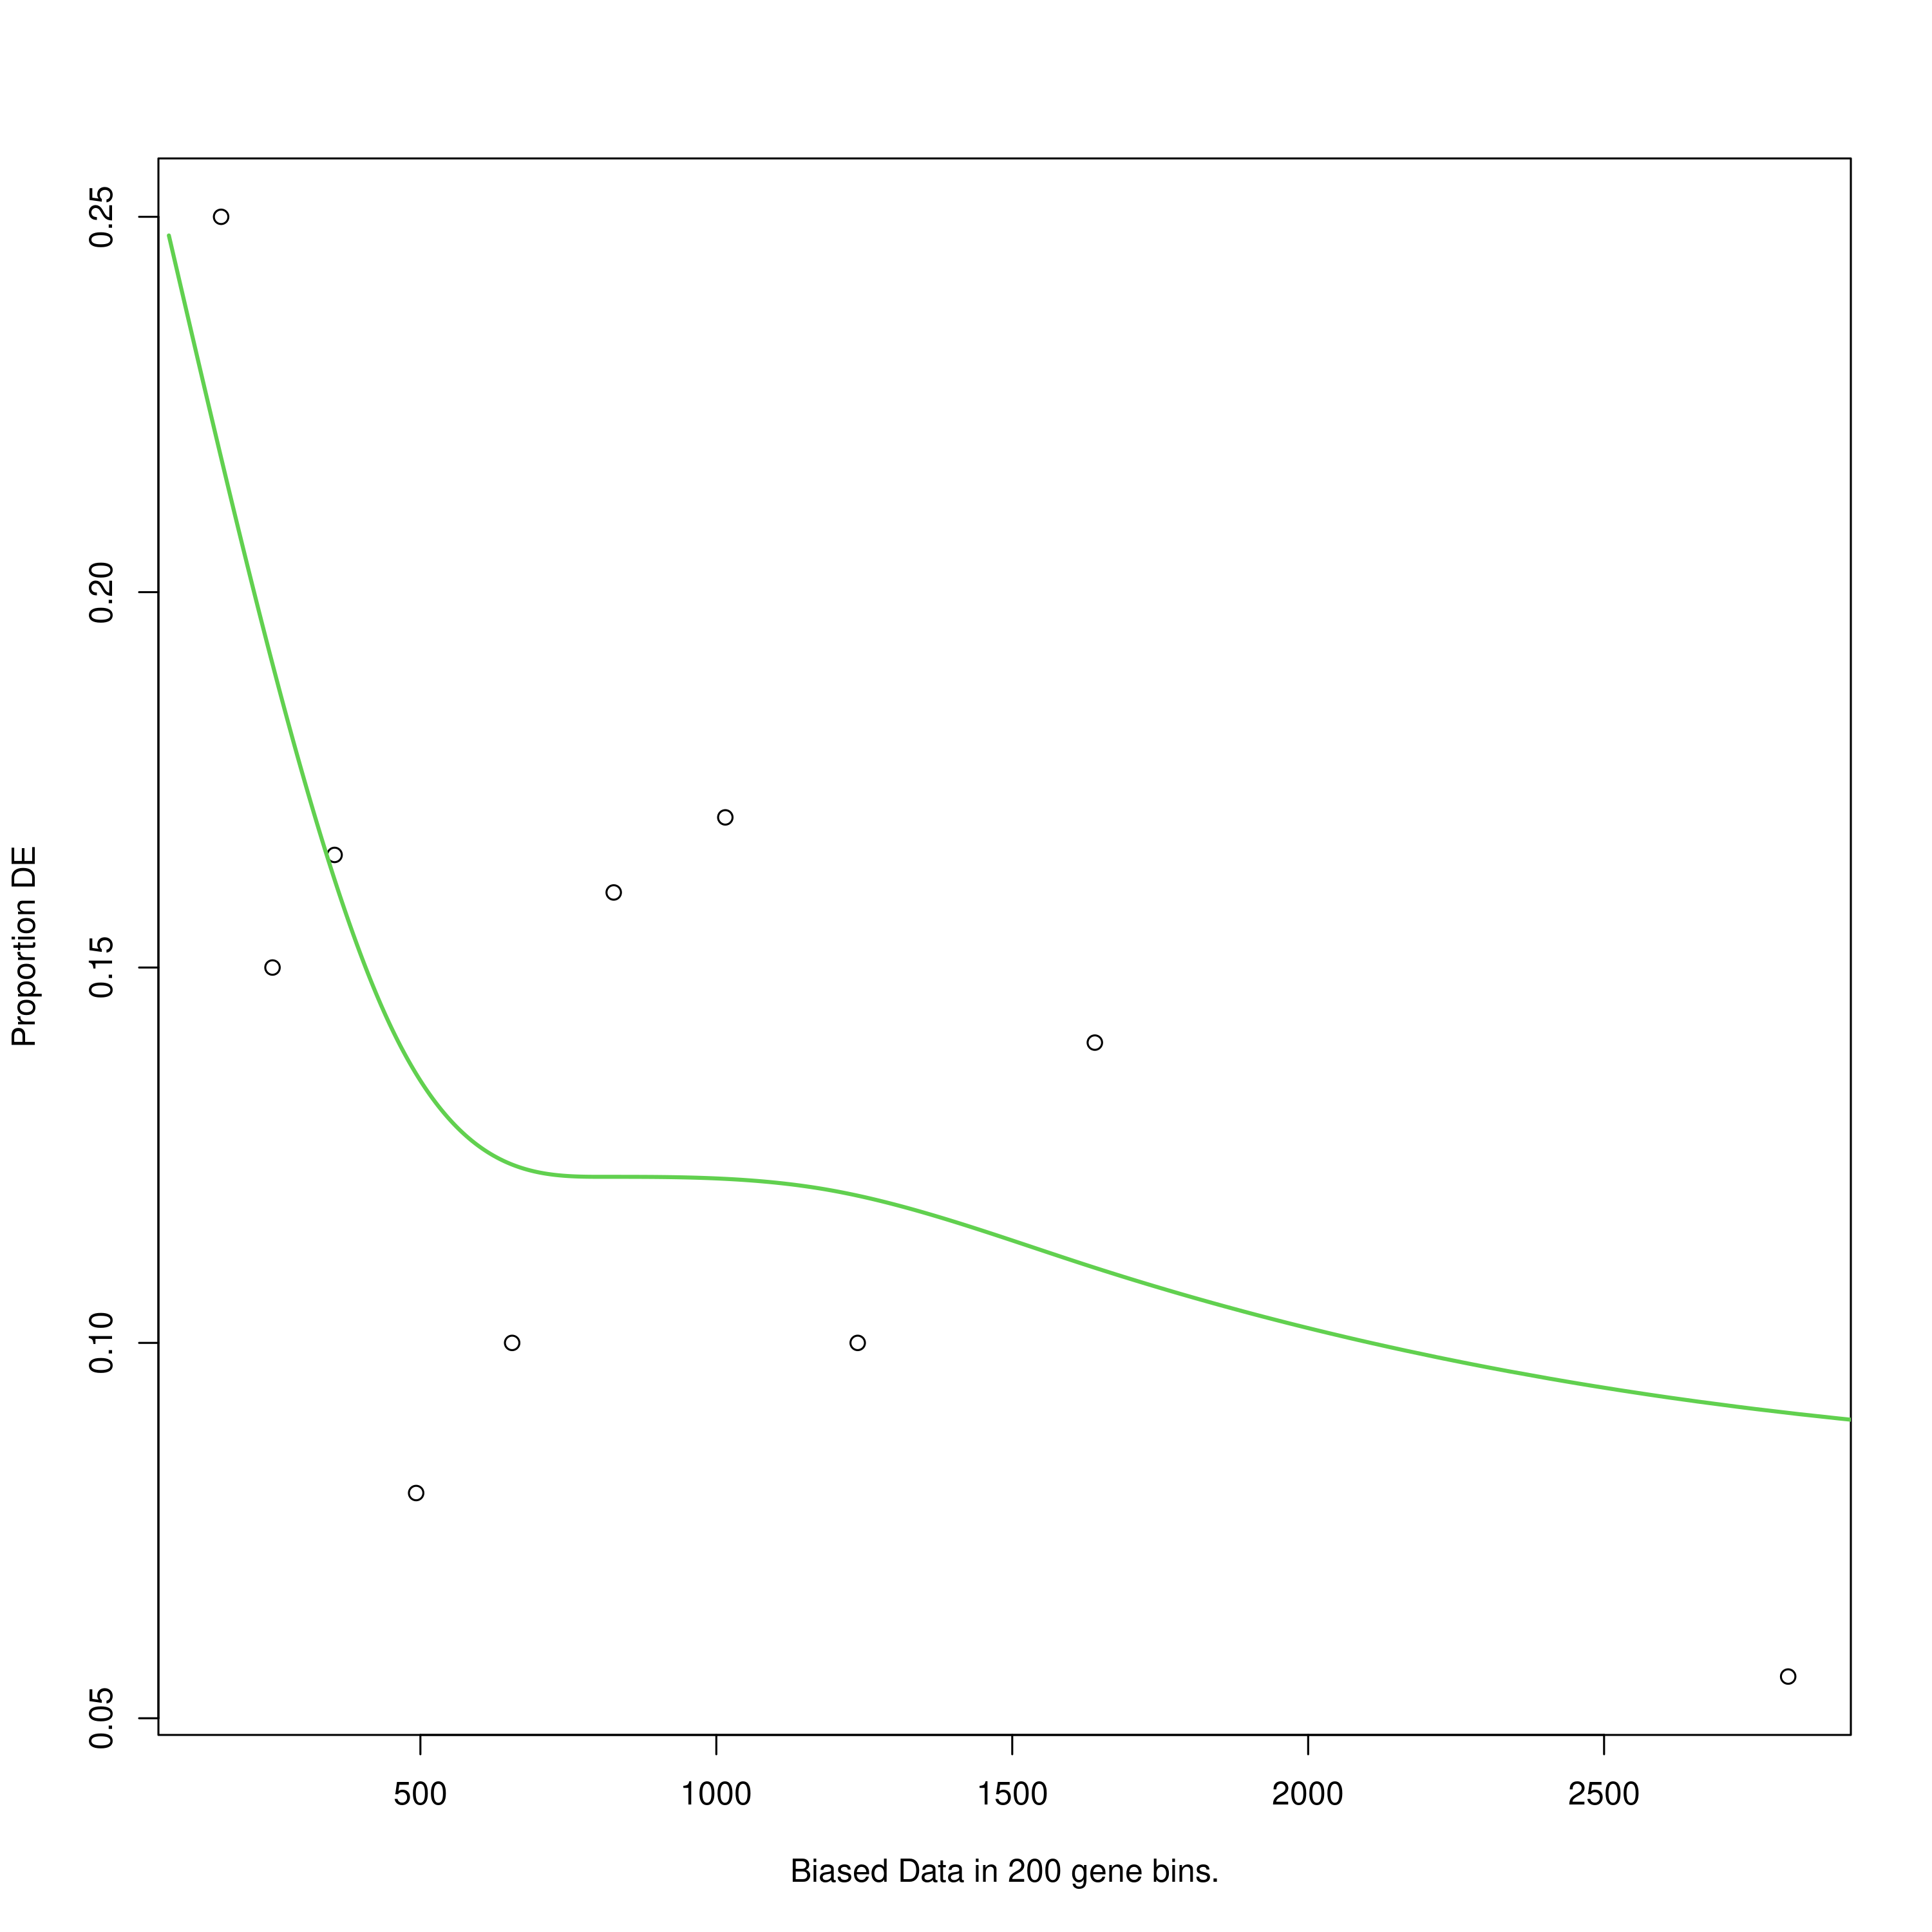

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


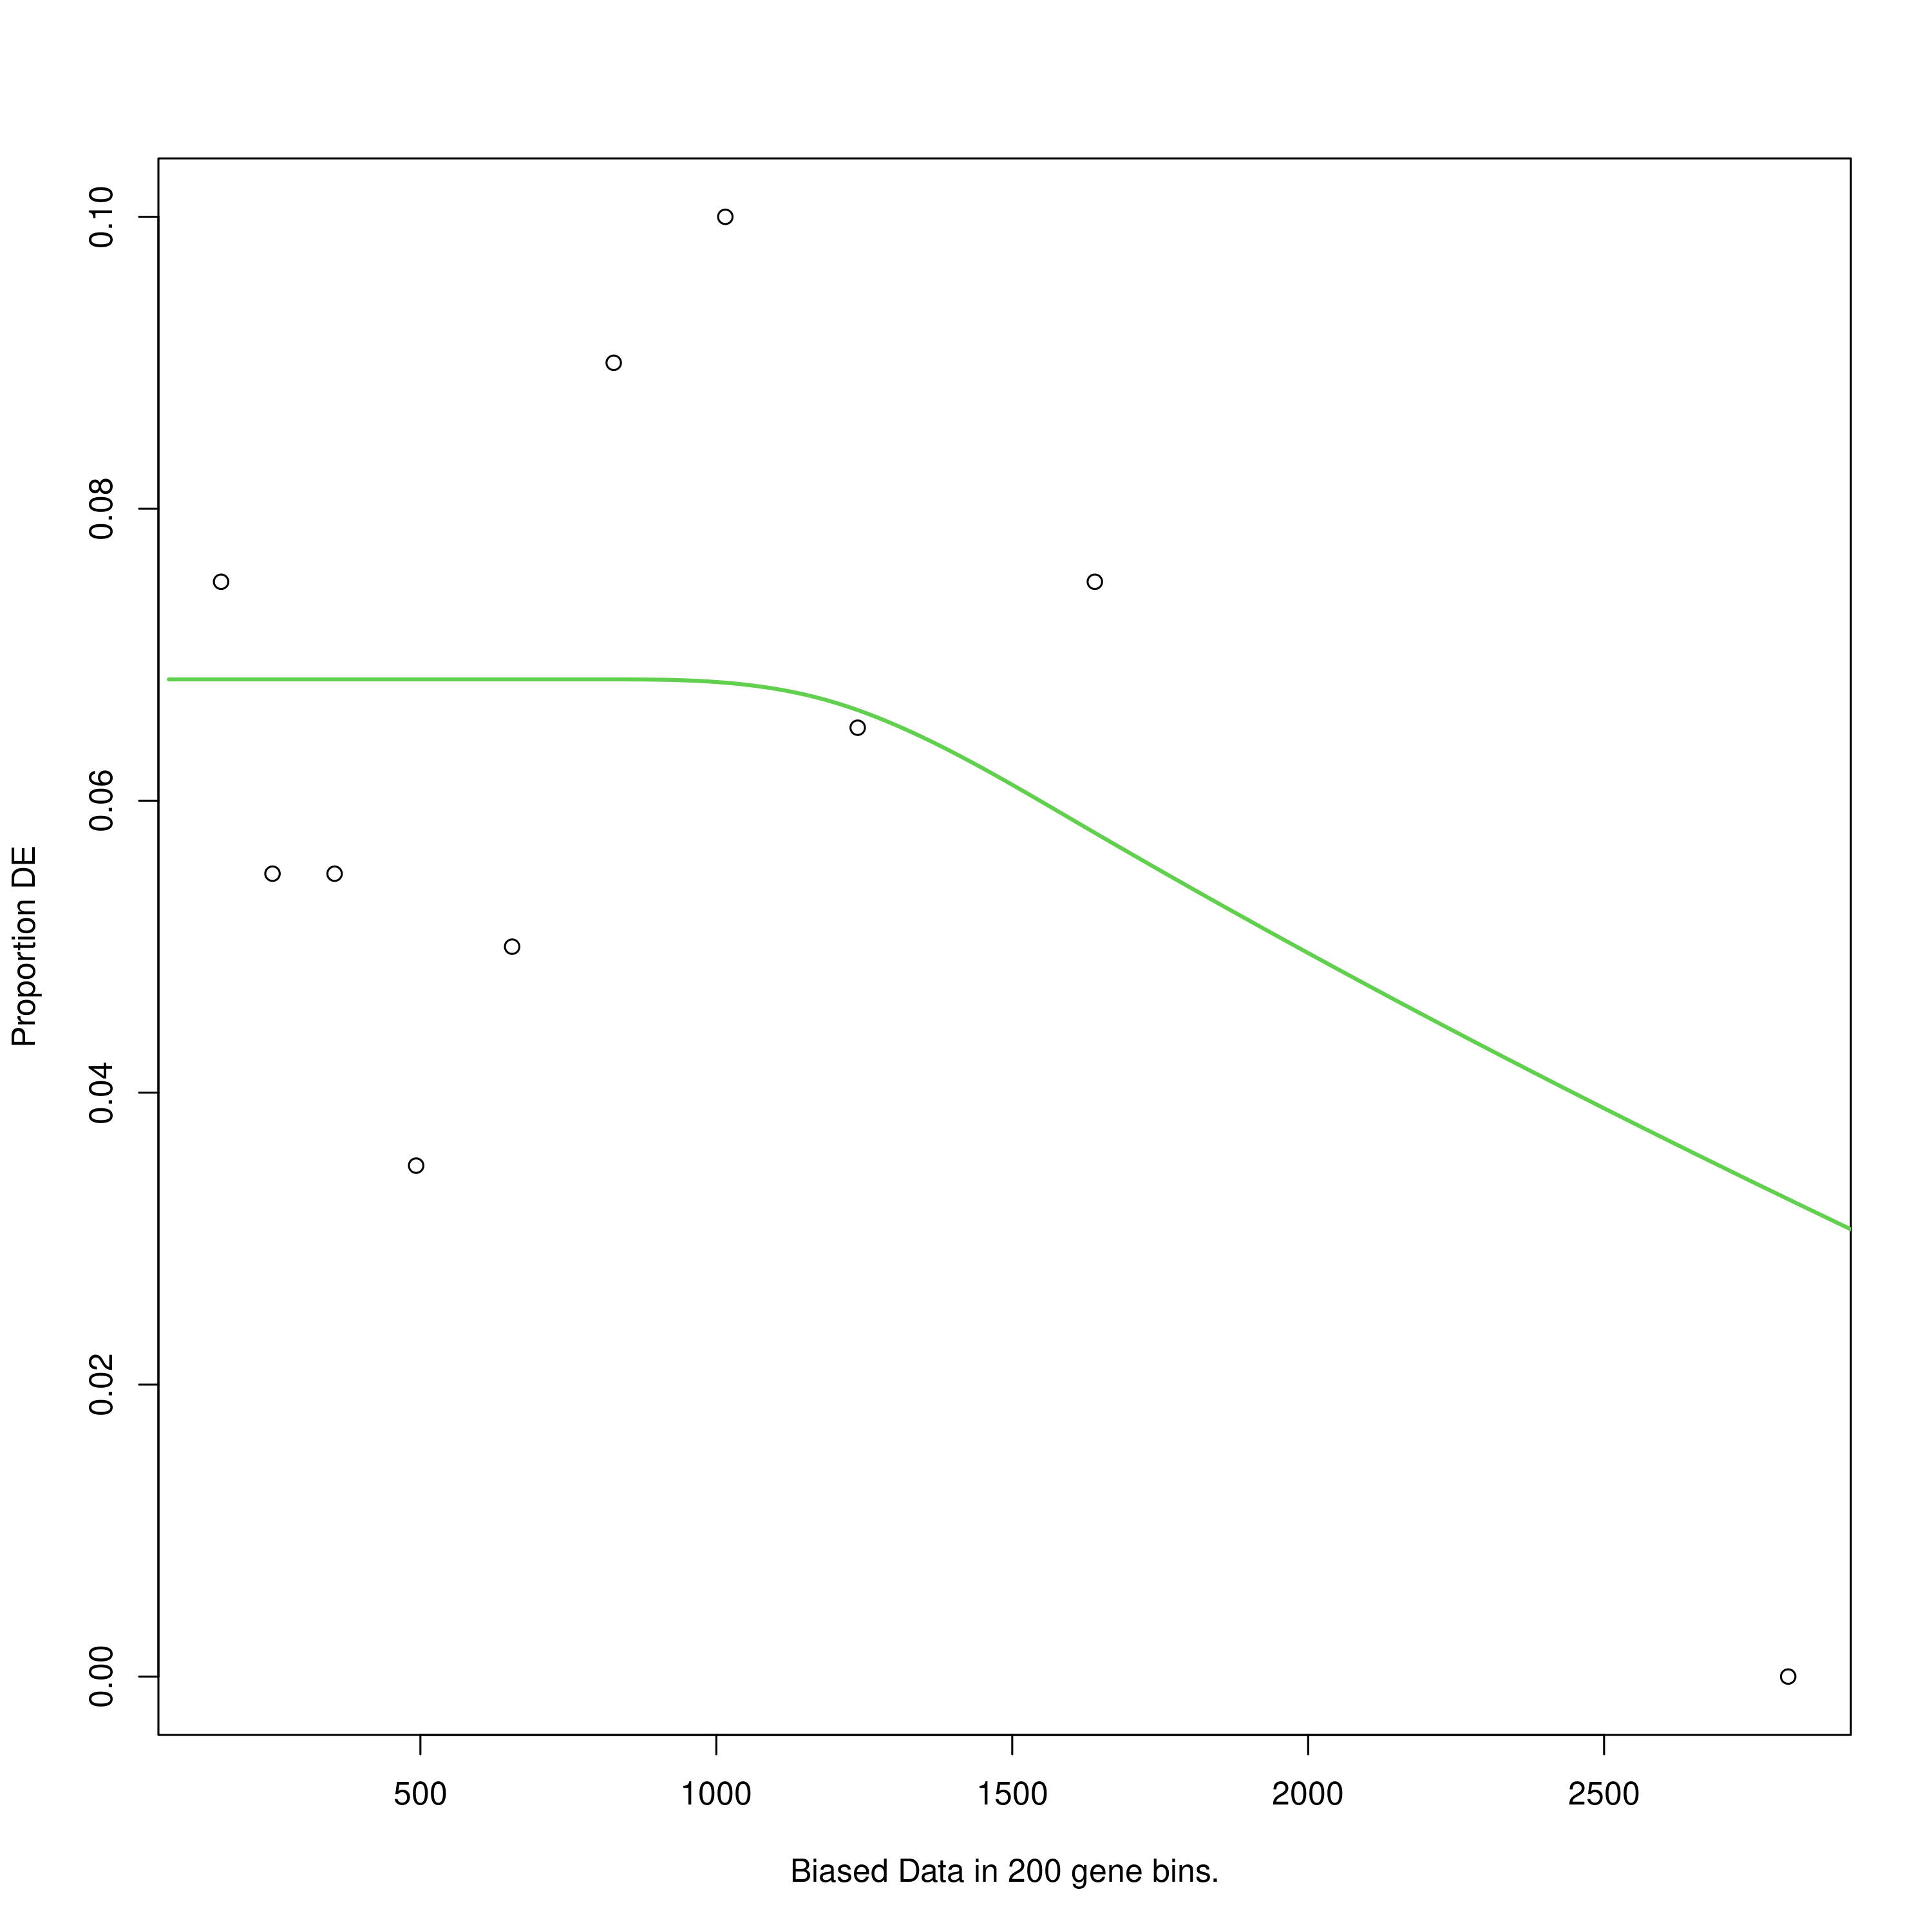

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


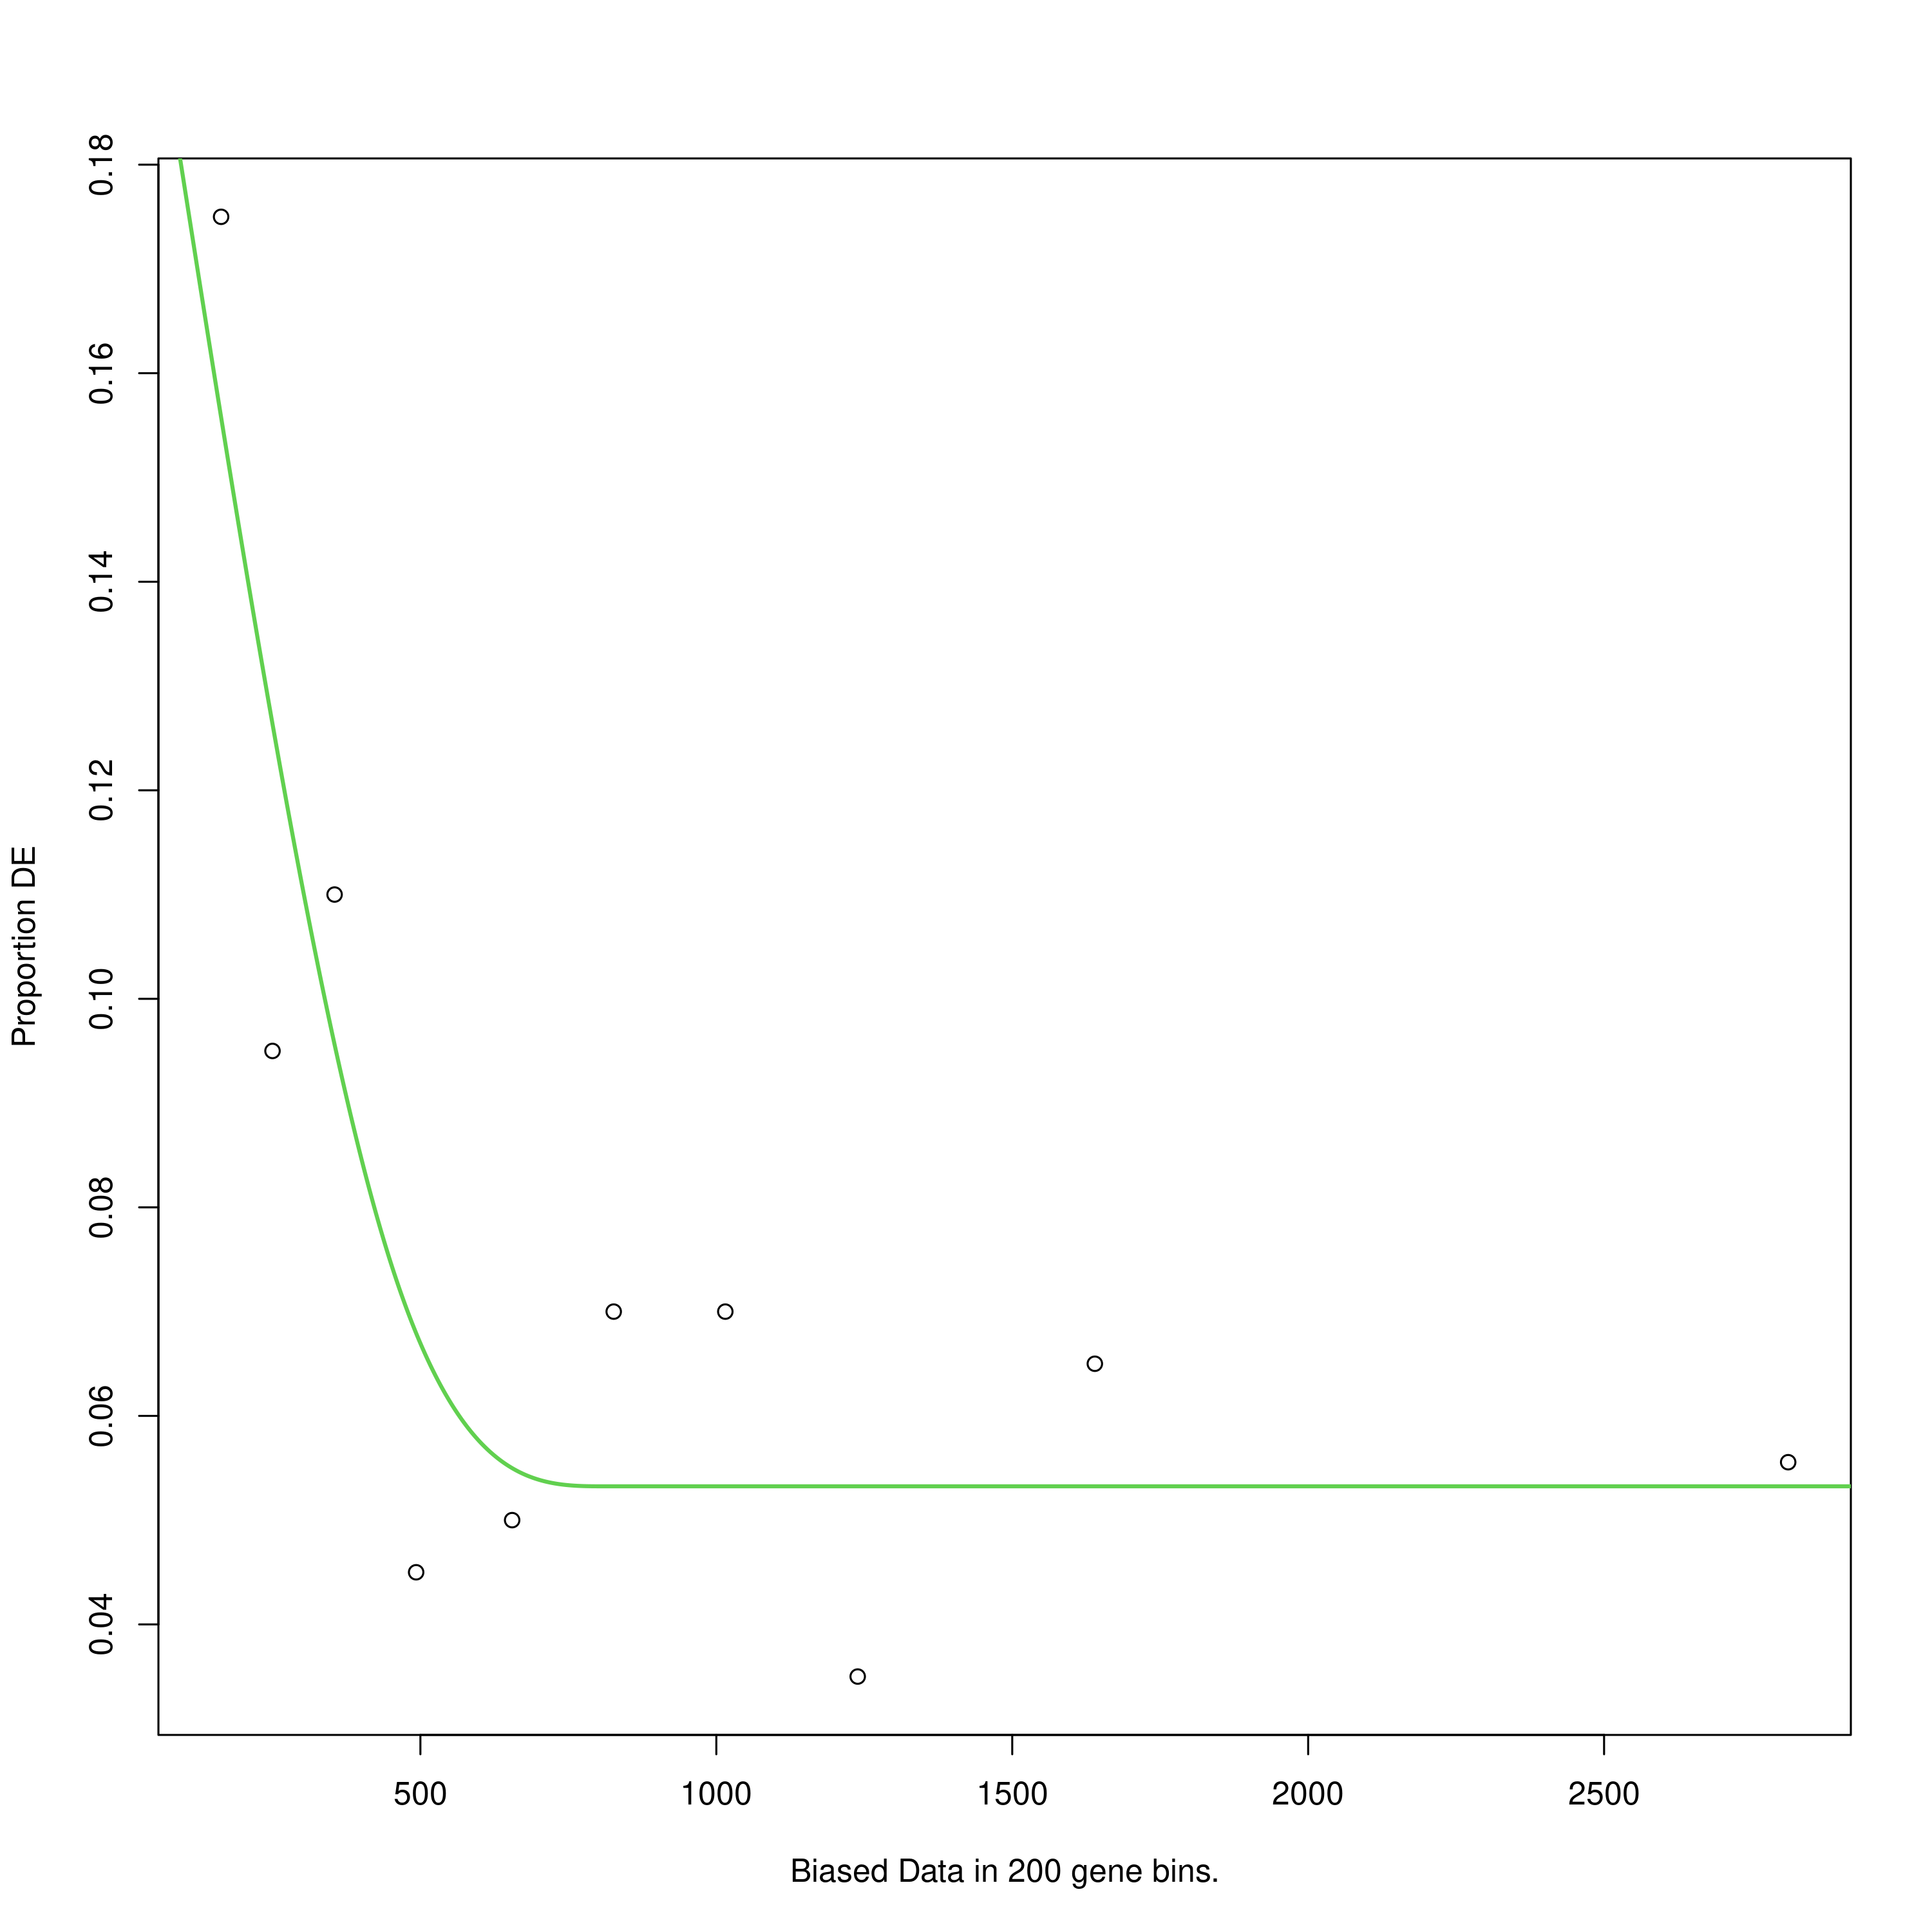

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


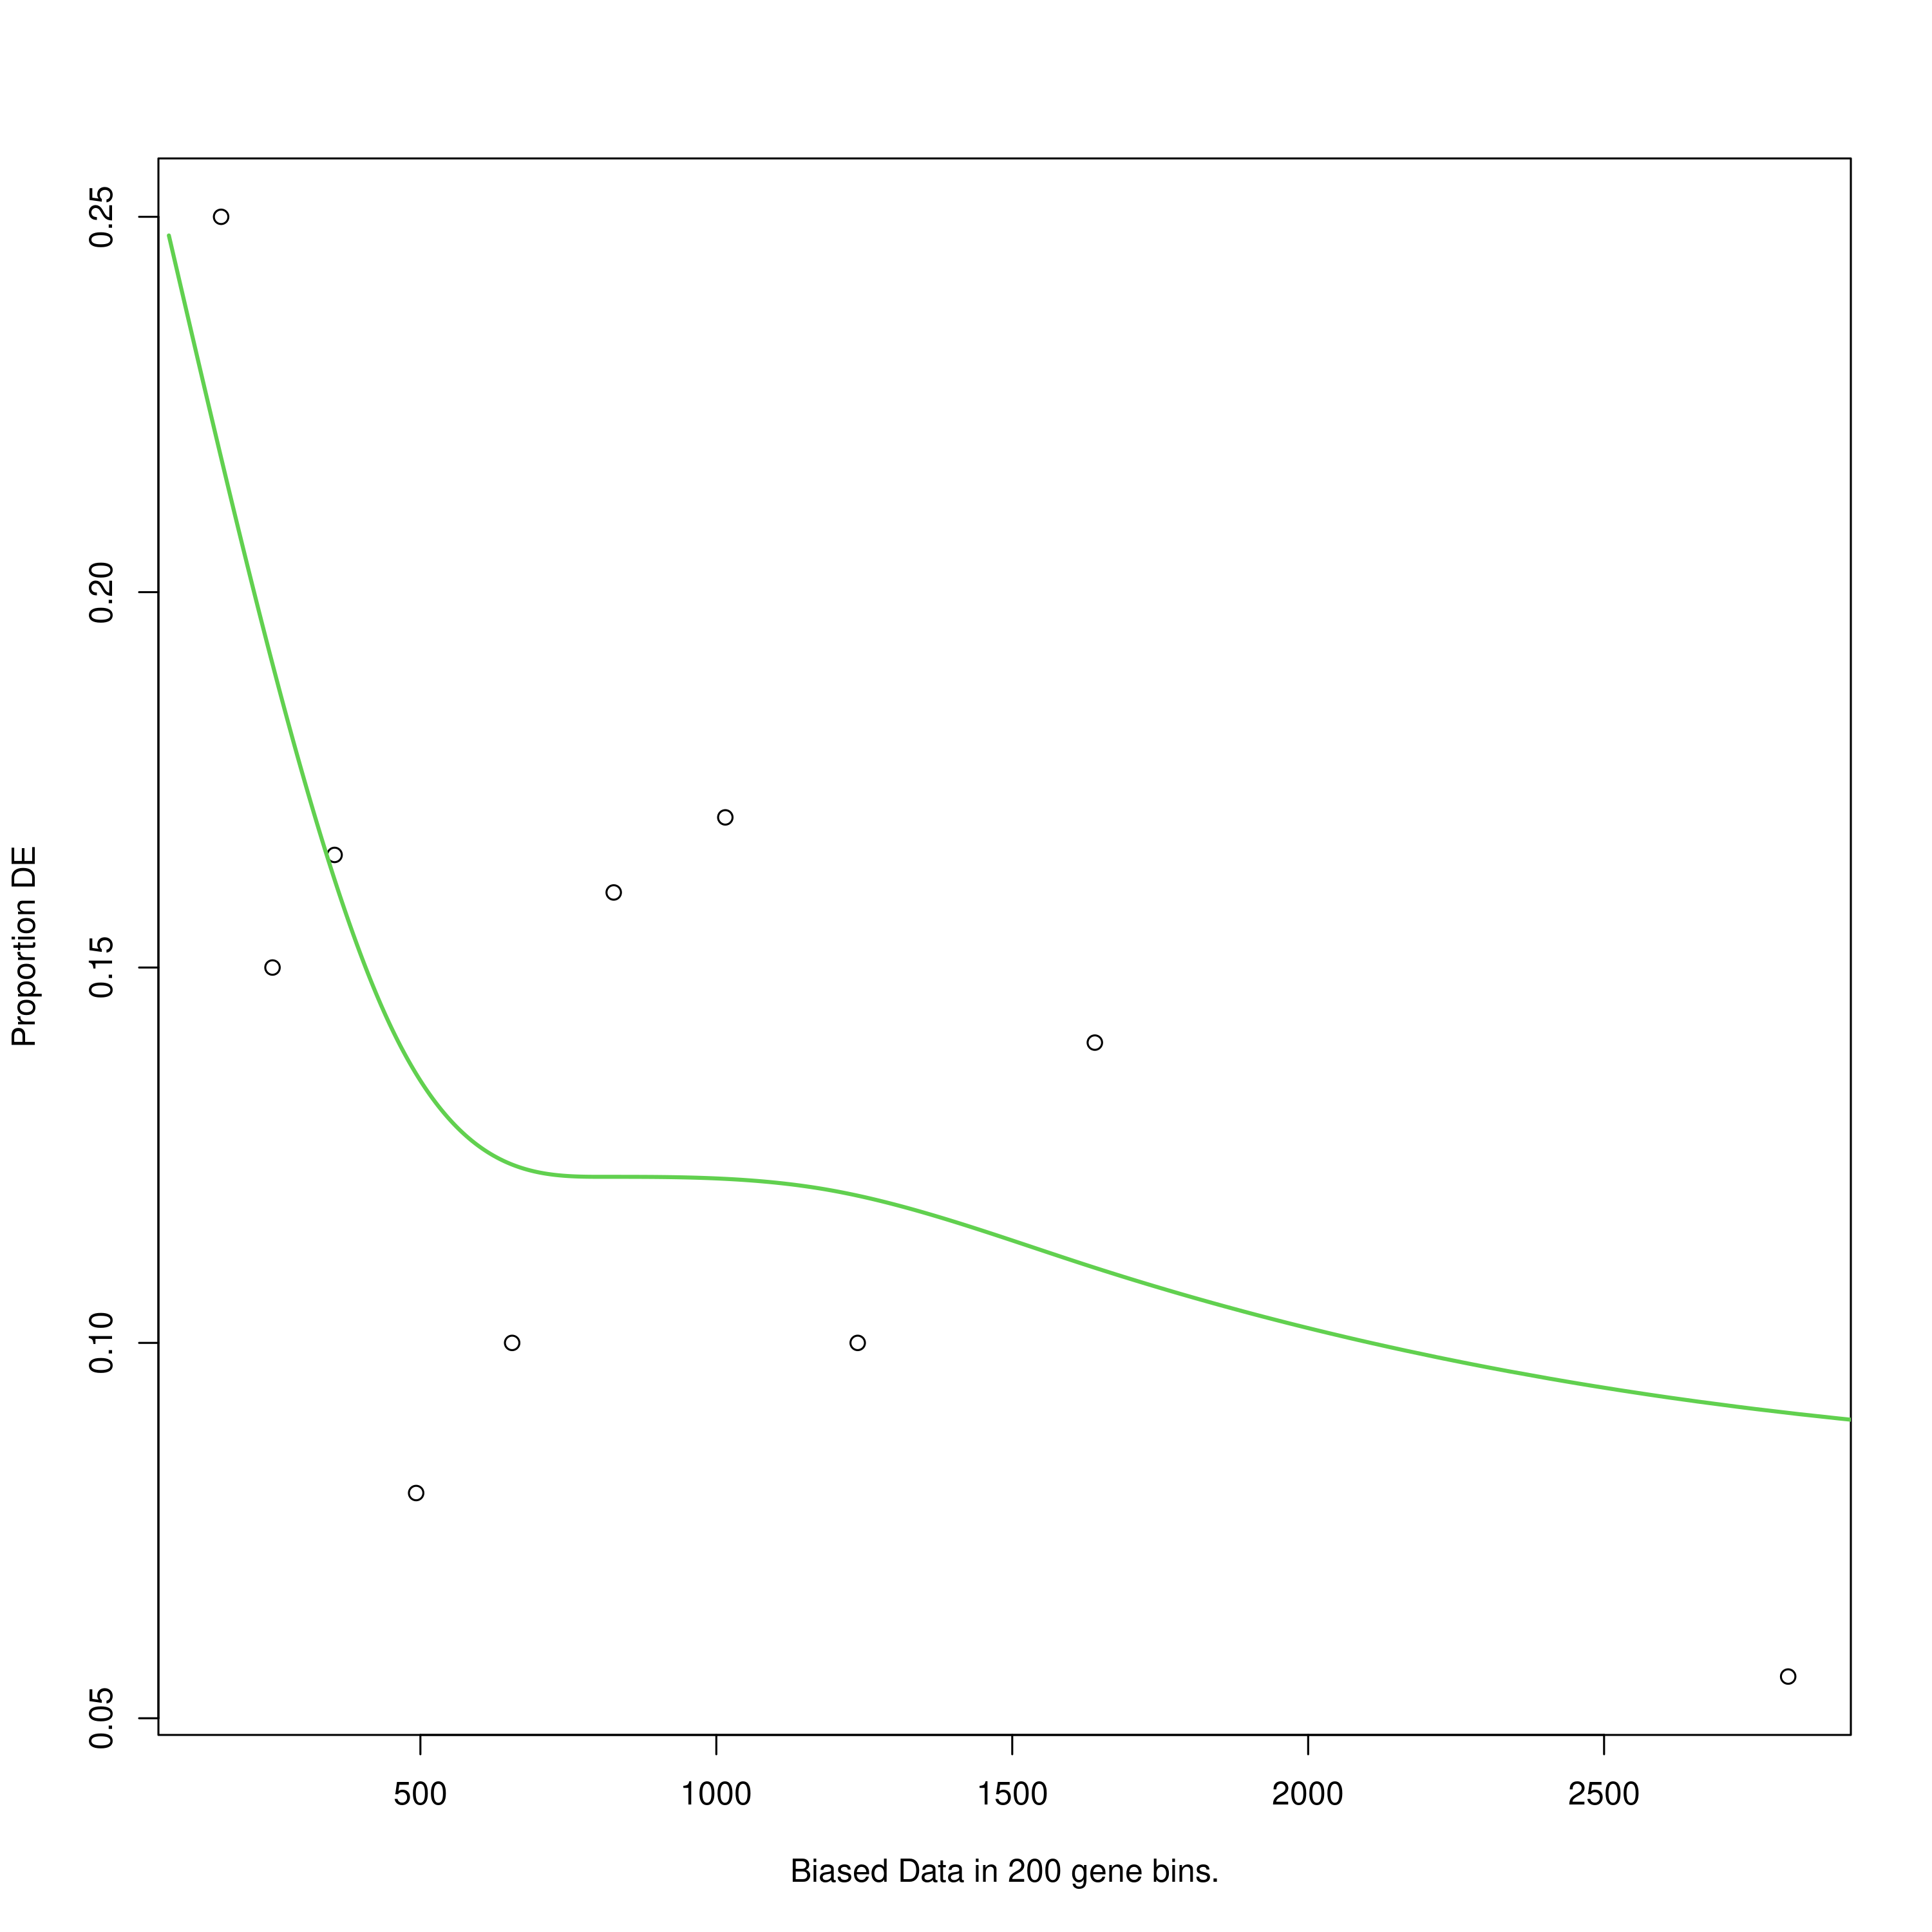

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


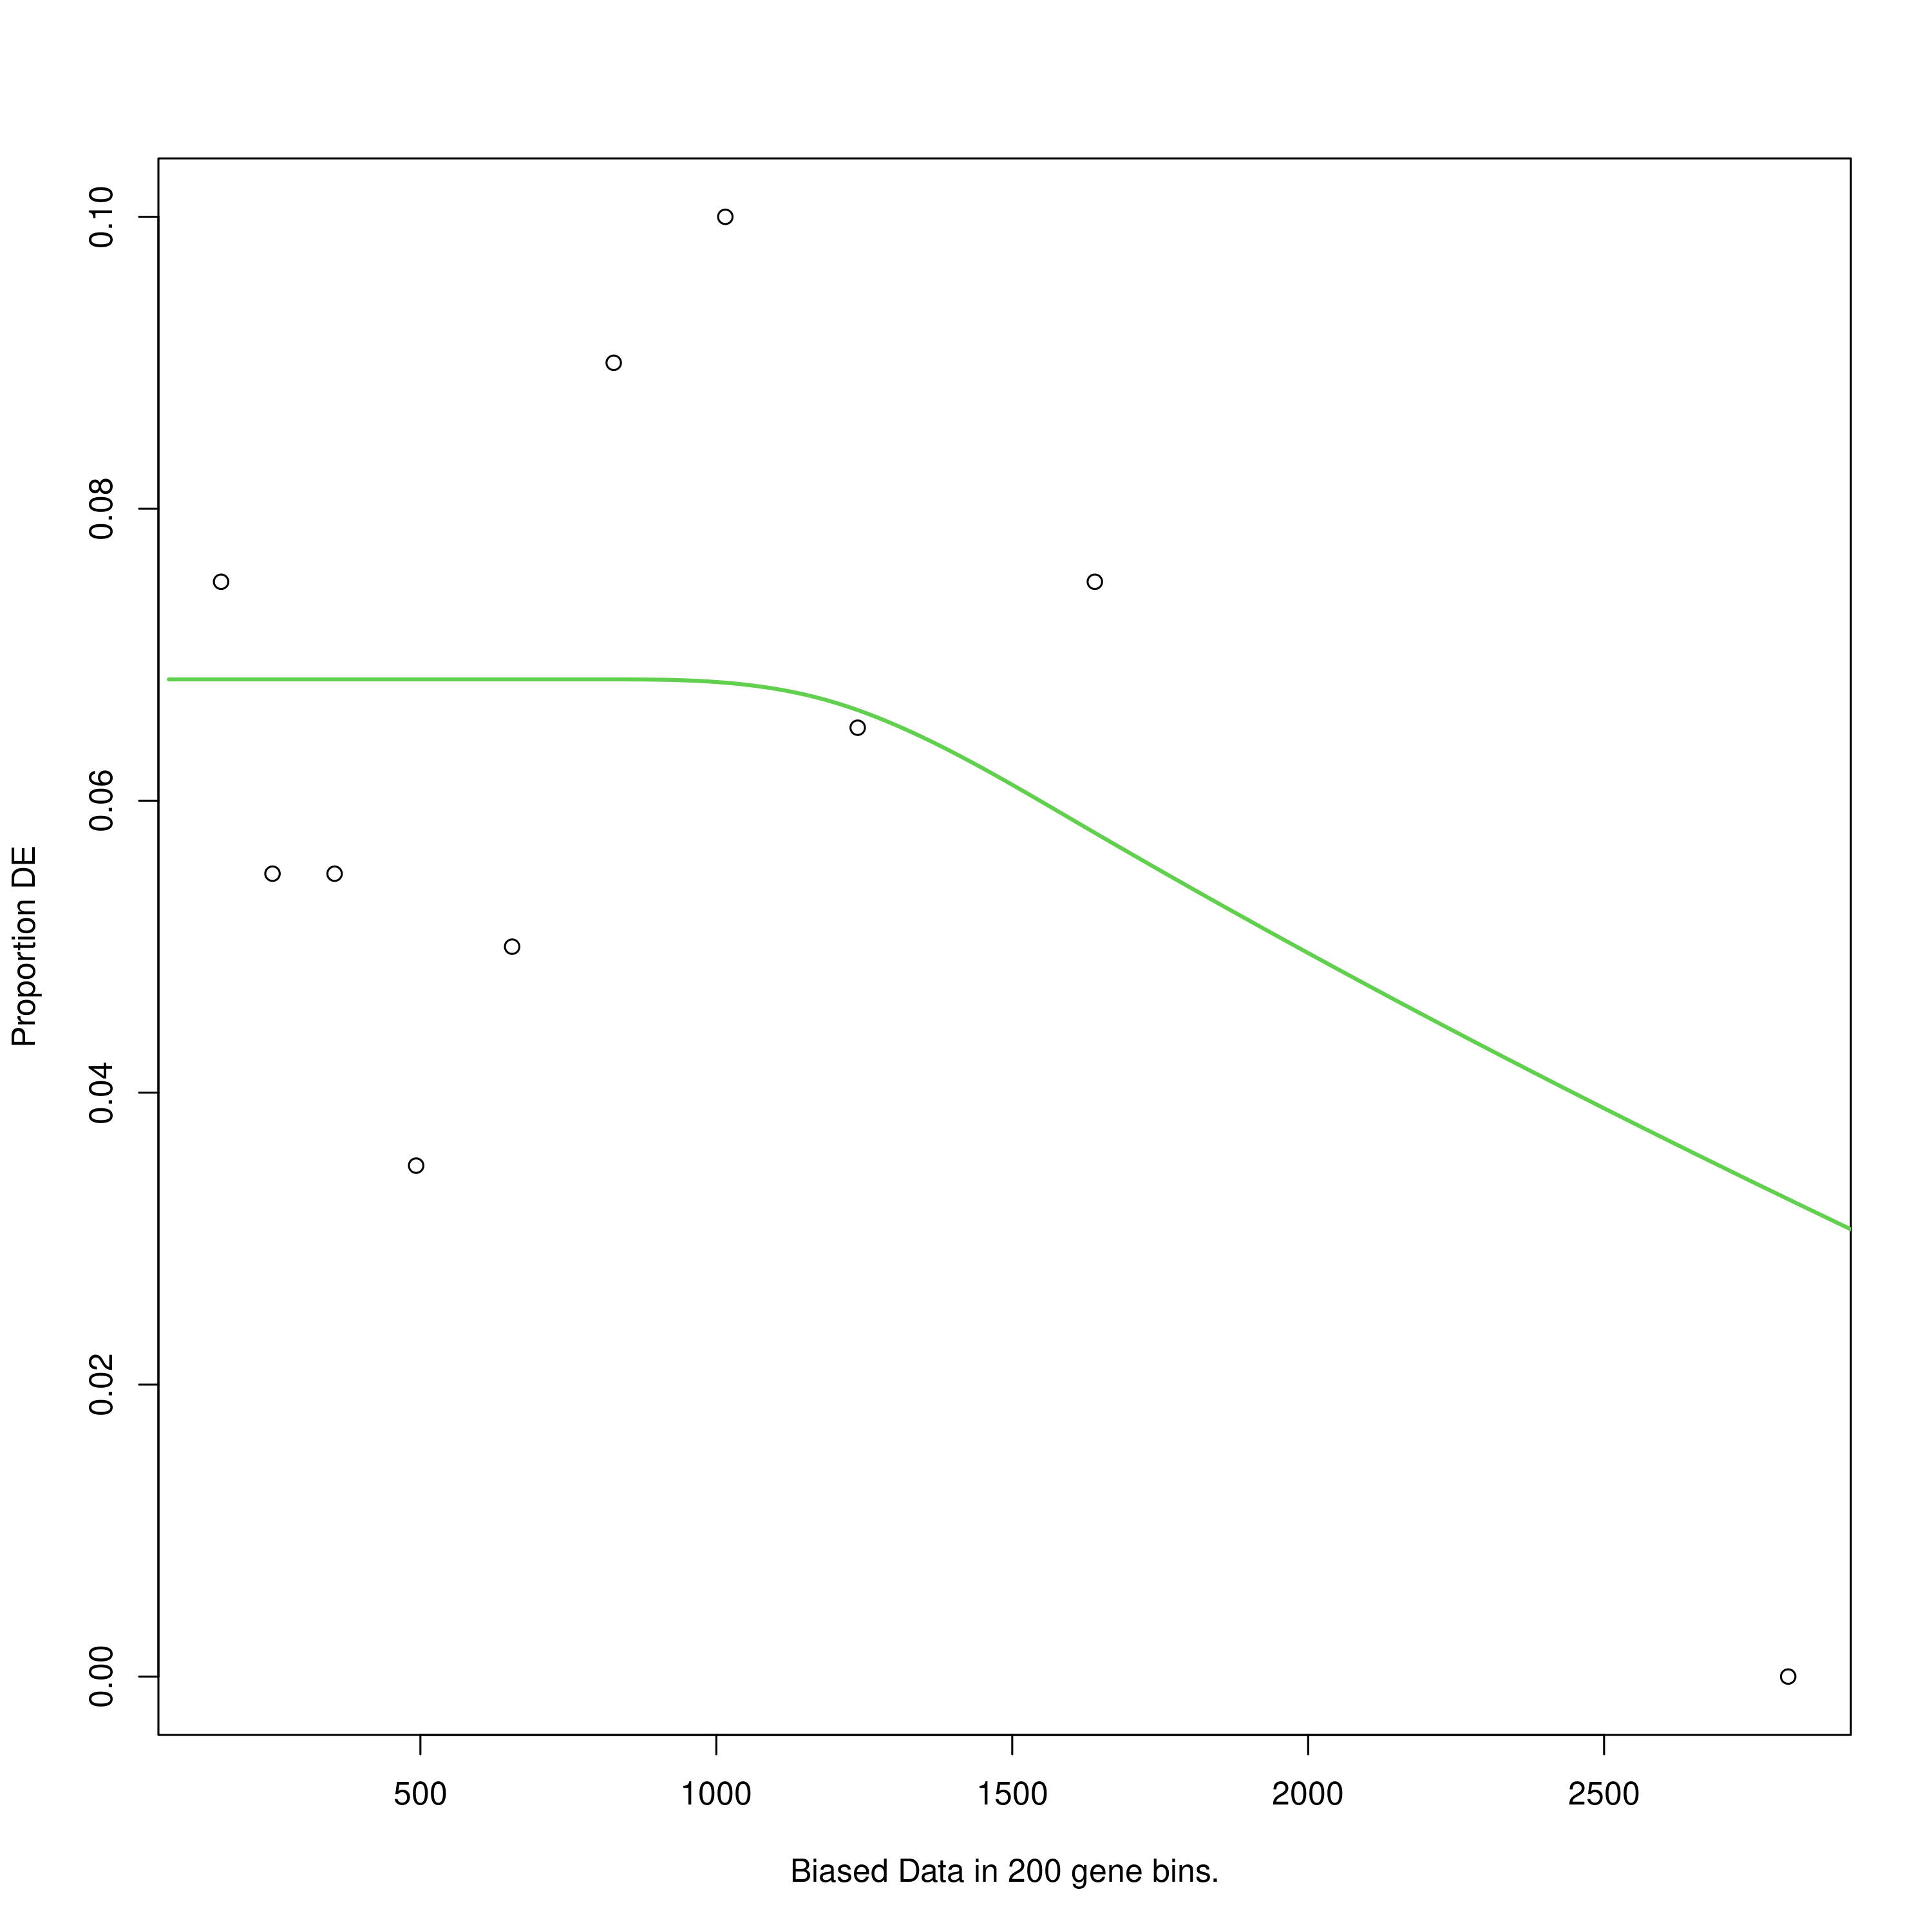

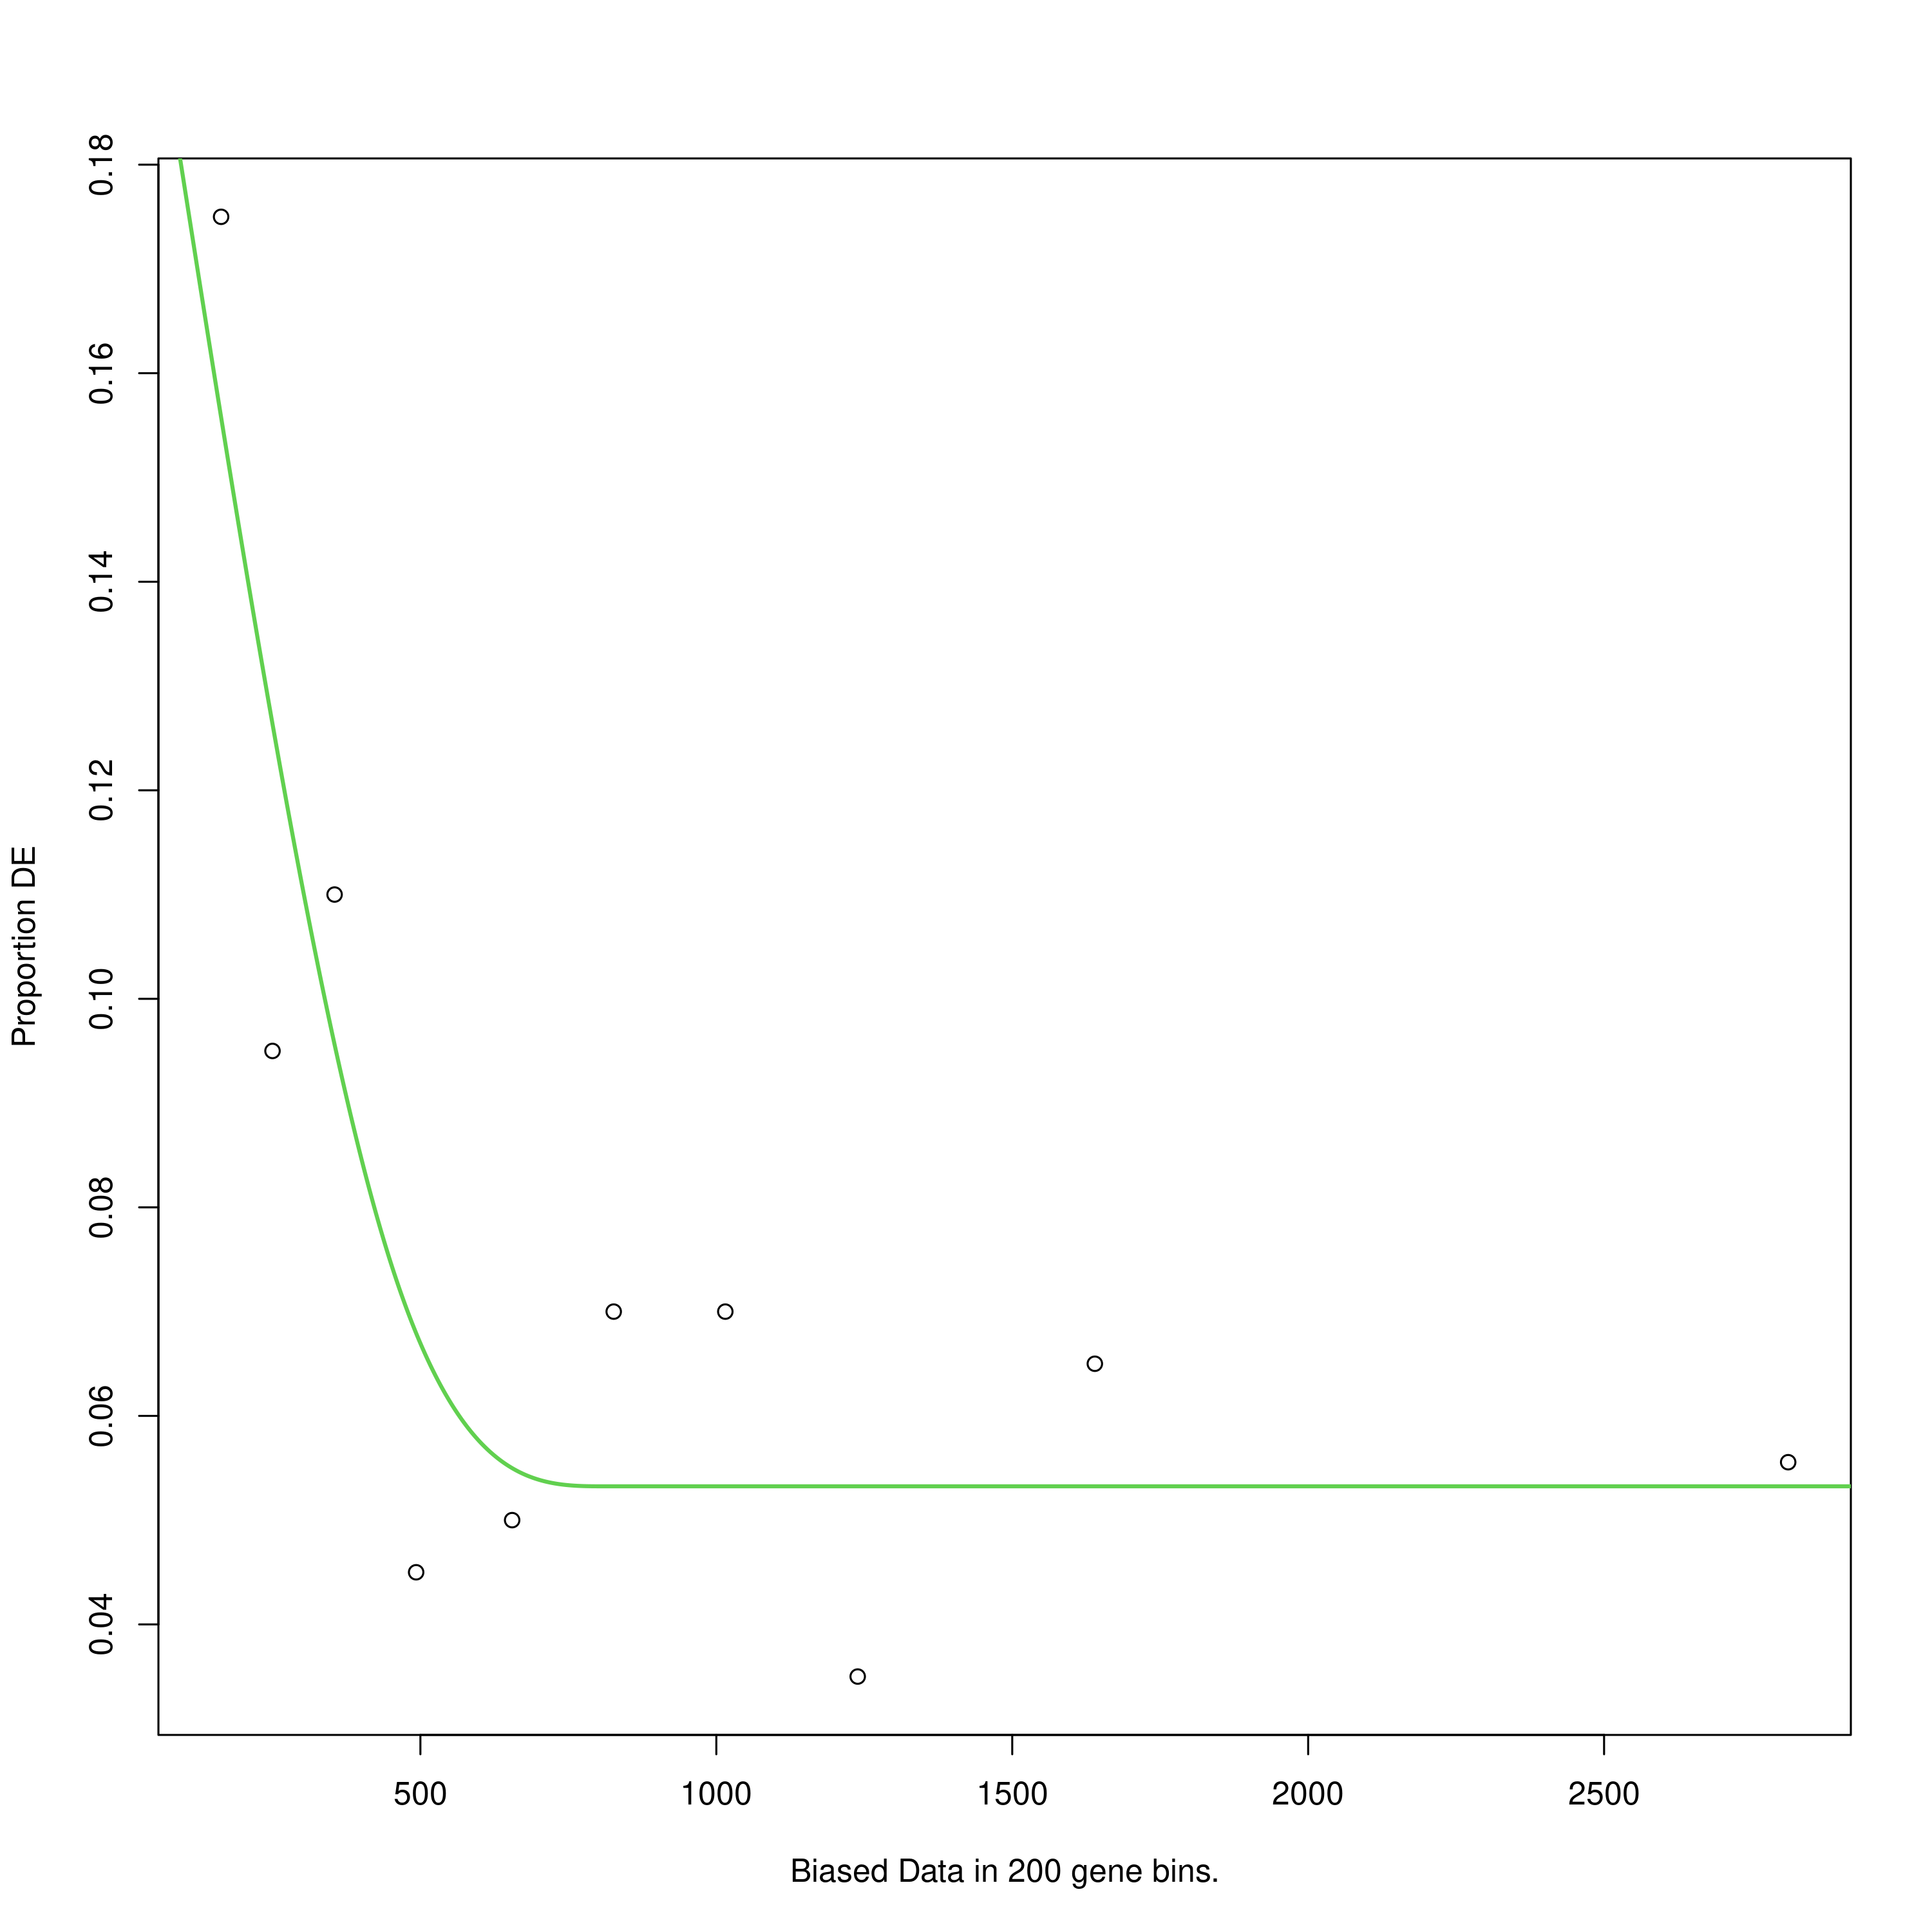

In [108]:
dlist = list()
for (col in c('sub' ,'path')  #, 'main','ecpath')
             ) 
    {
    for (test in c('significant', 'down', 'up')) 
        {
          dlist[[length(dlist) + 1]] <- run_enrichment(col, test)
    }
    
}

goseq_res = bind_rows(dlist)


In [109]:
goseq_res %>%filter(padj < 0.1) 

category PATH                                                            
1 09102    09102 Energy metabolism                                         
2 09102    09102 Energy metabolism                                         
3 09110    09110 Biosynthesis of other secondary metabolites               
4 09103    09103 Lipid metabolism                                          
5 00710    00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]
6 00195    00195 Photosynthesis [PATH:ko00195]                             
7 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                    
8 00010    00010 Glycolysis / Gluconeogenesis [PATH:ko00010]               
9 00910    00910 Nitrogen metabolism [PATH:ko00910]                        
  over_represented_pvalue padj         under_represented_pvalue numDEInCat
1 3.282354e-05            5.908238e-04 0.9999879                33        
2 6.541146e-07            1.177406e-05 0.9999998                23        
3 7.671220e-04            6.904098e-03 0.9998883                 7        
4 5.523482e-03            3.314089e-02 0.9989726                 6        
5 1.064757e-04            3.817391e-03 0.9999924                 6        
6 1.139520e-04            3.817391e-03 0.9999789                11        
7 5.967100e-04            1.332652e-02 0.9999543                 5        
8 3.958785e-03            6.630965e-02 0.9994636                 5        
9 1.473375e-04            9.871614e-03 0.9999965                 4        
  numInCat main             type        enrich organism
1 120      09100 Metabolism significant sub    HOT1A3  
2 120      09100 Metabolism down        sub    HOT1A3  
3  25      09100 Metabolism down        sub    HOT1A3  
4  26      09100 Metabolism down        sub    HOT1A3  
5  14      09100 Metabolism down        path   HOT1A3  
6  46      09100 Metabolism down        path   HOT1A3  
7  12      09100 Metabolism down        path   HOT1A3  
8  18      09100 Metabolism down        path   HOT1A3  
9   6      09100 Metabolism up          path   HOT1A3

In [110]:
goseq_res %>%filter(over_represented_pvalue < 0.05)

category PATH                                                            
1  09102    09102 Energy metabolism                                         
2  09109    09109 Metabolism of terpenoids and polyketides                  
3  09110    09110 Biosynthesis of other secondary metabolites               
4  09108    09108 Metabolism of cofactors and vitamins                      
5  09102    09102 Energy metabolism                                         
6  09110    09110 Biosynthesis of other secondary metabolites               
7  09103    09103 Lipid metabolism                                          
8  00910    00910 Nitrogen metabolism [PATH:ko00910]                        
9  00710    00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]
10 00920    00920 Sulfur metabolism [PATH:ko00920]                          
11 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                    
12 00051    00051 Fructose and mannose metabolism [PATH:ko00051]            
13 00860    00860 Porphyrin metabolism [PATH:ko00860]                       
14 00710    00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]
15 00195    00195 Photosynthesis [PATH:ko00195]                             
16 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                    
17 00010    00010 Glycolysis / Gluconeogenesis [PATH:ko00010]               
18 00860    00860 Porphyrin metabolism [PATH:ko00860]                       
19 00051    00051 Fructose and mannose metabolism [PATH:ko00051]            
20 00261    00261 Monobactam biosynthesis [PATH:ko00261]                    
21 00920    00920 Sulfur metabolism [PATH:ko00920]                          
22 00910    00910 Nitrogen metabolism [PATH:ko00910]                        
   over_represented_pvalue padj         under_represented_pvalue numDEInCat
1  3.282354e-05            5.908238e-04 0.9999879                33        
2  2.393312e-02            1.702542e-01 0.9931803                 7        
3  2.837570e-02            1.702542e-01 0.9916129                 7        
4  4.902149e-02            2.205967e-01 0.9711858                24        
5  6.541146e-07            1.177406e-05 0.9999998                23        
6  7.671220e-04            6.904098e-03 0.9998883                 7        
7  5.523482e-03            3.314089e-02 0.9989726                 6        
8  2.422145e-03            1.367550e-01 0.9998750                 4        
9  4.082238e-03            1.367550e-01 0.9993861                 6        
10 9.860483e-03            2.166356e-01 0.9985015                 5        
11 1.293347e-02            2.166356e-01 0.9978916                 5        
12 3.220890e-02            3.625066e-01 0.9945460                 4        
13 3.246328e-02            3.625066e-01 0.9873695                10        
14 1.064757e-04            3.817391e-03 0.9999924                 6        
15 1.139520e-04            3.817391e-03 0.9999789                11        
16 5.967100e-04            1.332652e-02 0.9999543                 5        
17 3.958785e-03            6.630965e-02 0.9994636                 5        
18 1.781572e-02            2.387307e-01 0.9949535                 7        
19 2.476411e-02            2.765326e-01 0.9970812                 3        
20 3.609129e-02            3.219032e-01 0.9976397                 2        
21 3.843621e-02            3.219032e-01 0.9943728                 3        
22 1.473375e-04            9.871614e-03 0.9999965                 4        
   numInCat main             type        enrich organism
1  120      09100 Metabolism significant sub    HOT1A3  
2   25      09100 Metabolism significant sub    HOT1A3  
3   25      09100 Metabolism significant sub    HOT1A3  
4  139      09100 Metabolism significant sub    HOT1A3  
5  120      09100 Metabolism down        sub    HOT1A3  
6   25      09100 Metabolism down        sub    HOT1A3  
7   26      09100 Metabolism down        sub    HOT1A3  
8    6      09100 Metabolism

In [111]:
goseq_res %>% write_csv(file.path('DE_results', 'MED4_GOSEQ_results_ref_vs_long.csv'))


In [112]:
head(res_df)

gene_id      baseMean  log2FoldChange lfcSE     stat       pvalue      
1 TX50_RS00020 1382.0165  0.59923609    0.1212434  0.8184863 0.4130795849
2 TX50_RS00025  105.1823 -0.60237404    0.2036271 -0.5027526 0.6151382201
3 TX50_RS00030  688.4678  1.07994530    0.1514614  3.8289983 0.0001286659
4 TX50_RS00035  350.6688  0.07797916    0.1270180  0.0000000 1.0000000000
5 TX50_RS00040  636.5248  0.04297486    0.1137501  0.0000000 1.0000000000
6 TX50_RS00045  105.8015  0.32696417    0.2218385  0.0000000 1.0000000000
  padj        contrast                   na_pvalue na_padj significant
1 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
2 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
3 0.001119134 treatment_long.term_vs_ref FALSE     FALSE    TRUE      
4 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
5 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
6 1.000000000 treatment_long.term_vs_ref FALSE     FALSE   FALSE      
  direction status         Length down  up   
1 up        no_significant 1155   FALSE FALSE
2 down      no_significant  705   FALSE FALSE
3 up        up             2337   FALSE  TRUE
4 up        no_significant 1458   FALSE FALSE
5 up        no_significant 2439   FALSE FALSE
6 up        no_significant  852   FALSE FALSE

In [113]:
goseq_res %>% filter(padj <0.05)

category PATH                                                            
1 09102    09102 Energy metabolism                                         
2 09102    09102 Energy metabolism                                         
3 09110    09110 Biosynthesis of other secondary metabolites               
4 09103    09103 Lipid metabolism                                          
5 00710    00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]
6 00195    00195 Photosynthesis [PATH:ko00195]                             
7 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                    
8 00910    00910 Nitrogen metabolism [PATH:ko00910]                        
  over_represented_pvalue padj         under_represented_pvalue numDEInCat
1 3.282354e-05            5.908238e-04 0.9999879                33        
2 6.541146e-07            1.177406e-05 0.9999998                23        
3 7.671220e-04            6.904098e-03 0.9998883                 7        
4 5.523482e-03            3.314089e-02 0.9989726                 6        
5 1.064757e-04            3.817391e-03 0.9999924                 6        
6 1.139520e-04            3.817391e-03 0.9999789                11        
7 5.967100e-04            1.332652e-02 0.9999543                 5        
8 1.473375e-04            9.871614e-03 0.9999965                 4        
  numInCat main             type        enrich organism
1 120      09100 Metabolism significant sub    HOT1A3  
2 120      09100 Metabolism down        sub    HOT1A3  
3  25      09100 Metabolism down        sub    HOT1A3  
4  26      09100 Metabolism down        sub    HOT1A3  
5  14      09100 Metabolism down        path   HOT1A3  
6  46      09100 Metabolism down        path   HOT1A3  
7  12      09100 Metabolism down        path   HOT1A3  
8   6      09100 Metabolism up          path   HOT1A3

In [114]:
goseq_res %>% 
  filter(enrich %in% c('sub', 'path'), type=='up') %>%
  arrange(padj,over_represented_pvalue ) %>%
  head(n=10)


category
1  00910   
2  09108   
3  09109   
4  09131   
5  03420   
6  00900   
7  02020   
8  00730   
9  02010   
10 00130   
   PATH                                                                    
1  00910 Nitrogen metabolism [PATH:ko00910]                                
2  09108 Metabolism of cofactors and vitamins                              
3  09109 Metabolism of terpenoids and polyketides                          
4  09131 Membrane transport                                                
5  03420 Nucleotide excision repair [PATH:ko03420]                         
6  00900 Terpenoid backbone biosynthesis [PATH:ko00900]                    
7  02020 Two-component system [PATH:ko02020]                               
8  00730 Thiamine metabolism [PATH:ko00730]                                
9  02010 ABC transporters [PATH:ko02010]                                   
10 00130 Ubiquinone and other terpenoid-quinone biosynthesis [PATH:ko00130]
   over_represented_pvalue padj        under_represented_pvalue numDEInCat
1  0.0001473375            0.009871614 0.9999965                 4        
2  0.0890040625            0.948565748 0.9534785                12        
3  0.1500966398            0.948565748 0.9571337                 3        
4  0.1580942913            0.948565748 0.9354705                 5        
5  0.0814527563            1.000000000 0.9897728                 2        
6  0.0986721747            1.000000000 0.9858789                 2        
7  0.1148673633            1.000000000 0.9712703                 3        
8  0.1195866843            1.000000000 0.9805368                 2        
9  0.1233018193            1.000000000 0.9597483                 4        
10 0.1353973901            1.000000000 0.9759716                 2        
   numInCat main                                       type enrich organism
1    6      09100 Metabolism                           up   path   HOT1A3  
2  139      09100 Metabolism                           up   sub    HOT1A3  
3   25      09100 Metabolism                           up   sub    HOT1A3  
4   46      09130 Environmental Information Processing up   sub    HOT1A3  
5    9      09120 Genetic Information Processing       up   path   HOT1A3  
6   10      09100 Metabolism                           up   path   HOT1A3  
7   21      09130 Environmental Information Processing up   path   HOT1A3  
8   11      09100 Metabolism                           up   path   HOT1A3  
9   34      09130 Environmental Information Processing up   path   HOT1A3  
10  12      09100 Metabolism                           up   path   HOT1A3

In [115]:
goseq_res %>% 
  filter( type=='up') %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *(.+) *\\[?")
  arrange(padj) %>%
  head(n=10)


category pathway                                                           
1  09108    Metabolism of cofactors and vitamins                              
2  09109    Metabolism of terpenoids and polyketides                          
3  09131    Membrane transport                                                
4  09132    Signal transduction                                               
5  09124    Replication and repair                                            
6  09102    Energy metabolism                                                 
7  09145    Cellular community - prokaryotes                                  
8  09143    Cell growth and death                                             
9  09107    Glycan biosynthesis and metabolism                                
10 09104    Nucleotide metabolism                                             
11 09123    Folding, sorting and degradation                                  
12 09106    Metabolism of other amino acids                                   
13 09101    Carbohydrate metabolism                                           
14 09105    Amino acid metabolism                                             
15 09122    Translation                                                       
16 09103    Lipid metabolism                                                  
17 09110    Biosynthesis of other secondary metabolites                       
18 09111    Xenobiotics biodegradation and metabolism                         
19 00910    Nitrogen metabolism [PATH:ko00910]                                
20 03420    Nucleotide excision repair [PATH:ko03420]                         
21 00900    Terpenoid backbone biosynthesis [PATH:ko00900]                    
22 02020    Two-component system [PATH:ko02020]                               
23 00730    Thiamine metabolism [PATH:ko00730]                                
24 02010    ABC transporters [PATH:ko02010]                                   
25 00130    Ubiquinone and other terpenoid-quinone biosynthesis [PATH:ko00130]
26 00920    Sulfur metabolism [PATH:ko00920]                                  
27 00760    Nicotinate and nicotinamide metabolism [PATH:ko00760]             
28 00630    Glyoxylate and dicarboxylate metabolism [PATH:ko00630]            
29 02024    Quorum sensing [PATH:ko02024]                                     
30 04122    Sulfur relay system [PATH:ko04122]                                
⋮  ⋮        ⋮                                                                 
56 00195    Photosynthesis [PATH:ko00195]                                     
57 00220    Arginine biosynthesis [PATH:ko00220]                              
58 00250    Alanine, aspartate and glutamate metabolism [PATH:ko00250]        
59 00261    Monobactam biosynthesis [PATH:ko00261]                            
60 00290    Valine, leucine and isoleucine biosynthesis [PATH:ko00290]        
61 00300    Lysine biosynthesis [PATH:ko00300]                                
62 00330    Arginine and proline metabolism [PATH:ko00330]                    
63 00340    Histidine metabolism [PATH:ko00340]                               
64 00400    Phenylalanine, tyrosine and tryptophan biosynthesis [PATH:ko00400]
65 00450    Selenocompound metabolism [PATH:ko00450]                          
66 00470    D-Amino acid metabolism [PATH:ko00470]                            
67 00480    Glutathione metabolism [PATH:ko00480]                             
68 00500    Starch and sucrose metabolism [PATH:ko00500]                      
69 00521    Streptomycin biosynthesis [PATH:ko00521]                          
70 00540    Lipopolysaccharide biosynthesis [PATH:ko00540]                    
71 00561    Glycerolipid metabolism [PATH:ko00561]                            
72 00564    Glycerophospholipid metabolism [PATH:ko00564]                     
73 00620    Pyruvate metabolism [PATH:ko00620]                                
74 00640    Propanoate metabolism [PATH:ko00640]     

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'padj' not found


In [116]:
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type == 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type == 'down', -0.01, 0.03)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_Score)) 

category pathway                                     
1  00710    Carbon fixation in photosynthetic organisms 
2  00195    Photosynthesis                              
3  00910    Nitrogen metabolism                         
4  00061    Fatty acid biosynthesis                     
5  00010    Glycolysis / Gluconeogenesis                
6  00860    Porphyrin metabolism                        
7  00051    Fructose and mannose metabolism             
8  00261    Monobactam biosynthesis                     
9  00920    Sulfur metabolism                           
10 00640    Propanoate metabolism                       
   over_represented_pvalue padj        under_represented_pvalue numDEInCat
1  0.0001064757            0.003817391 0.9999924                 6        
2  0.0001139520            0.003817391 0.9999789                11        
3  0.0001473375            0.009871614 0.9999965                 4        
4  0.0005967100            0.013326524 0.9999543                 5        
5  0.0039587849            0.066309647 0.9994636                 5        
6  0.0178157211            0.238730662 0.9949535                 7        
7  0.0247641098            0.276532560 0.9970812                 3        
8  0.0360912903            0.321903247 0.9976397                 2        
9  0.0384362085            0.321903247 0.9943728                 3        
10 0.0598256562            0.440059145 0.9940855                 2        
   numInCat main             type enrich organism Ratio     padj_Score
1  14       09100 Metabolism down path   HOT1A3   0.4285714 2.4182334 
2  46       09100 Metabolism down path   HOT1A3   0.2391304 2.4182334 
3   6       09100 Metabolism up   path   HOT1A3   0.6666667 2.0056118 
4  12       09100 Metabolism down path   HOT1A3   0.4166667 1.8752831 
5  18       09100 Metabolism down path   HOT1A3   0.2777778 1.1784233 
6  44       09100 Metabolism down path   HOT1A3   0.1590909 0.6220918 
7  10       09100 Metabolism down path   HOT1A3   0.3000000 0.5582537 
8   5       09100 Metabolism down path   HOT1A3   0.4000000 0.4922746 
9  12       09100 Metabolism down path   HOT1A3   0.2500000 0.4922746 
10  7       09100 Metabolism down path   HOT1A3   0.2857143 0.3564889 
   ratio      just  labelx padj_score
1  -0.4285714 right -0.01  -2.4182334
2  -0.2391304 right -0.01  -2.4182334
3   0.6666667 left   0.03   2.0056118
4  -0.4166667 right -0.01  -1.8752831
5  -0.2777778 right -0.01  -1.1784233
6  -0.1590909 right -0.01  -0.6220918
7  -0.3000000 right -0.01  -0.5582537
8  -0.4000000 right -0.01  -0.4922746
9  -0.2500000 right -0.01  -0.4922746
10 -0.2857143 right -0.01  -0.3564889

In [117]:
-log10(0.05)

[1] 1.30103

In [118]:
top10 = goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=20) 
  
path_df %>% filter(path %in% top10$PATH) %>% select(main,sub, path) %>% distinct() %>% arrange(main)

main                                      
1  09100 Metabolism                          
2  09100 Metabolism                          
3  09100 Metabolism                          
4  09100 Metabolism                          
5  09100 Metabolism                          
6  09100 Metabolism                          
7  09100 Metabolism                          
8  09100 Metabolism                          
9  09100 Metabolism                          
10 09100 Metabolism                          
11 09100 Metabolism                          
12 09100 Metabolism                          
13 09100 Metabolism                          
14 09100 Metabolism                          
15 09100 Metabolism                          
16 09100 Metabolism                          
17 09100 Metabolism                          
18 09100 Metabolism                          
19 09120 Genetic Information Processing      
20 09130 Environmental Information Processing
   sub                                              
1  09108 Metabolism of cofactors and vitamins       
2  09101 Carbohydrate metabolism                    
3  09102 Energy metabolism                          
4  09101 Carbohydrate metabolism                    
5  09101 Carbohydrate metabolism                    
6  09102 Energy metabolism                          
7  09103 Lipid metabolism                           
8  09108 Metabolism of cofactors and vitamins       
9  09101 Carbohydrate metabolism                    
10 09102 Energy metabolism                          
11 09105 Amino acid metabolism                      
12 09101 Carbohydrate metabolism                    
13 09102 Energy metabolism                          
14 09102 Energy metabolism                          
15 09110 Biosynthesis of other secondary metabolites
16 09109 Metabolism of terpenoids and polyketides   
17 09108 Metabolism of cofactors and vitamins       
18 09102 Energy metabolism                          
19 09124 Replication and repair                     
20 09132 Signal transduction                        
   path                                                                    
1  00730 Thiamine metabolism [PATH:ko00730]                                
2  00010 Glycolysis / Gluconeogenesis [PATH:ko00010]                       
3  00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]        
4  00620 Pyruvate metabolism [PATH:ko00620]                                
5  00640 Propanoate metabolism [PATH:ko00640]                              
6  00720 Carbon fixation pathways in prokaryotes [PATH:ko00720]            
7  00061 Fatty acid biosynthesis [PATH:ko00061]                            
8  00860 Porphyrin metabolism [PATH:ko00860]                               
9  00030 Pentose phosphate pathway [PATH:ko00030]                          
10 00920 Sulfur metabolism [PATH:ko00920]                                  
11 00400 Phenylalanine, tyrosine and tryptophan biosynthesis [PATH:ko00400]
12 00051 Fructose and mannose metabolism [PATH:ko00051]                    
13 00680 Methane metabolism [PATH:ko00680]                                 
14 00195 Photosynthesis [PATH:ko00195]                                     
15 00261 Monobactam biosynthesis [PATH:ko00261]                            
16 00900 Terpenoid backbone biosynthesis [PATH:ko00900]                    
17 00780 Biotin metabolism [PATH:ko00780]                                  
18 00910 Nitrogen metabolism [PATH:ko00910]                                
19 03420 Nucleotide excision repair [PATH:ko03420]                         
20 02020 Two-component system [PATH:ko02020]

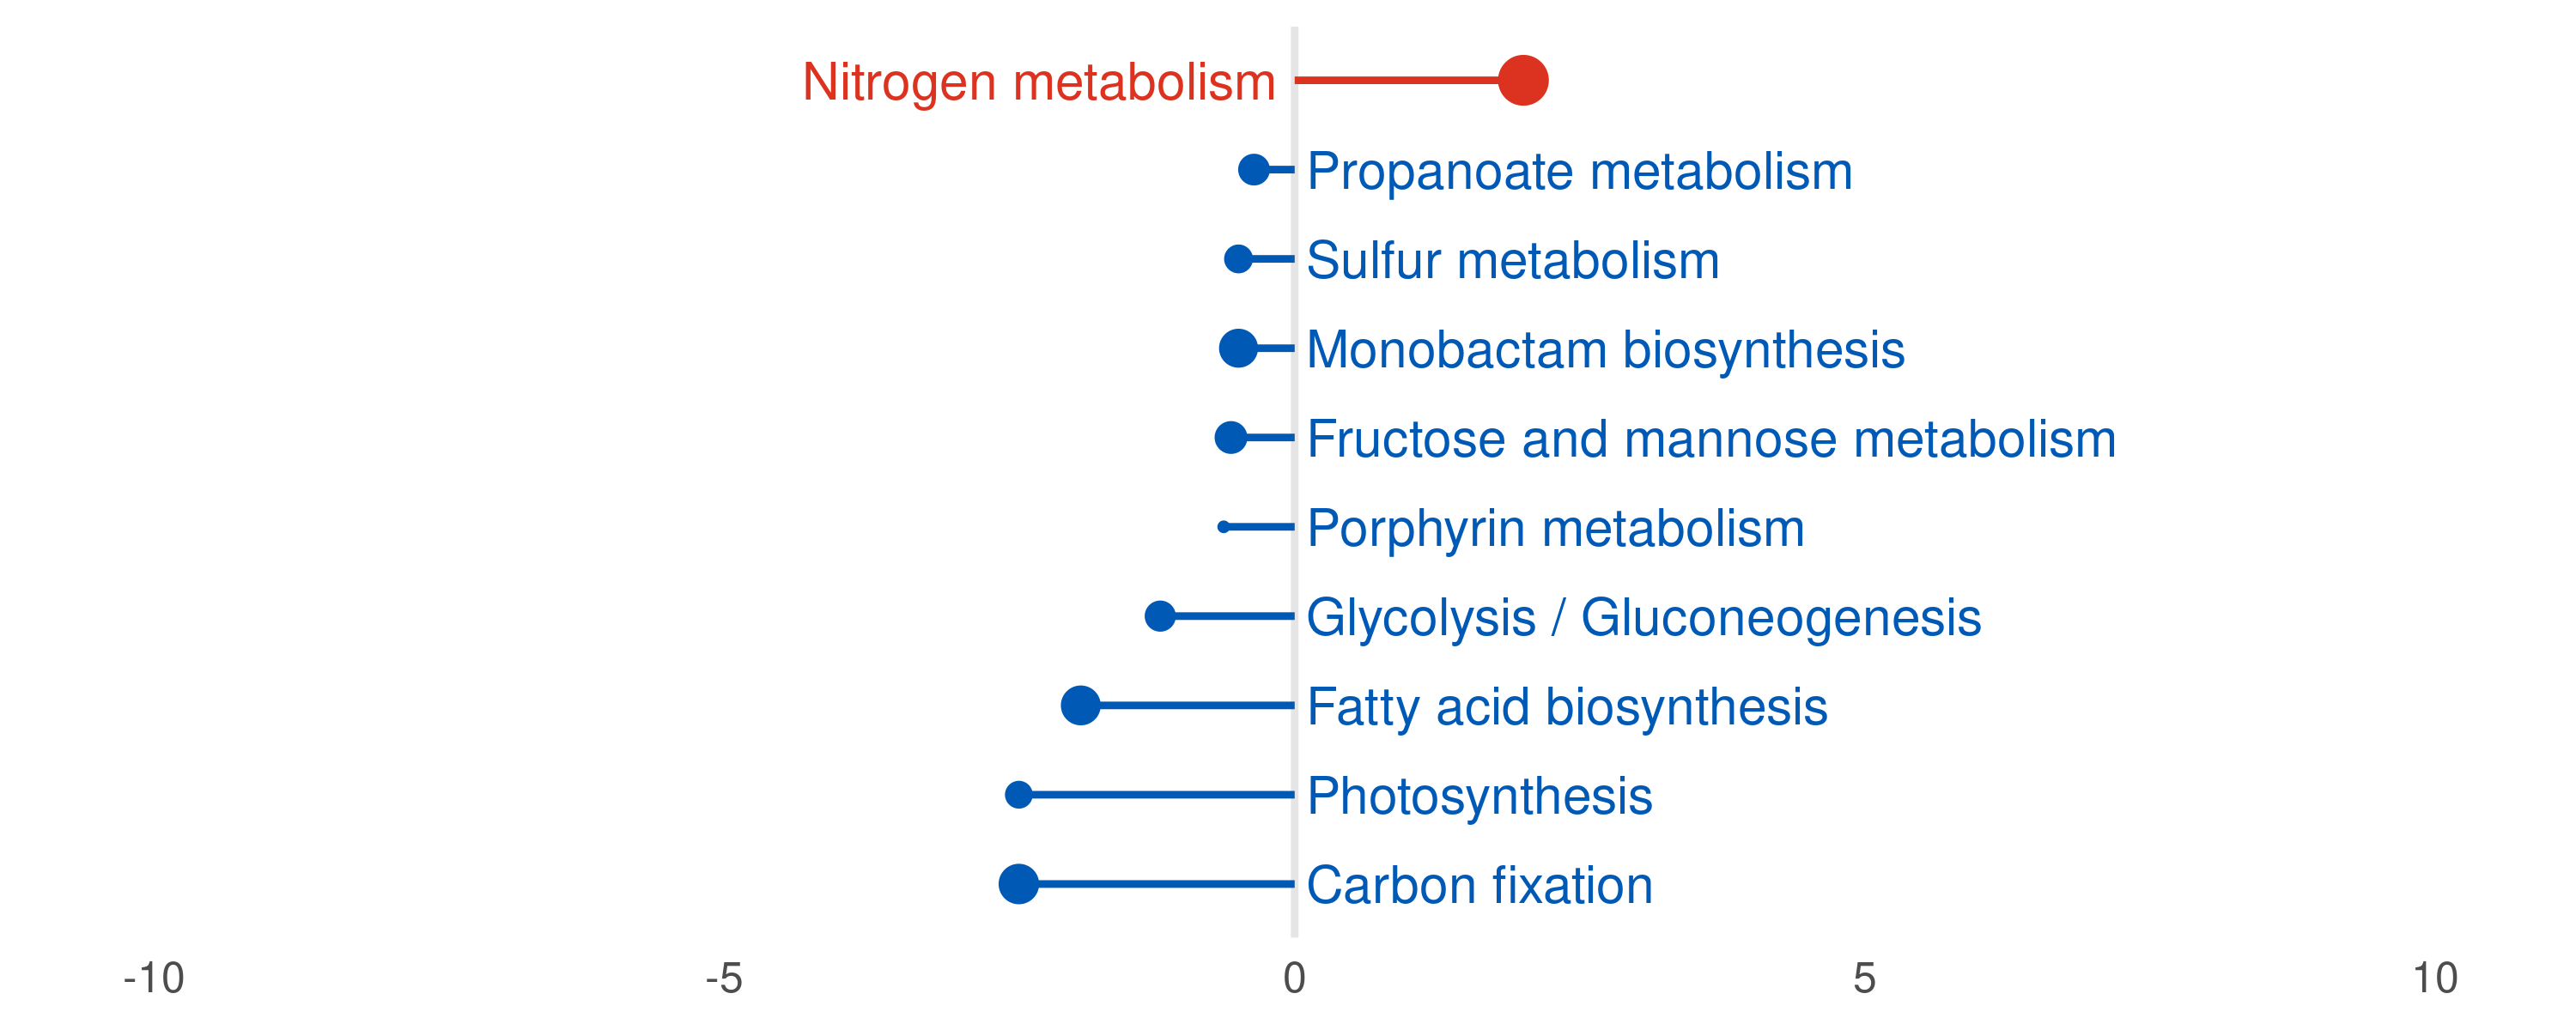

In [119]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




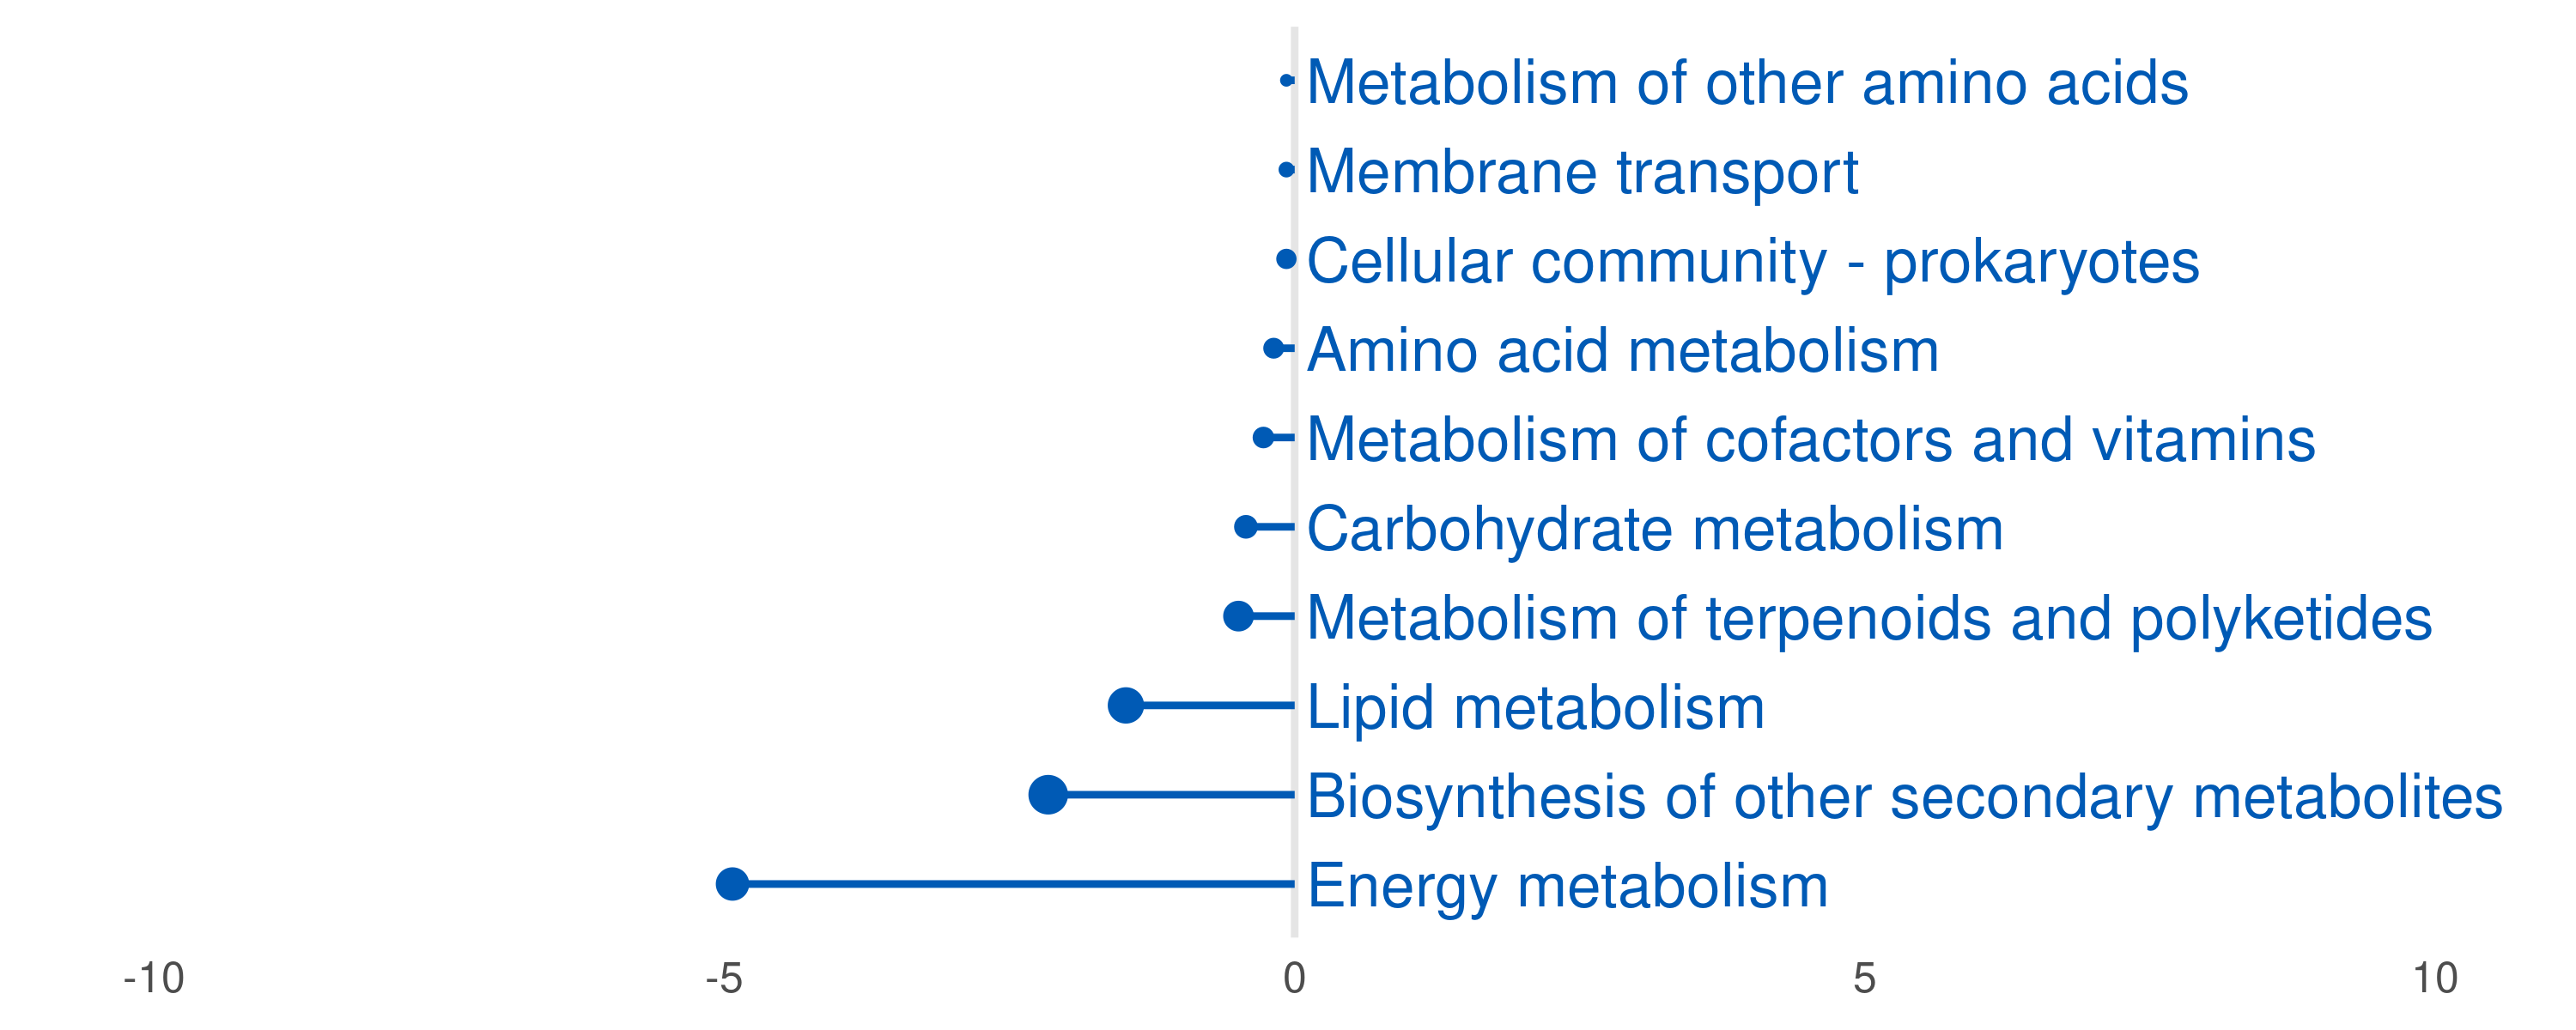

In [120]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")


